# *+ Processing with CHM & RN & biomass data +*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

Site #    WGS84 N   WGS 84 E Origin  Origin_ID Dominant_specias  Species_ID  \
0      1  51.435741  30.107979      n          0            Birch           2   
1      2  51.434093  30.108523      a          1             Pine           0   
2      3  51.434163  30.109196      a          1             Pine           0   
3      4  51.434217  30.110484      a          1             Pine           0   
4      5  51.434056  30.111980      a          1             Pine           0   

   Cs_wood_Bq/kg  ln_Cs_wood  Sr_wood_Bq/kg  ...  idm_g_Q25 idm_g_Q50  \
0            920       6.824          10300  ...   0.042167  0.050549   
1           3600       8.189          15100  ...   0.040919  0.048889   
2           4360       8.380          14600  ...   0.042397  0.050463   
3           3420       8.137          12700  ...   0.043719  0.052974   
4           2200       7.696          12100  ...   0.040659  0.049303   

   idm_g_Q75  idm_b_MIN  idm_b_MAX  idm_b_MEAN  idm_b_STD  idm_b_Q25  \
0   0.062270   0.017730   0.408966    0.059749   0.030217   0.043539   
1   0.060698   0.020078   0.258602    0.057223   0.025515   0.043035   
2   0.060603   0.020761   0.156265    0.056571   0.016629   0.045142   
3   0.066027   0.017239   0.327465    0.060880   0.023964   0.046111   
4   0.061803   0.014276   0.274420    0.057902   0.024283   0.043045   

   idm_b_Q50  idm_b_Q75  
0   0.052312   0.064544  
1   0.050941   0.062608  
2   0.053495   0.064635  
3   0.055601   0.069182  
4   0.051566   0.065078  

[5 rows x 159 columns]

# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
                                    '%_cover', 'mf_chm_MEAN', 'mf_chm_MAX'])
            


# Show the first five columns
select.head()

ln_Gs_cub_m  ln_M_stem_kg_m2  ln_M_stem_bark_kg_m2  ln_M_crown_kg_m2  \
0       4.8122           1.7630               -0.3147           -0.1590   
1       5.7589           2.4570               -0.2485            0.3429   
2       5.8464           2.5153               -0.1054            0.5493   
3       5.7526           2.6304               -0.0834            0.3900   
4       5.9480           2.6748                0.0000            0.5715   

   ln_M_foliage_kg_m2  ln_M_AG_kg_m2  %_cover  mf_chm_MEAN  mf_chm_MAX  
0             -2.4418         1.9125     0.85    12.233545   19.097736  
1             -0.1997         2.6319     1.00    14.964220   17.704655  
2             -0.2144         2.7020     1.00    15.329449   17.559893  
3             -0.3510         2.7763     0.97    15.392742   20.676994  
4             -0.3711         2.8314     1.00    17.944009   21.851387

# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ln_Gs_cub_m           103 non-null    float64
 1   ln_M_stem_kg_m2       103 non-null    float64
 2   ln_M_stem_bark_kg_m2  103 non-null    float64
 3   ln_M_crown_kg_m2      103 non-null    float64
 4   ln_M_foliage_kg_m2    103 non-null    float64
 5   ln_M_AG_kg_m2         103 non-null    float64
 6   %_cover               103 non-null    float64
 7   mf_chm_MEAN           103 non-null    float64
 8   mf_chm_MAX            103 non-null    float64
dtypes: float64(9)
memory usage: 7.4 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_specias"])["Gs_cub_m", "M_stem_kg_m2"].describe()

/tmp/ipykernel_3606/594647310.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Dominant_specias"])["Gs_cub_m", "M_stem_kg_m2"].describe()


Gs_cub_m                                               \
                    count        mean         std    min    25%    50%   
Dominant_specias                                                         
Alder                 4.0  380.250000  155.784841  199.0  283.0  386.5   
Aspen                 1.0  148.000000         NaN  148.0  148.0  148.0   
Birch                23.0  135.304348   73.156392   11.0   94.0  138.0   
Oak                   3.0  236.000000   77.504839  158.0  197.5  237.0   
Pine                 71.0  263.281690  185.083625    2.0   97.0  281.0   
Spruce                1.0  619.000000         NaN  619.0  619.0  619.0   

                                M_stem_kg_m2                              \
                     75%    max        count       mean       std    min   
Dominant_specias                                                           
Alder             483.75  549.0          4.0  16.170000  5.186990   9.90   
Aspen             148.00  148.0          1.0   6.650000       NaN   6.65   
Birch             197.00  280.0         23.0   6.809130  3.677786   0.84   
Oak               275.00  313.0          3.0  13.513333  4.888725   9.59   
Pine              394.00  671.0         71.0  10.550000  7.252887   0.05   
Spruce            619.00  619.0          1.0  23.830000       NaN  23.83   

                                                  
                      25%    50%      75%    max  
Dominant_specias                                  
Alder             12.9225  17.03  20.2775  20.72  
Aspen              6.6500   6.65   6.6500   6.65  
Birch              4.7650   6.19   9.7400  15.47  
Oak               10.7750  11.96  15.4750  18.99  
Pine               3.4400  11.34  16.2250  25.04  
Spruce            23.8300  23.83  23.8300  23.83

In [6]:
# Descriptive statistics of main parameters
select.describe()

ln_Gs_cub_m  ln_M_stem_kg_m2  ln_M_stem_bark_kg_m2  ln_M_crown_kg_m2  \
count   103.000000       103.000000            103.000000         103.00000   
mean      4.969534         1.827923             -0.239481           0.05436   
std       1.323782         1.325853              0.893398           0.66008   
min       0.693100        -2.995700             -3.912000          -1.55590   
25%       4.672800         1.588100             -0.335500          -0.20955   
50%       5.337500         2.286500             -0.040800           0.24450   
75%       5.908100         2.730800              0.190600           0.49195   
max       6.508800         3.220500              1.654400           1.41220   

       ln_M_foliage_kg_m2  ln_M_AG_kg_m2     %_cover  mf_chm_MEAN  mf_chm_MAX  
count          103.000000     103.000000  103.000000   103.000000  103.000000  
mean            -1.021247       2.095454    0.808738    13.045021   17.907784  
std              0.803748       1.079203    0.276653     6.609366    7.523377  
min             -2.918800      -0.798500    0.090000     1.293138    2.733019  
25%             -1.629700       1.801400    0.745000     8.206727   11.615798  
50%             -0.719500       2.458700    0.960000    13.072916   18.269344  
75%             -0.358800       2.862800    1.000000    17.432255   22.751595  
max              0.114200       3.366600    1.000000    28.916548   36.355442

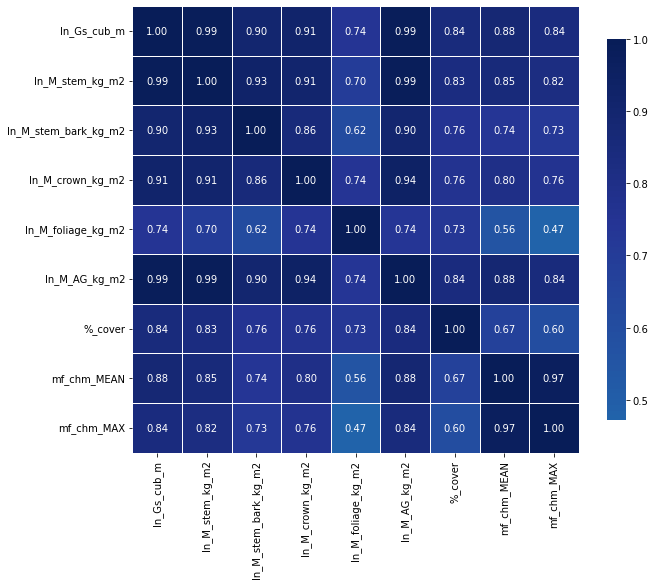

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['%_cover', 'mf_chm_MEAN', 'mf_chm_MAX'])
y = pd.DataFrame(select, columns= ['ln_M_stem_bark_kg_m2'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [10]:
# Columns in "X" data collections
X.head()

%_cover  mf_chm_MEAN  mf_chm_MAX
0     0.85    12.233545   19.097736
1     1.00    14.964220   17.704655
2     1.00    15.329449   17.559893
3     0.97    15.392742   20.676994
4     1.00    17.944009   21.851387

In [11]:
# Columns in "y" data collections
y.head()

ln_M_stem_bark_kg_m2
0               -0.3147
1               -0.2485
2               -0.1054
3               -0.0834
4                0.0000

# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.6463397606252697, 0.5946348147552596, 0.3057767603765076]
    Mean: 0.516
    Std: 0.150

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.38872409 0.69474308 0.73551221]
    Mean: 0.606
    Std: 0.155

 --------------------
Mean absolute error (MAE): 

    Scores: [0.3597886263445871, 0.39987613877022976, 0.5278039401925442]
    Mean: 0.429
    Std: 0.072

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=3000, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
Model with rank: 1
Mean validation score: 0.700 (std: 0.088)
Parameters: {'colsample_bytree': 0.11041965568115941, 'gamma': 0.3525913743740846, 'learning_rate': 0.26871095873422957, 'max_depth': 2, 'n_estimators': 67, 'subsample': 0.4342275742971686}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.5286602 , 1.15932307, 0.99800282, ..., 0.39686141, 0.3454493 ,
       0.27515154]), 'std_fit_time': array([0.36446422, 0.79374853, 0.06229091, ..., 0.01123663, 0.01064551,
       0.00734229]), 'mean_score_time': array([0.00967593, 0.01145649, 0.00852513, ..., 0.00649714, 0.00641189,
       0.00644326]), 'std_score_time': array([3.10888998e-03, 5.82320353e-03, 1.10180512e-03, ...,
       1.67996843e-04, 3.40945571e-05, 7.88532101e-05]), 'param_colsample_bytree': masked_array(data=[0.08748478284185181, 0.10738012216244608,
                   0.804466593218553, ..., 0.294351967340604,
                   0.4941825923863031, 0.22146896031011903],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.20505993028689407, 0.15354651862799434,
                   0.0990213116978702, ..., 0.09351253457190295,
                   0.2942324247875428, 0.1636538256024292],
     

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.11041965568115941
Gamma: 0.3525913743740846
Learning_rate: 0.26871095873422957
Max_depth: 2
N_estimators: 67
Subsample: 0.4342275742971686


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:0.95063	validation_1-rmse:0.91221
[1]	validation_0-rmse:0.77760	validation_1-rmse:0.74857
[2]	validation_0-rmse:0.68499	validation_1-rmse:0.66232


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:0.58420	validation_1-rmse:0.56391
[4]	validation_0-rmse:0.51567	validation_1-rmse:0.51242
[5]	validation_0-rmse:0.46222	validation_1-rmse:0.48667
[6]	validation_0-rmse:0.44711	validation_1-rmse:0.48625
[7]	validation_0-rmse:0.41927	validation_1-rmse:0.46471
[8]	validation_0-rmse:0.40307	validation_1-rmse:0.46731
[9]	validation_0-rmse:0.39833	validation_1-rmse:0.45219
[10]	validation_0-rmse:0.39160	validation_1-rmse:0.45037
[11]	validation_0-rmse:0.39757	validation_1-rmse:0.44128
[12]	validation_0-rmse:0.39115	validation_1-rmse:0.44955
[13]	validation_0-rmse:0.38443	validation_1-rmse:0.46633
[14]	validation_0-rmse:0.38271	validation_1-rmse:0.45837
[15]	validation_0-rmse:0.38446	validation_1-rmse:0.47117
[16]	validation_0-rmse:0.37629	validation_1-rmse:0.46529
[17]	validation_0-rmse:0.36749	validation_1-rmse:0.46554
[18]	validation_0-rmse:0.36274	validation_1-rmse:0.47819
[19]	validation_0-rmse:0.35838	validation_1-rmse:0.45681
[20]	validation_0-rmse:0.35774	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.52275	validation_1-rmse:0.58782
[5]	validation_0-rmse:0.48882	validation_1-rmse:0.56273
[6]	validation_0-rmse:0.47224	validation_1-rmse:0.55715
[7]	validation_0-rmse:0.44581	validation_1-rmse:0.55809
[8]	validation_0-rmse:0.41491	validation_1-rmse:0.55090
[9]	validation_0-rmse:0.39582	validation_1-rmse:0.55094
[10]	validation_0-rmse:0.36814	validation_1-rmse:0.56872
[11]	validation_0-rmse:0.36430	validation_1-rmse:0.56891
[12]	validation_0-rmse:0.35386	validation_1-rmse:0.58254
[13]	validation_0-rmse:0.35338	validation_1-rmse:0.58300
[14]	validation_0-rmse:0.34892	validation_1-rmse:0.58415
[15]	validation_0-rmse:0.34902	validation_1-rmse:0.58478
[16]	validation_0-rmse:0.34447	validation_1-rmse:0.59032
[17]	validation_0-rmse:0.34317	validation_1-rmse:0.59079
[18]	validation_0-rmse:0.34005	validation_1-rmse:0.60785
[19]	validation_0-rmse:0.32629	validation_1-rmse:0.61005
[20]	validation_0-rmse:0.32547	validation_1-rmse:0.60875
[21]	validation_0-rmse:0.31948	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.53193	validation_1-rmse:0.62990
[6]	validation_0-rmse:0.50204	validation_1-rmse:0.62807
[7]	validation_0-rmse:0.49818	validation_1-rmse:0.63433
[8]	validation_0-rmse:0.45898	validation_1-rmse:0.65752
[9]	validation_0-rmse:0.45208	validation_1-rmse:0.65900
[10]	validation_0-rmse:0.43721	validation_1-rmse:0.66912
[11]	validation_0-rmse:0.44097	validation_1-rmse:0.68186
[12]	validation_0-rmse:0.43944	validation_1-rmse:0.67542
[13]	validation_0-rmse:0.43948	validation_1-rmse:0.67526
[14]	validation_0-rmse:0.41258	validation_1-rmse:0.71141
[15]	validation_0-rmse:0.40188	validation_1-rmse:0.70500
[16]	validation_0-rmse:0.40082	validation_1-rmse:0.70926
[17]	validation_0-rmse:0.39160	validation_1-rmse:0.70185
[18]	validation_0-rmse:0.39306	validation_1-rmse:0.69726
[19]	validation_0-rmse:0.38513	validation_1-rmse:0.71321
[20]	validation_0-rmse:0.37463	validation_1-rmse:0.71514
[21]	validation_0-rmse:0.35469	validation_1-rmse:0.74279
[22]	validation_0-rmse:0.35564	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.39942	validation_1-rmse:0.74793
[8]	validation_0-rmse:0.37502	validation_1-rmse:0.68952
[9]	validation_0-rmse:0.37458	validation_1-rmse:0.68888
[10]	validation_0-rmse:0.36180	validation_1-rmse:0.67302
[11]	validation_0-rmse:0.34962	validation_1-rmse:0.64984
[12]	validation_0-rmse:0.34503	validation_1-rmse:0.66503
[13]	validation_0-rmse:0.34274	validation_1-rmse:0.63296
[14]	validation_0-rmse:0.33835	validation_1-rmse:0.64512
[15]	validation_0-rmse:0.33235	validation_1-rmse:0.65153
[16]	validation_0-rmse:0.32803	validation_1-rmse:0.63539
[17]	validation_0-rmse:0.32742	validation_1-rmse:0.60567
[18]	validation_0-rmse:0.32731	validation_1-rmse:0.60477
[19]	validation_0-rmse:0.32731	validation_1-rmse:0.59215
[20]	validation_0-rmse:0.31914	validation_1-rmse:0.60108
[21]	validation_0-rmse:0.31969	validation_1-rmse:0.62463
[22]	validation_0-rmse:0.31933	validation_1-rmse:0.62338
[23]	validation_0-rmse:0.31475	validation_1-rmse:0.62460
[24]	validation_0-rmse:0.31517	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.49190	validation_1-rmse:0.57188
[6]	validation_0-rmse:0.45949	validation_1-rmse:0.54598
[7]	validation_0-rmse:0.41608	validation_1-rmse:0.55564
[8]	validation_0-rmse:0.40622	validation_1-rmse:0.54701
[9]	validation_0-rmse:0.39563	validation_1-rmse:0.54955
[10]	validation_0-rmse:0.39761	validation_1-rmse:0.54552
[11]	validation_0-rmse:0.38821	validation_1-rmse:0.54586
[12]	validation_0-rmse:0.37970	validation_1-rmse:0.54569
[13]	validation_0-rmse:0.37948	validation_1-rmse:0.54571
[14]	validation_0-rmse:0.36720	validation_1-rmse:0.54587
[15]	validation_0-rmse:0.36734	validation_1-rmse:0.54580
[16]	validation_0-rmse:0.36816	validation_1-rmse:0.54556
[17]	validation_0-rmse:0.35371	validation_1-rmse:0.52793
[18]	validation_0-rmse:0.34451	validation_1-rmse:0.51138
[19]	validation_0-rmse:0.34037	validation_1-rmse:0.51093
[20]	validation_0-rmse:0.33682	validation_1-rmse:0.50075
[21]	validation_0-rmse:0.33663	validation_1-rmse:0.50083
[22]	validation_0-rmse:0.33631	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:0.85565	validation_1-rmse:0.78715
[2]	validation_0-rmse:0.72376	validation_1-rmse:0.64685
[3]	validation_0-rmse:0.64981	validation_1-rmse:0.57338
[4]	validation_0-rmse:0.57276	validation_1-rmse:0.49366
[5]	validation_0-rmse:0.53406	validation_1-rmse:0.47092
[6]	validation_0-rmse:0.48720	validation_1-rmse:0.43527
[7]	validation_0-rmse:0.46142	validation_1-rmse:0.43483
[8]	validation_0-rmse:0.44386	validation_1-rmse:0.42271
[9]	validation_0-rmse:0.43411	validation_1-rmse:0.42857
[10]	validation_0-rmse:0.41010	validation_1-rmse:0.39054
[11]	validation_0-rmse:0.40892	validation_1-rmse:0.39916
[12]	validation_0-rmse:0.40231	validation_1-rmse:0.41727
[13]	validation_0-rmse:0.39359	validation_1-rmse:0.41943
[14]	validation_0-rmse:0.39359	validation_1-rmse:0.41951
[15]	validation_0-rmse:0.39360	validation_1-rmse:0.41900
[16]	validation_0-rmse:0.38382	validation_1-rmse:0.41961
[17]	validation_0-rmse:0.37921	validation_1-rmse:0.41921
[18]	validation_0-rmse:0.37223	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.46691	validation_1-rmse:0.37001
[6]	validation_0-rmse:0.45453	validation_1-rmse:0.37060
[7]	validation_0-rmse:0.41808	validation_1-rmse:0.39437
[8]	validation_0-rmse:0.39503	validation_1-rmse:0.41604
[9]	validation_0-rmse:0.38916	validation_1-rmse:0.43294
[10]	validation_0-rmse:0.37767	validation_1-rmse:0.44847
[11]	validation_0-rmse:0.37529	validation_1-rmse:0.45669
[12]	validation_0-rmse:0.37236	validation_1-rmse:0.48993
[13]	validation_0-rmse:0.37222	validation_1-rmse:0.49239
[14]	validation_0-rmse:0.36948	validation_1-rmse:0.48973
[15]	validation_0-rmse:0.37134	validation_1-rmse:0.48388
[16]	validation_0-rmse:0.36487	validation_1-rmse:0.47722
[17]	validation_0-rmse:0.36104	validation_1-rmse:0.50332
[18]	validation_0-rmse:0.36103	validation_1-rmse:0.50324
[19]	validation_0-rmse:0.36036	validation_1-rmse:0.49669
[20]	validation_0-rmse:0.34872	validation_1-rmse:0.47797
[21]	validation_0-rmse:0.34372	validation_1-rmse:0.44233
[22]	validation_0-rmse:0.33856	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.42475	validation_1-rmse:0.52755
[8]	validation_0-rmse:0.41391	validation_1-rmse:0.52512
[9]	validation_0-rmse:0.40126	validation_1-rmse:0.52238
[10]	validation_0-rmse:0.39910	validation_1-rmse:0.51186
[11]	validation_0-rmse:0.39111	validation_1-rmse:0.51275
[12]	validation_0-rmse:0.38697	validation_1-rmse:0.51612
[13]	validation_0-rmse:0.38523	validation_1-rmse:0.53790
[14]	validation_0-rmse:0.37966	validation_1-rmse:0.53846
[15]	validation_0-rmse:0.37350	validation_1-rmse:0.55397
[16]	validation_0-rmse:0.36776	validation_1-rmse:0.55537
[17]	validation_0-rmse:0.36133	validation_1-rmse:0.55495
[18]	validation_0-rmse:0.36474	validation_1-rmse:0.54139
[19]	validation_0-rmse:0.36403	validation_1-rmse:0.53357
[20]	validation_0-rmse:0.36405	validation_1-rmse:0.53489
[21]	validation_0-rmse:0.35842	validation_1-rmse:0.54784
[22]	validation_0-rmse:0.35752	validation_1-rmse:0.54962
[23]	validation_0-rmse:0.35691	validation_1-rmse:0.56387
[24]	validation_0-rmse:0.34284	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.50646	validation_1-rmse:0.58886
[5]	validation_0-rmse:0.46280	validation_1-rmse:0.56838
[6]	validation_0-rmse:0.44823	validation_1-rmse:0.56179
[7]	validation_0-rmse:0.42500	validation_1-rmse:0.53880
[8]	validation_0-rmse:0.39820	validation_1-rmse:0.54202
[9]	validation_0-rmse:0.39364	validation_1-rmse:0.53933
[10]	validation_0-rmse:0.37835	validation_1-rmse:0.50323
[11]	validation_0-rmse:0.36771	validation_1-rmse:0.50175
[12]	validation_0-rmse:0.35668	validation_1-rmse:0.49441
[13]	validation_0-rmse:0.34703	validation_1-rmse:0.50185
[14]	validation_0-rmse:0.34991	validation_1-rmse:0.49429
[15]	validation_0-rmse:0.34998	validation_1-rmse:0.49345
[16]	validation_0-rmse:0.34661	validation_1-rmse:0.49101
[17]	validation_0-rmse:0.33998	validation_1-rmse:0.51421
[18]	validation_0-rmse:0.33932	validation_1-rmse:0.52127
[19]	validation_0-rmse:0.33714	validation_1-rmse:0.51705
[20]	validation_0-rmse:0.33115	validation_1-rmse:0.51234
[21]	validation_0-rmse:0.33144	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:0.46017	validation_1-rmse:0.50198
[7]	validation_0-rmse:0.42589	validation_1-rmse:0.52077
[8]	validation_0-rmse:0.40989	validation_1-rmse:0.52730
[9]	validation_0-rmse:0.39351	validation_1-rmse:0.55423
[10]	validation_0-rmse:0.39670	validation_1-rmse:0.54579
[11]	validation_0-rmse:0.39523	validation_1-rmse:0.55077
[12]	validation_0-rmse:0.39161	validation_1-rmse:0.56105
[13]	validation_0-rmse:0.37851	validation_1-rmse:0.55743
[14]	validation_0-rmse:0.38017	validation_1-rmse:0.55297
[15]	validation_0-rmse:0.36933	validation_1-rmse:0.55199
[16]	validation_0-rmse:0.36633	validation_1-rmse:0.55316
[17]	validation_0-rmse:0.36422	validation_1-rmse:0.53751
[18]	validation_0-rmse:0.35724	validation_1-rmse:0.54588
[19]	validation_0-rmse:0.35518	validation_1-rmse:0.54969
[20]	validation_0-rmse:0.35450	validation_1-rmse:0.54726
[21]	validation_0-rmse:0.35001	validation_1-rmse:0.53921
[22]	validation_0-rmse:0.34927	validation_1-rmse:0.54188
[23]	validation_0-rmse:0.34515	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.47702	validation_1-rmse:0.77195
[8]	validation_0-rmse:0.44760	validation_1-rmse:0.72414
[9]	validation_0-rmse:0.41177	validation_1-rmse:0.71937
[10]	validation_0-rmse:0.40760	validation_1-rmse:0.70696
[11]	validation_0-rmse:0.39625	validation_1-rmse:0.68003
[12]	validation_0-rmse:0.39235	validation_1-rmse:0.68596
[13]	validation_0-rmse:0.39183	validation_1-rmse:0.69465
[14]	validation_0-rmse:0.37717	validation_1-rmse:0.69583
[15]	validation_0-rmse:0.36059	validation_1-rmse:0.68187
[16]	validation_0-rmse:0.34909	validation_1-rmse:0.66393
[17]	validation_0-rmse:0.33590	validation_1-rmse:0.66849
[18]	validation_0-rmse:0.33477	validation_1-rmse:0.64573
[19]	validation_0-rmse:0.32811	validation_1-rmse:0.63813
[20]	validation_0-rmse:0.32957	validation_1-rmse:0.63855
[21]	validation_0-rmse:0.32808	validation_1-rmse:0.63967
[22]	validation_0-rmse:0.32825	validation_1-rmse:0.64105
[23]	validation_0-rmse:0.32789	validation_1-rmse:0.63731
[24]	validation_0-rmse:0.32641	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.39313	validation_1-rmse:0.86149
[8]	validation_0-rmse:0.38674	validation_1-rmse:0.85567
[9]	validation_0-rmse:0.38230	validation_1-rmse:0.84252
[10]	validation_0-rmse:0.38257	validation_1-rmse:0.84320
[11]	validation_0-rmse:0.37342	validation_1-rmse:0.83641
[12]	validation_0-rmse:0.36565	validation_1-rmse:0.82392
[13]	validation_0-rmse:0.36205	validation_1-rmse:0.81722
[14]	validation_0-rmse:0.34974	validation_1-rmse:0.81671
[15]	validation_0-rmse:0.34939	validation_1-rmse:0.82359
[16]	validation_0-rmse:0.34323	validation_1-rmse:0.81318
[17]	validation_0-rmse:0.34329	validation_1-rmse:0.81469
[18]	validation_0-rmse:0.34091	validation_1-rmse:0.81280
[19]	validation_0-rmse:0.33733	validation_1-rmse:0.82405
[20]	validation_0-rmse:0.33564	validation_1-rmse:0.82873
[21]	validation_0-rmse:0.33277	validation_1-rmse:0.81950
[22]	validation_0-rmse:0.33029	validation_1-rmse:0.81691
[23]	validation_0-rmse:0.32966	validation_1-rmse:0.81273
[24]	validation_0-rmse:0.32220	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:0.53991	validation_1-rmse:0.33804
[7]	validation_0-rmse:0.49809	validation_1-rmse:0.33549
[8]	validation_0-rmse:0.45067	validation_1-rmse:0.33057
[9]	validation_0-rmse:0.43246	validation_1-rmse:0.32759
[10]	validation_0-rmse:0.41587	validation_1-rmse:0.32869
[11]	validation_0-rmse:0.41668	validation_1-rmse:0.33667
[12]	validation_0-rmse:0.40757	validation_1-rmse:0.33472
[13]	validation_0-rmse:0.40133	validation_1-rmse:0.33532
[14]	validation_0-rmse:0.39462	validation_1-rmse:0.33499
[15]	validation_0-rmse:0.38450	validation_1-rmse:0.33742
[16]	validation_0-rmse:0.37576	validation_1-rmse:0.33546
[17]	validation_0-rmse:0.36593	validation_1-rmse:0.33407
[18]	validation_0-rmse:0.36274	validation_1-rmse:0.33370
[19]	validation_0-rmse:0.35803	validation_1-rmse:0.33384
[20]	validation_0-rmse:0.35891	validation_1-rmse:0.33375
[21]	validation_0-rmse:0.36223	validation_1-rmse:0.34042
[22]	validation_0-rmse:0.35845	validation_1-rmse:0.33756
[23]	validation_0-rmse:0.35847	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:0.59970	validation_1-rmse:0.76252
[4]	validation_0-rmse:0.52326	validation_1-rmse:0.67745
[5]	validation_0-rmse:0.49340	validation_1-rmse:0.65872
[6]	validation_0-rmse:0.45746	validation_1-rmse:0.61043
[7]	validation_0-rmse:0.45906	validation_1-rmse:0.61281
[8]	validation_0-rmse:0.44669	validation_1-rmse:0.60830
[9]	validation_0-rmse:0.45168	validation_1-rmse:0.61966
[10]	validation_0-rmse:0.43889	validation_1-rmse:0.60122
[11]	validation_0-rmse:0.42358	validation_1-rmse:0.57455
[12]	validation_0-rmse:0.41983	validation_1-rmse:0.56466
[13]	validation_0-rmse:0.40898	validation_1-rmse:0.53599
[14]	validation_0-rmse:0.39637	validation_1-rmse:0.54951
[15]	validation_0-rmse:0.39197	validation_1-rmse:0.56128
[16]	validation_0-rmse:0.39252	validation_1-rmse:0.56570
[17]	validation_0-rmse:0.38629	validation_1-rmse:0.54614
[18]	validation_0-rmse:0.38761	validation_1-rmse:0.55740
[19]	validation_0-rmse:0.37847	validation_1-rmse:0.54505
[20]	validation_0-rmse:0.37829	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.43716	validation_1-rmse:0.55828
[9]	validation_0-rmse:0.43061	validation_1-rmse:0.56763
[10]	validation_0-rmse:0.43303	validation_1-rmse:0.57062
[11]	validation_0-rmse:0.43254	validation_1-rmse:0.55615
[12]	validation_0-rmse:0.42384	validation_1-rmse:0.55403
[13]	validation_0-rmse:0.42306	validation_1-rmse:0.55616
[14]	validation_0-rmse:0.40231	validation_1-rmse:0.55682
[15]	validation_0-rmse:0.40179	validation_1-rmse:0.54679
[16]	validation_0-rmse:0.38652	validation_1-rmse:0.53709
[17]	validation_0-rmse:0.38949	validation_1-rmse:0.53545
[18]	validation_0-rmse:0.37386	validation_1-rmse:0.54500
[19]	validation_0-rmse:0.36904	validation_1-rmse:0.54003
[20]	validation_0-rmse:0.35382	validation_1-rmse:0.56189
[21]	validation_0-rmse:0.34887	validation_1-rmse:0.57686
[22]	validation_0-rmse:0.34551	validation_1-rmse:0.57436
[23]	validation_0-rmse:0.33944	validation_1-rmse:0.58524
[24]	validation_0-rmse:0.33473	validation_1-rmse:0.59958
[25]	validation_0-rmse:0.33311	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.47943	validation_1-rmse:0.41479
[8]	validation_0-rmse:0.46898	validation_1-rmse:0.41143
[9]	validation_0-rmse:0.45284	validation_1-rmse:0.42348
[10]	validation_0-rmse:0.44350	validation_1-rmse:0.39867
[11]	validation_0-rmse:0.44099	validation_1-rmse:0.39378
[12]	validation_0-rmse:0.43823	validation_1-rmse:0.36497
[13]	validation_0-rmse:0.41892	validation_1-rmse:0.33682
[14]	validation_0-rmse:0.41882	validation_1-rmse:0.33610
[15]	validation_0-rmse:0.40823	validation_1-rmse:0.33825
[16]	validation_0-rmse:0.40027	validation_1-rmse:0.33288
[17]	validation_0-rmse:0.39267	validation_1-rmse:0.33669
[18]	validation_0-rmse:0.38330	validation_1-rmse:0.35790
[19]	validation_0-rmse:0.38303	validation_1-rmse:0.35895
[20]	validation_0-rmse:0.37526	validation_1-rmse:0.36485
[21]	validation_0-rmse:0.37536	validation_1-rmse:0.34567
[22]	validation_0-rmse:0.37527	validation_1-rmse:0.34891
[23]	validation_0-rmse:0.36709	validation_1-rmse:0.34052
[24]	validation_0-rmse:0.35829	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:0.52395	validation_1-rmse:0.30429
[7]	validation_0-rmse:0.48821	validation_1-rmse:0.30678
[8]	validation_0-rmse:0.46758	validation_1-rmse:0.33102
[9]	validation_0-rmse:0.45800	validation_1-rmse:0.36646
[10]	validation_0-rmse:0.43951	validation_1-rmse:0.37677
[11]	validation_0-rmse:0.43405	validation_1-rmse:0.37127
[12]	validation_0-rmse:0.41984	validation_1-rmse:0.40463
[13]	validation_0-rmse:0.41278	validation_1-rmse:0.42601
[14]	validation_0-rmse:0.41040	validation_1-rmse:0.40644
[15]	validation_0-rmse:0.41308	validation_1-rmse:0.41233
[16]	validation_0-rmse:0.41524	validation_1-rmse:0.41299
[17]	validation_0-rmse:0.40774	validation_1-rmse:0.41169
[18]	validation_0-rmse:0.40280	validation_1-rmse:0.43626
[19]	validation_0-rmse:0.39655	validation_1-rmse:0.48819
[20]	validation_0-rmse:0.38948	validation_1-rmse:0.48830
[21]	validation_0-rmse:0.37941	validation_1-rmse:0.45647
[22]	validation_0-rmse:0.37640	validation_1-rmse:0.47992
[23]	validation_0-rmse:0.36903	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.51792	validation_1-rmse:0.90434
[5]	validation_0-rmse:0.46695	validation_1-rmse:0.84812
[6]	validation_0-rmse:0.44609	validation_1-rmse:0.83888
[7]	validation_0-rmse:0.41908	validation_1-rmse:0.78854
[8]	validation_0-rmse:0.39637	validation_1-rmse:0.74913
[9]	validation_0-rmse:0.38284	validation_1-rmse:0.74873
[10]	validation_0-rmse:0.37108	validation_1-rmse:0.71536
[11]	validation_0-rmse:0.35997	validation_1-rmse:0.70965
[12]	validation_0-rmse:0.36188	validation_1-rmse:0.70512
[13]	validation_0-rmse:0.35684	validation_1-rmse:0.69870
[14]	validation_0-rmse:0.35612	validation_1-rmse:0.69921
[15]	validation_0-rmse:0.35232	validation_1-rmse:0.71176
[16]	validation_0-rmse:0.34629	validation_1-rmse:0.71841
[17]	validation_0-rmse:0.34306	validation_1-rmse:0.70790
[18]	validation_0-rmse:0.33980	validation_1-rmse:0.70334
[19]	validation_0-rmse:0.33544	validation_1-rmse:0.69347
[20]	validation_0-rmse:0.33537	validation_1-rmse:0.69159
[21]	validation_0-rmse:0.33607	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.43734	validation_1-rmse:0.59673
[8]	validation_0-rmse:0.41723	validation_1-rmse:0.59788
[9]	validation_0-rmse:0.40478	validation_1-rmse:0.59993
[10]	validation_0-rmse:0.39649	validation_1-rmse:0.57637
[11]	validation_0-rmse:0.39401	validation_1-rmse:0.57640
[12]	validation_0-rmse:0.37963	validation_1-rmse:0.56332
[13]	validation_0-rmse:0.37206	validation_1-rmse:0.55658
[14]	validation_0-rmse:0.36120	validation_1-rmse:0.56545
[15]	validation_0-rmse:0.35984	validation_1-rmse:0.57185
[16]	validation_0-rmse:0.35593	validation_1-rmse:0.56505
[17]	validation_0-rmse:0.35583	validation_1-rmse:0.56525
[18]	validation_0-rmse:0.35252	validation_1-rmse:0.56713
[19]	validation_0-rmse:0.34756	validation_1-rmse:0.59003
[20]	validation_0-rmse:0.34701	validation_1-rmse:0.59029
[21]	validation_0-rmse:0.34888	validation_1-rmse:0.58997
[22]	validation_0-rmse:0.34588	validation_1-rmse:0.59224
[23]	validation_0-rmse:0.34680	validation_1-rmse:0.59223
[24]	validation_0-rmse:0.34243	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:0.62095	validation_1-rmse:0.68442
[4]	validation_0-rmse:0.56600	validation_1-rmse:0.60147
[5]	validation_0-rmse:0.55691	validation_1-rmse:0.59464
[6]	validation_0-rmse:0.50879	validation_1-rmse:0.51945
[7]	validation_0-rmse:0.48634	validation_1-rmse:0.49805
[8]	validation_0-rmse:0.47987	validation_1-rmse:0.49624
[9]	validation_0-rmse:0.45883	validation_1-rmse:0.50658
[10]	validation_0-rmse:0.45705	validation_1-rmse:0.50374
[11]	validation_0-rmse:0.45360	validation_1-rmse:0.50866
[12]	validation_0-rmse:0.44530	validation_1-rmse:0.50245
[13]	validation_0-rmse:0.43549	validation_1-rmse:0.48802
[14]	validation_0-rmse:0.42747	validation_1-rmse:0.46557
[15]	validation_0-rmse:0.42462	validation_1-rmse:0.45272
[16]	validation_0-rmse:0.40404	validation_1-rmse:0.44338
[17]	validation_0-rmse:0.40444	validation_1-rmse:0.44757
[18]	validation_0-rmse:0.39795	validation_1-rmse:0.45027
[19]	validation_0-rmse:0.38901	validation_1-rmse:0.45513
[20]	validation_0-rmse:0.38937	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.47871	validation_1-rmse:0.41400
[9]	validation_0-rmse:0.47355	validation_1-rmse:0.41958
[10]	validation_0-rmse:0.47484	validation_1-rmse:0.41360
[11]	validation_0-rmse:0.46804	validation_1-rmse:0.41433
[12]	validation_0-rmse:0.45060	validation_1-rmse:0.41150
[13]	validation_0-rmse:0.45790	validation_1-rmse:0.40612
[14]	validation_0-rmse:0.44389	validation_1-rmse:0.40630
[15]	validation_0-rmse:0.44532	validation_1-rmse:0.43309
[16]	validation_0-rmse:0.43667	validation_1-rmse:0.43732
[17]	validation_0-rmse:0.41875	validation_1-rmse:0.41699
[18]	validation_0-rmse:0.40644	validation_1-rmse:0.41886
[19]	validation_0-rmse:0.40293	validation_1-rmse:0.44102
[20]	validation_0-rmse:0.39885	validation_1-rmse:0.43794
[21]	validation_0-rmse:0.39882	validation_1-rmse:0.43540
[22]	validation_0-rmse:0.39875	validation_1-rmse:0.43692
[23]	validation_0-rmse:0.39306	validation_1-rmse:0.45296
[24]	validation_0-rmse:0.38611	validation_1-rmse:0.44940
[25]	validation_0-rmse:0.38403	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.44479	validation_1-rmse:0.94168
[8]	validation_0-rmse:0.40527	validation_1-rmse:0.92420
[9]	validation_0-rmse:0.39239	validation_1-rmse:0.92802
[10]	validation_0-rmse:0.38431	validation_1-rmse:0.84211
[11]	validation_0-rmse:0.38130	validation_1-rmse:0.86302
[12]	validation_0-rmse:0.36782	validation_1-rmse:0.83239
[13]	validation_0-rmse:0.36196	validation_1-rmse:0.82547
[14]	validation_0-rmse:0.34984	validation_1-rmse:0.80046
[15]	validation_0-rmse:0.34247	validation_1-rmse:0.79528
[16]	validation_0-rmse:0.33309	validation_1-rmse:0.78586
[17]	validation_0-rmse:0.33308	validation_1-rmse:0.78553
[18]	validation_0-rmse:0.33254	validation_1-rmse:0.77204
[19]	validation_0-rmse:0.32793	validation_1-rmse:0.78515
[20]	validation_0-rmse:0.32777	validation_1-rmse:0.78071
[21]	validation_0-rmse:0.32821	validation_1-rmse:0.77506
[22]	validation_0-rmse:0.32790	validation_1-rmse:0.77779
[23]	validation_0-rmse:0.32370	validation_1-rmse:0.76068
[24]	validation_0-rmse:0.32421	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.58007	validation_1-rmse:0.44783
[6]	validation_0-rmse:0.55019	validation_1-rmse:0.42807
[7]	validation_0-rmse:0.48964	validation_1-rmse:0.42773
[8]	validation_0-rmse:0.47553	validation_1-rmse:0.41772
[9]	validation_0-rmse:0.46282	validation_1-rmse:0.41512
[10]	validation_0-rmse:0.43361	validation_1-rmse:0.43437
[11]	validation_0-rmse:0.43100	validation_1-rmse:0.43331
[12]	validation_0-rmse:0.43113	validation_1-rmse:0.43325
[13]	validation_0-rmse:0.43177	validation_1-rmse:0.43309
[14]	validation_0-rmse:0.42265	validation_1-rmse:0.43153
[15]	validation_0-rmse:0.41205	validation_1-rmse:0.44415
[16]	validation_0-rmse:0.40626	validation_1-rmse:0.46614
[17]	validation_0-rmse:0.40324	validation_1-rmse:0.46874
[18]	validation_0-rmse:0.39899	validation_1-rmse:0.47401
[19]	validation_0-rmse:0.39574	validation_1-rmse:0.46860
[20]	validation_0-rmse:0.39265	validation_1-rmse:0.50141
[21]	validation_0-rmse:0.38345	validation_1-rmse:0.48001
[22]	validation_0-rmse:0.38438	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:0.44514	validation_1-rmse:0.63246
[7]	validation_0-rmse:0.41491	validation_1-rmse:0.62230
[8]	validation_0-rmse:0.38932	validation_1-rmse:0.62316
[9]	validation_0-rmse:0.37338	validation_1-rmse:0.62487
[10]	validation_0-rmse:0.35666	validation_1-rmse:0.64078
[11]	validation_0-rmse:0.35152	validation_1-rmse:0.64021
[12]	validation_0-rmse:0.35046	validation_1-rmse:0.62855
[13]	validation_0-rmse:0.34777	validation_1-rmse:0.62575
[14]	validation_0-rmse:0.34758	validation_1-rmse:0.62598
[15]	validation_0-rmse:0.33791	validation_1-rmse:0.62941
[16]	validation_0-rmse:0.33949	validation_1-rmse:0.62686
[17]	validation_0-rmse:0.33756	validation_1-rmse:0.63035
[18]	validation_0-rmse:0.33726	validation_1-rmse:0.63157
[19]	validation_0-rmse:0.32954	validation_1-rmse:0.63691
[20]	validation_0-rmse:0.32942	validation_1-rmse:0.63745
[21]	validation_0-rmse:0.32923	validation_1-rmse:0.63882
[22]	validation_0-rmse:0.32728	validation_1-rmse:0.64559
[23]	validation_0-rmse:0.32625	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.41617	validation_1-rmse:0.46051
[11]	validation_0-rmse:0.40807	validation_1-rmse:0.44613
[12]	validation_0-rmse:0.40022	validation_1-rmse:0.47066
[13]	validation_0-rmse:0.39956	validation_1-rmse:0.47621
[14]	validation_0-rmse:0.39133	validation_1-rmse:0.48113
[15]	validation_0-rmse:0.38882	validation_1-rmse:0.48621
[16]	validation_0-rmse:0.37698	validation_1-rmse:0.48602
[17]	validation_0-rmse:0.37677	validation_1-rmse:0.48831
[18]	validation_0-rmse:0.37705	validation_1-rmse:0.49564
[19]	validation_0-rmse:0.36980	validation_1-rmse:0.48138
[20]	validation_0-rmse:0.36974	validation_1-rmse:0.48014
[21]	validation_0-rmse:0.36930	validation_1-rmse:0.48805
[22]	validation_0-rmse:0.36759	validation_1-rmse:0.48053
[23]	validation_0-rmse:0.36237	validation_1-rmse:0.49222
[24]	validation_0-rmse:0.34557	validation_1-rmse:0.48083
[25]	validation_0-rmse:0.34884	validation_1-rmse:0.47388
[26]	validation_0-rmse:0.34966	validation_1-rmse:0.46771
[27]	validation_0-rmse:0.34908	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.37752	validation_1-rmse:0.60267
[21]	validation_0-rmse:0.37753	validation_1-rmse:0.60336
[22]	validation_0-rmse:0.37717	validation_1-rmse:0.59265
[23]	validation_0-rmse:0.37346	validation_1-rmse:0.60169
[24]	validation_0-rmse:0.35943	validation_1-rmse:0.58446
[25]	validation_0-rmse:0.35542	validation_1-rmse:0.60053
[26]	validation_0-rmse:0.35813	validation_1-rmse:0.61489
[27]	validation_0-rmse:0.35796	validation_1-rmse:0.61690
[28]	validation_0-rmse:0.34461	validation_1-rmse:0.59405
[29]	validation_0-rmse:0.34446	validation_1-rmse:0.59355
[30]	validation_0-rmse:0.33867	validation_1-rmse:0.60431
[31]	validation_0-rmse:0.34004	validation_1-rmse:0.61128
[32]	validation_0-rmse:0.33685	validation_1-rmse:0.61083
[33]	validation_0-rmse:0.33120	validation_1-rmse:0.61035
[34]	validation_0-rmse:0.32773	validation_1-rmse:0.60413
[35]	validation_0-rmse:0.33117	validation_1-rmse:0.61310
[36]	validation_0-rmse:0.32530	validation_1-rmse:0.59473
[37]	validation_0-rmse:0.32512	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.45966	validation_1-rmse:0.61924
[9]	validation_0-rmse:0.43304	validation_1-rmse:0.61361
[10]	validation_0-rmse:0.40575	validation_1-rmse:0.56828
[11]	validation_0-rmse:0.39449	validation_1-rmse:0.57247
[12]	validation_0-rmse:0.38359	validation_1-rmse:0.55233
[13]	validation_0-rmse:0.38385	validation_1-rmse:0.55498
[14]	validation_0-rmse:0.37665	validation_1-rmse:0.56560
[15]	validation_0-rmse:0.37202	validation_1-rmse:0.56792
[16]	validation_0-rmse:0.36626	validation_1-rmse:0.56792
[17]	validation_0-rmse:0.36321	validation_1-rmse:0.57497
[18]	validation_0-rmse:0.36495	validation_1-rmse:0.57235
[19]	validation_0-rmse:0.36820	validation_1-rmse:0.57024
[20]	validation_0-rmse:0.35462	validation_1-rmse:0.56299
[21]	validation_0-rmse:0.34596	validation_1-rmse:0.57194
[22]	validation_0-rmse:0.33935	validation_1-rmse:0.57911
[23]	validation_0-rmse:0.34172	validation_1-rmse:0.57425
[24]	validation_0-rmse:0.34033	validation_1-rmse:0.58047
[25]	validation_0-rmse:0.34070	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.39651	validation_1-rmse:0.39109
[12]	validation_0-rmse:0.37856	validation_1-rmse:0.42682
[13]	validation_0-rmse:0.38084	validation_1-rmse:0.42920
[14]	validation_0-rmse:0.37793	validation_1-rmse:0.42614
[15]	validation_0-rmse:0.37248	validation_1-rmse:0.43168
[16]	validation_0-rmse:0.36338	validation_1-rmse:0.46149
[17]	validation_0-rmse:0.36280	validation_1-rmse:0.46199
[18]	validation_0-rmse:0.35880	validation_1-rmse:0.46256
[19]	validation_0-rmse:0.35889	validation_1-rmse:0.46357
[20]	validation_0-rmse:0.35630	validation_1-rmse:0.49423
[21]	validation_0-rmse:0.35889	validation_1-rmse:0.51016
[22]	validation_0-rmse:0.35740	validation_1-rmse:0.50730
[23]	validation_0-rmse:0.35263	validation_1-rmse:0.49838
[24]	validation_0-rmse:0.34868	validation_1-rmse:0.48874
[25]	validation_0-rmse:0.34848	validation_1-rmse:0.48966
[26]	validation_0-rmse:0.34667	validation_1-rmse:0.48907
[27]	validation_0-rmse:0.34710	validation_1-rmse:0.49893
[28]	validation_0-rmse:0.34262	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.39139	validation_1-rmse:0.42732
[22]	validation_0-rmse:0.39499	validation_1-rmse:0.44752
[23]	validation_0-rmse:0.39152	validation_1-rmse:0.42376
[24]	validation_0-rmse:0.39162	validation_1-rmse:0.42205
[25]	validation_0-rmse:0.39194	validation_1-rmse:0.40336
[26]	validation_0-rmse:0.39123	validation_1-rmse:0.37617
[0]	validation_0-rmse:0.92974	validation_1-rmse:1.09116
[1]	validation_0-rmse:0.74803	validation_1-rmse:0.89233
[2]	validation_0-rmse:0.67103	validation_1-rmse:0.81991
[3]	validation_0-rmse:0.60512	validation_1-rmse:0.77262
[4]	validation_0-rmse:0.54609	validation_1-rmse:0.71602
[5]	validation_0-rmse:0.49899	validation_1-rmse:0.67397
[6]	validation_0-rmse:0.47832	validation_1-rmse:0.66531
[7]	validation_0-rmse:0.44281	validation_1-rmse:0.60339
[8]	validation_0-rmse:0.42178	validation_1-rmse:0.59352
[9]	validation_0-rmse:0.41237	validation_1-rmse:0.59707
[10]	validation_0-rmse:0.41608	validation_1-rmse:0.60073
[11]	validation_0-rmse:0.41255	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.38407	validation_1-rmse:0.59516
[19]	validation_0-rmse:0.38521	validation_1-rmse:0.60761
[20]	validation_0-rmse:0.37446	validation_1-rmse:0.61214
[21]	validation_0-rmse:0.37209	validation_1-rmse:0.61486
[22]	validation_0-rmse:0.36740	validation_1-rmse:0.60014
[23]	validation_0-rmse:0.36229	validation_1-rmse:0.58683
[24]	validation_0-rmse:0.35764	validation_1-rmse:0.56875
[25]	validation_0-rmse:0.35409	validation_1-rmse:0.56296
[26]	validation_0-rmse:0.35421	validation_1-rmse:0.56092
[27]	validation_0-rmse:0.35522	validation_1-rmse:0.55635
[28]	validation_0-rmse:0.35547	validation_1-rmse:0.55418
[29]	validation_0-rmse:0.35496	validation_1-rmse:0.55537
[30]	validation_0-rmse:0.35122	validation_1-rmse:0.56820
[31]	validation_0-rmse:0.34942	validation_1-rmse:0.57070
[32]	validation_0-rmse:0.34637	validation_1-rmse:0.54692
[33]	validation_0-rmse:0.34341	validation_1-rmse:0.52677
[34]	validation_0-rmse:0.33346	validation_1-rmse:0.53495
[35]	validation_0-rmse:0.33306	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.36226	validation_1-rmse:0.53741
[18]	validation_0-rmse:0.35608	validation_1-rmse:0.53544
[19]	validation_0-rmse:0.35274	validation_1-rmse:0.54540
[20]	validation_0-rmse:0.34964	validation_1-rmse:0.52827
[21]	validation_0-rmse:0.35072	validation_1-rmse:0.52988
[22]	validation_0-rmse:0.35083	validation_1-rmse:0.53002
[23]	validation_0-rmse:0.35053	validation_1-rmse:0.52964
[24]	validation_0-rmse:0.34689	validation_1-rmse:0.52525
[25]	validation_0-rmse:0.34189	validation_1-rmse:0.53474
[26]	validation_0-rmse:0.34195	validation_1-rmse:0.53485
[27]	validation_0-rmse:0.34527	validation_1-rmse:0.54492
[28]	validation_0-rmse:0.34506	validation_1-rmse:0.54450
[29]	validation_0-rmse:0.34038	validation_1-rmse:0.55393
[30]	validation_0-rmse:0.34082	validation_1-rmse:0.55331
[31]	validation_0-rmse:0.33896	validation_1-rmse:0.54879
[32]	validation_0-rmse:0.34393	validation_1-rmse:0.55278
[33]	validation_0-rmse:0.34235	validation_1-rmse:0.55343
[34]	validation_0-rmse:0.33647	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.40742	validation_1-rmse:0.60795
[9]	validation_0-rmse:0.39044	validation_1-rmse:0.59231
[10]	validation_0-rmse:0.37326	validation_1-rmse:0.58873
[11]	validation_0-rmse:0.36802	validation_1-rmse:0.60942
[12]	validation_0-rmse:0.35989	validation_1-rmse:0.59012
[13]	validation_0-rmse:0.35005	validation_1-rmse:0.59284
[14]	validation_0-rmse:0.34233	validation_1-rmse:0.59317
[15]	validation_0-rmse:0.32972	validation_1-rmse:0.58602
[16]	validation_0-rmse:0.32984	validation_1-rmse:0.56772
[17]	validation_0-rmse:0.33055	validation_1-rmse:0.57345
[18]	validation_0-rmse:0.33604	validation_1-rmse:0.58597
[19]	validation_0-rmse:0.34028	validation_1-rmse:0.58797
[20]	validation_0-rmse:0.32953	validation_1-rmse:0.57622
[21]	validation_0-rmse:0.32848	validation_1-rmse:0.55846
[22]	validation_0-rmse:0.32926	validation_1-rmse:0.56546
[23]	validation_0-rmse:0.32941	validation_1-rmse:0.56309
[24]	validation_0-rmse:0.32522	validation_1-rmse:0.56019
[25]	validation_0-rmse:0.31617	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:0.50786	validation_1-rmse:0.50607
[7]	validation_0-rmse:0.50204	validation_1-rmse:0.51586
[8]	validation_0-rmse:0.48065	validation_1-rmse:0.49697
[9]	validation_0-rmse:0.46695	validation_1-rmse:0.48594
[10]	validation_0-rmse:0.46384	validation_1-rmse:0.48030
[11]	validation_0-rmse:0.46374	validation_1-rmse:0.48590
[12]	validation_0-rmse:0.45939	validation_1-rmse:0.49127
[13]	validation_0-rmse:0.44066	validation_1-rmse:0.48811
[14]	validation_0-rmse:0.42732	validation_1-rmse:0.45798
[15]	validation_0-rmse:0.42307	validation_1-rmse:0.42797
[16]	validation_0-rmse:0.41542	validation_1-rmse:0.43484
[17]	validation_0-rmse:0.39380	validation_1-rmse:0.43910
[18]	validation_0-rmse:0.39407	validation_1-rmse:0.44043
[19]	validation_0-rmse:0.38950	validation_1-rmse:0.45247
[20]	validation_0-rmse:0.38844	validation_1-rmse:0.44208
[21]	validation_0-rmse:0.38744	validation_1-rmse:0.45548
[22]	validation_0-rmse:0.38031	validation_1-rmse:0.45433
[23]	validation_0-rmse:0.37793	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.35522	validation_1-rmse:0.53328
[16]	validation_0-rmse:0.35074	validation_1-rmse:0.52792
[17]	validation_0-rmse:0.35027	validation_1-rmse:0.53183
[18]	validation_0-rmse:0.34747	validation_1-rmse:0.51109
[19]	validation_0-rmse:0.34777	validation_1-rmse:0.50989
[20]	validation_0-rmse:0.34464	validation_1-rmse:0.51000
[21]	validation_0-rmse:0.34415	validation_1-rmse:0.51182
[22]	validation_0-rmse:0.34174	validation_1-rmse:0.51854
[23]	validation_0-rmse:0.34134	validation_1-rmse:0.52047
[24]	validation_0-rmse:0.32658	validation_1-rmse:0.53790
[25]	validation_0-rmse:0.32610	validation_1-rmse:0.54400
[26]	validation_0-rmse:0.32690	validation_1-rmse:0.54939
[27]	validation_0-rmse:0.32727	validation_1-rmse:0.55341
[28]	validation_0-rmse:0.32510	validation_1-rmse:0.54852
[29]	validation_0-rmse:0.32453	validation_1-rmse:0.55425
[30]	validation_0-rmse:0.32313	validation_1-rmse:0.55324
[31]	validation_0-rmse:0.31666	validation_1-rmse:0.55779
[32]	validation_0-rmse:0.31747	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.36574	validation_1-rmse:0.41149
[21]	validation_0-rmse:0.36594	validation_1-rmse:0.41228
[22]	validation_0-rmse:0.36563	validation_1-rmse:0.41091
[23]	validation_0-rmse:0.36110	validation_1-rmse:0.41523
[24]	validation_0-rmse:0.36017	validation_1-rmse:0.40190
[25]	validation_0-rmse:0.35851	validation_1-rmse:0.39442
[0]	validation_0-rmse:0.93726	validation_1-rmse:1.11687
[1]	validation_0-rmse:0.82202	validation_1-rmse:0.98808
[2]	validation_0-rmse:0.72254	validation_1-rmse:0.91044
[3]	validation_0-rmse:0.60140	validation_1-rmse:0.77892
[4]	validation_0-rmse:0.50779	validation_1-rmse:0.68304
[5]	validation_0-rmse:0.46502	validation_1-rmse:0.62747
[6]	validation_0-rmse:0.45137	validation_1-rmse:0.60532
[7]	validation_0-rmse:0.41581	validation_1-rmse:0.54741
[8]	validation_0-rmse:0.39865	validation_1-rmse:0.52585
[9]	validation_0-rmse:0.38212	validation_1-rmse:0.53300
[10]	validation_0-rmse:0.38325	validation_1-rmse:0.53611
[11]	validation_0-rmse:0.37591	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.34458	validation_1-rmse:0.51120
[19]	validation_0-rmse:0.34189	validation_1-rmse:0.50567
[20]	validation_0-rmse:0.34071	validation_1-rmse:0.51101
[21]	validation_0-rmse:0.33528	validation_1-rmse:0.51145
[22]	validation_0-rmse:0.33530	validation_1-rmse:0.50541
[23]	validation_0-rmse:0.32581	validation_1-rmse:0.49566
[24]	validation_0-rmse:0.31343	validation_1-rmse:0.49947
[25]	validation_0-rmse:0.31346	validation_1-rmse:0.49915
[26]	validation_0-rmse:0.31228	validation_1-rmse:0.49196
[27]	validation_0-rmse:0.31004	validation_1-rmse:0.48951
[28]	validation_0-rmse:0.31034	validation_1-rmse:0.48804
[29]	validation_0-rmse:0.31007	validation_1-rmse:0.48932
[30]	validation_0-rmse:0.31254	validation_1-rmse:0.49763
[31]	validation_0-rmse:0.30806	validation_1-rmse:0.50951
[32]	validation_0-rmse:0.30779	validation_1-rmse:0.51072
[33]	validation_0-rmse:0.30726	validation_1-rmse:0.51516
[34]	validation_0-rmse:0.30378	validation_1-rmse:0.50766
[35]	validation_0-rmse:0.30438	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.35337	validation_1-rmse:0.62449
[21]	validation_0-rmse:0.35299	validation_1-rmse:0.62109
[22]	validation_0-rmse:0.35298	validation_1-rmse:0.62083
[23]	validation_0-rmse:0.35298	validation_1-rmse:0.62081
[24]	validation_0-rmse:0.34718	validation_1-rmse:0.62214
[25]	validation_0-rmse:0.34720	validation_1-rmse:0.62229
[26]	validation_0-rmse:0.33932	validation_1-rmse:0.62768
[27]	validation_0-rmse:0.33849	validation_1-rmse:0.62479
[28]	validation_0-rmse:0.33638	validation_1-rmse:0.60959
[29]	validation_0-rmse:0.33390	validation_1-rmse:0.62628
[30]	validation_0-rmse:0.33417	validation_1-rmse:0.62454
[31]	validation_0-rmse:0.33436	validation_1-rmse:0.62378
[32]	validation_0-rmse:0.32741	validation_1-rmse:0.59925
[33]	validation_0-rmse:0.32757	validation_1-rmse:0.59883
[0]	validation_0-rmse:1.09439	validation_1-rmse:0.81642
[1]	validation_0-rmse:0.91389	validation_1-rmse:0.66543
[2]	validation_0-rmse:0.82298	validation_1-rmse:0.58133
[3]	validation_0-rmse:0.76426	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.54227	validation_1-rmse:0.35973
[8]	validation_0-rmse:0.50596	validation_1-rmse:0.35000
[9]	validation_0-rmse:0.47393	validation_1-rmse:0.35773
[10]	validation_0-rmse:0.43042	validation_1-rmse:0.35318
[11]	validation_0-rmse:0.42479	validation_1-rmse:0.36883
[12]	validation_0-rmse:0.42417	validation_1-rmse:0.38000
[13]	validation_0-rmse:0.42378	validation_1-rmse:0.38064
[14]	validation_0-rmse:0.41909	validation_1-rmse:0.39410
[15]	validation_0-rmse:0.41138	validation_1-rmse:0.42212
[16]	validation_0-rmse:0.40008	validation_1-rmse:0.40930
[17]	validation_0-rmse:0.39959	validation_1-rmse:0.40744
[18]	validation_0-rmse:0.39129	validation_1-rmse:0.40425
[19]	validation_0-rmse:0.38681	validation_1-rmse:0.40050
[20]	validation_0-rmse:0.38386	validation_1-rmse:0.42033
[21]	validation_0-rmse:0.37504	validation_1-rmse:0.42143
[22]	validation_0-rmse:0.37502	validation_1-rmse:0.44972
[23]	validation_0-rmse:0.36903	validation_1-rmse:0.42003
[24]	validation_0-rmse:0.35435	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.35039	validation_1-rmse:0.54131
[20]	validation_0-rmse:0.34607	validation_1-rmse:0.58930
[21]	validation_0-rmse:0.35094	validation_1-rmse:0.65500
[22]	validation_0-rmse:0.34592	validation_1-rmse:0.66430
[23]	validation_0-rmse:0.33398	validation_1-rmse:0.65544
[24]	validation_0-rmse:0.33467	validation_1-rmse:0.65980
[25]	validation_0-rmse:0.33567	validation_1-rmse:0.66472
[0]	validation_0-rmse:0.99348	validation_1-rmse:0.85522
[1]	validation_0-rmse:0.80161	validation_1-rmse:0.79493
[2]	validation_0-rmse:0.72657	validation_1-rmse:0.73167
[3]	validation_0-rmse:0.62029	validation_1-rmse:0.64872
[4]	validation_0-rmse:0.54996	validation_1-rmse:0.63207
[5]	validation_0-rmse:0.48019	validation_1-rmse:0.60233
[6]	validation_0-rmse:0.47638	validation_1-rmse:0.59604
[7]	validation_0-rmse:0.45557	validation_1-rmse:0.59181
[8]	validation_0-rmse:0.42188	validation_1-rmse:0.57169
[9]	validation_0-rmse:0.40378	validation_1-rmse:0.53318
[10]	validation_0-rmse:0.40258	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.38596	validation_1-rmse:0.53185
[15]	validation_0-rmse:0.38270	validation_1-rmse:0.54128
[16]	validation_0-rmse:0.38263	validation_1-rmse:0.54065
[17]	validation_0-rmse:0.38186	validation_1-rmse:0.53524
[18]	validation_0-rmse:0.37937	validation_1-rmse:0.54168
[19]	validation_0-rmse:0.37647	validation_1-rmse:0.54408
[20]	validation_0-rmse:0.37588	validation_1-rmse:0.54183
[21]	validation_0-rmse:0.37596	validation_1-rmse:0.54669
[22]	validation_0-rmse:0.36293	validation_1-rmse:0.54144
[23]	validation_0-rmse:0.35975	validation_1-rmse:0.53771
[24]	validation_0-rmse:0.35175	validation_1-rmse:0.53645
[25]	validation_0-rmse:0.35170	validation_1-rmse:0.53380
[26]	validation_0-rmse:0.35121	validation_1-rmse:0.54955
[27]	validation_0-rmse:0.35107	validation_1-rmse:0.54831
[28]	validation_0-rmse:0.35115	validation_1-rmse:0.54168
[29]	validation_0-rmse:0.35106	validation_1-rmse:0.54239
[30]	validation_0-rmse:0.34528	validation_1-rmse:0.55197
[31]	validation_0-rmse:0.34178	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.33372	validation_1-rmse:0.78796
[13]	validation_0-rmse:0.32883	validation_1-rmse:0.78252
[14]	validation_0-rmse:0.32987	validation_1-rmse:0.78708
[15]	validation_0-rmse:0.33096	validation_1-rmse:0.79039
[16]	validation_0-rmse:0.32560	validation_1-rmse:0.79215
[17]	validation_0-rmse:0.32488	validation_1-rmse:0.80550
[18]	validation_0-rmse:0.32405	validation_1-rmse:0.82356
[19]	validation_0-rmse:0.31953	validation_1-rmse:0.83494
[20]	validation_0-rmse:0.31305	validation_1-rmse:0.82239
[21]	validation_0-rmse:0.30915	validation_1-rmse:0.80852
[22]	validation_0-rmse:0.30911	validation_1-rmse:0.80471
[23]	validation_0-rmse:0.30351	validation_1-rmse:0.80832
[24]	validation_0-rmse:0.30107	validation_1-rmse:0.78703
[25]	validation_0-rmse:0.30102	validation_1-rmse:0.79003
[26]	validation_0-rmse:0.29754	validation_1-rmse:0.80060
[27]	validation_0-rmse:0.30018	validation_1-rmse:0.80847
[28]	validation_0-rmse:0.29894	validation_1-rmse:0.80541
[29]	validation_0-rmse:0.29716	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.48687	validation_1-rmse:0.47985
[6]	validation_0-rmse:0.45903	validation_1-rmse:0.45373
[7]	validation_0-rmse:0.41353	validation_1-rmse:0.45335
[8]	validation_0-rmse:0.40250	validation_1-rmse:0.45665
[9]	validation_0-rmse:0.39704	validation_1-rmse:0.45767
[10]	validation_0-rmse:0.39099	validation_1-rmse:0.45239
[11]	validation_0-rmse:0.37965	validation_1-rmse:0.43225
[12]	validation_0-rmse:0.38007	validation_1-rmse:0.43214
[13]	validation_0-rmse:0.37925	validation_1-rmse:0.44572
[14]	validation_0-rmse:0.37795	validation_1-rmse:0.44624
[15]	validation_0-rmse:0.37059	validation_1-rmse:0.42661
[16]	validation_0-rmse:0.36570	validation_1-rmse:0.42622
[17]	validation_0-rmse:0.35372	validation_1-rmse:0.43451
[18]	validation_0-rmse:0.35194	validation_1-rmse:0.41808
[19]	validation_0-rmse:0.34652	validation_1-rmse:0.42620
[20]	validation_0-rmse:0.34518	validation_1-rmse:0.41751
[21]	validation_0-rmse:0.34273	validation_1-rmse:0.42891
[22]	validation_0-rmse:0.34274	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.40544	validation_1-rmse:0.26108
[17]	validation_0-rmse:0.40315	validation_1-rmse:0.26104
[18]	validation_0-rmse:0.39190	validation_1-rmse:0.26598
[19]	validation_0-rmse:0.38973	validation_1-rmse:0.27076
[20]	validation_0-rmse:0.38396	validation_1-rmse:0.26605
[21]	validation_0-rmse:0.38164	validation_1-rmse:0.25806
[22]	validation_0-rmse:0.38176	validation_1-rmse:0.25826
[23]	validation_0-rmse:0.37087	validation_1-rmse:0.26741
[24]	validation_0-rmse:0.36943	validation_1-rmse:0.26334
[25]	validation_0-rmse:0.36958	validation_1-rmse:0.26392
[26]	validation_0-rmse:0.37021	validation_1-rmse:0.26580
[27]	validation_0-rmse:0.37032	validation_1-rmse:0.26610
[28]	validation_0-rmse:0.36835	validation_1-rmse:0.26234
[29]	validation_0-rmse:0.36856	validation_1-rmse:0.26289
[30]	validation_0-rmse:0.36457	validation_1-rmse:0.26920
[31]	validation_0-rmse:0.36314	validation_1-rmse:0.28699
[32]	validation_0-rmse:0.35247	validation_1-rmse:0.31407
[33]	validation_0-rmse:0.34943	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.34999	validation_1-rmse:0.66233
[21]	validation_0-rmse:0.34037	validation_1-rmse:0.66564
[22]	validation_0-rmse:0.34139	validation_1-rmse:0.66545
[23]	validation_0-rmse:0.34032	validation_1-rmse:0.66650
[24]	validation_0-rmse:0.32829	validation_1-rmse:0.65732
[25]	validation_0-rmse:0.31660	validation_1-rmse:0.67142
[26]	validation_0-rmse:0.31685	validation_1-rmse:0.67128
[27]	validation_0-rmse:0.31239	validation_1-rmse:0.67364
[28]	validation_0-rmse:0.30847	validation_1-rmse:0.66635
[29]	validation_0-rmse:0.30847	validation_1-rmse:0.66629
[30]	validation_0-rmse:0.30955	validation_1-rmse:0.66585
[31]	validation_0-rmse:0.30921	validation_1-rmse:0.66586
[32]	validation_0-rmse:0.30797	validation_1-rmse:0.64723
[33]	validation_0-rmse:0.30484	validation_1-rmse:0.63529
[34]	validation_0-rmse:0.30355	validation_1-rmse:0.64303
[35]	validation_0-rmse:0.30356	validation_1-rmse:0.64339
[36]	validation_0-rmse:0.30381	validation_1-rmse:0.64390
[37]	validation_0-rmse:0.30380	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.36489	validation_1-rmse:0.60410
[18]	validation_0-rmse:0.36051	validation_1-rmse:0.58979
[19]	validation_0-rmse:0.35392	validation_1-rmse:0.62183
[20]	validation_0-rmse:0.34693	validation_1-rmse:0.60459
[21]	validation_0-rmse:0.34544	validation_1-rmse:0.62550
[22]	validation_0-rmse:0.34553	validation_1-rmse:0.62430
[23]	validation_0-rmse:0.34547	validation_1-rmse:0.62632
[24]	validation_0-rmse:0.33731	validation_1-rmse:0.60130
[25]	validation_0-rmse:0.33761	validation_1-rmse:0.60826
[26]	validation_0-rmse:0.33646	validation_1-rmse:0.61571
[27]	validation_0-rmse:0.32882	validation_1-rmse:0.60107
[28]	validation_0-rmse:0.32799	validation_1-rmse:0.60462
[29]	validation_0-rmse:0.32930	validation_1-rmse:0.60013
[30]	validation_0-rmse:0.32925	validation_1-rmse:0.60021
[31]	validation_0-rmse:0.32812	validation_1-rmse:0.60345
[32]	validation_0-rmse:0.32803	validation_1-rmse:0.60412
[33]	validation_0-rmse:0.32781	validation_1-rmse:0.59885
[34]	validation_0-rmse:0.32605	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:0.84587	validation_1-rmse:0.47114
[2]	validation_0-rmse:0.73681	validation_1-rmse:0.40411
[3]	validation_0-rmse:0.63367	validation_1-rmse:0.34669
[4]	validation_0-rmse:0.61762	validation_1-rmse:0.32672
[5]	validation_0-rmse:0.56380	validation_1-rmse:0.31313
[6]	validation_0-rmse:0.54442	validation_1-rmse:0.28103
[7]	validation_0-rmse:0.53026	validation_1-rmse:0.27847
[8]	validation_0-rmse:0.50048	validation_1-rmse:0.27629
[9]	validation_0-rmse:0.50204	validation_1-rmse:0.29864
[10]	validation_0-rmse:0.47905	validation_1-rmse:0.30083
[11]	validation_0-rmse:0.45837	validation_1-rmse:0.29787
[12]	validation_0-rmse:0.44207	validation_1-rmse:0.31347
[13]	validation_0-rmse:0.43203	validation_1-rmse:0.32288
[14]	validation_0-rmse:0.43170	validation_1-rmse:0.32302
[15]	validation_0-rmse:0.42944	validation_1-rmse:0.31201
[16]	validation_0-rmse:0.42897	validation_1-rmse:0.31206
[17]	validation_0-rmse:0.41951	validation_1-rmse:0.30485
[18]	validation_0-rmse:0.41793	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.36607	validation_1-rmse:0.35315
[22]	validation_0-rmse:0.36646	validation_1-rmse:0.35686
[23]	validation_0-rmse:0.36656	validation_1-rmse:0.35734
[24]	validation_0-rmse:0.36714	validation_1-rmse:0.35984
[25]	validation_0-rmse:0.35545	validation_1-rmse:0.34984
[26]	validation_0-rmse:0.35600	validation_1-rmse:0.34295
[0]	validation_0-rmse:0.93997	validation_1-rmse:0.96370
[1]	validation_0-rmse:0.80220	validation_1-rmse:0.79211
[2]	validation_0-rmse:0.70194	validation_1-rmse:0.70607
[3]	validation_0-rmse:0.62936	validation_1-rmse:0.56417
[4]	validation_0-rmse:0.54445	validation_1-rmse:0.46176
[5]	validation_0-rmse:0.52300	validation_1-rmse:0.39571
[6]	validation_0-rmse:0.49909	validation_1-rmse:0.37253
[7]	validation_0-rmse:0.45673	validation_1-rmse:0.37183
[8]	validation_0-rmse:0.45396	validation_1-rmse:0.36820
[9]	validation_0-rmse:0.42943	validation_1-rmse:0.32262
[10]	validation_0-rmse:0.43137	validation_1-rmse:0.32333
[11]	validation_0-rmse:0.43259	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.40826	validation_1-rmse:0.31722
[16]	validation_0-rmse:0.40055	validation_1-rmse:0.32491
[17]	validation_0-rmse:0.40022	validation_1-rmse:0.32346
[18]	validation_0-rmse:0.39600	validation_1-rmse:0.32757
[19]	validation_0-rmse:0.39294	validation_1-rmse:0.33208
[20]	validation_0-rmse:0.39347	validation_1-rmse:0.32844
[21]	validation_0-rmse:0.38849	validation_1-rmse:0.34131
[22]	validation_0-rmse:0.38120	validation_1-rmse:0.35347
[23]	validation_0-rmse:0.38014	validation_1-rmse:0.35285
[24]	validation_0-rmse:0.37008	validation_1-rmse:0.36331
[25]	validation_0-rmse:0.36885	validation_1-rmse:0.36505
[26]	validation_0-rmse:0.36557	validation_1-rmse:0.36428
[27]	validation_0-rmse:0.36634	validation_1-rmse:0.36474
[28]	validation_0-rmse:0.36222	validation_1-rmse:0.35624
[29]	validation_0-rmse:0.35683	validation_1-rmse:0.36073
[30]	validation_0-rmse:0.35097	validation_1-rmse:0.36672
[31]	validation_0-rmse:0.34792	validation_1-rmse:0.37899
[32]	validation_0-rmse:0.34795	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.38987	validation_1-rmse:0.60258
[21]	validation_0-rmse:0.38696	validation_1-rmse:0.61611
[22]	validation_0-rmse:0.38054	validation_1-rmse:0.63054
[23]	validation_0-rmse:0.37176	validation_1-rmse:0.61977
[24]	validation_0-rmse:0.36143	validation_1-rmse:0.60039
[25]	validation_0-rmse:0.35882	validation_1-rmse:0.59549
[26]	validation_0-rmse:0.35600	validation_1-rmse:0.57339
[27]	validation_0-rmse:0.35251	validation_1-rmse:0.57651
[28]	validation_0-rmse:0.34903	validation_1-rmse:0.57630
[29]	validation_0-rmse:0.34942	validation_1-rmse:0.57528
[30]	validation_0-rmse:0.34958	validation_1-rmse:0.57495
[31]	validation_0-rmse:0.34853	validation_1-rmse:0.57867
[32]	validation_0-rmse:0.33543	validation_1-rmse:0.55040
[33]	validation_0-rmse:0.32558	validation_1-rmse:0.53302
[34]	validation_0-rmse:0.32563	validation_1-rmse:0.53329
[35]	validation_0-rmse:0.32838	validation_1-rmse:0.53945
[36]	validation_0-rmse:0.32214	validation_1-rmse:0.53818
[37]	validation_0-rmse:0.31764	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.38016	validation_1-rmse:0.79335
[23]	validation_0-rmse:0.38062	validation_1-rmse:0.80127
[24]	validation_0-rmse:0.38091	validation_1-rmse:0.80299
[25]	validation_0-rmse:0.38044	validation_1-rmse:0.79966
[26]	validation_0-rmse:0.37383	validation_1-rmse:0.81048
[27]	validation_0-rmse:0.36997	validation_1-rmse:0.80067
[28]	validation_0-rmse:0.37164	validation_1-rmse:0.79588
[29]	validation_0-rmse:0.36817	validation_1-rmse:0.80342
[30]	validation_0-rmse:0.36022	validation_1-rmse:0.80266
[31]	validation_0-rmse:0.35960	validation_1-rmse:0.81570
[32]	validation_0-rmse:0.35951	validation_1-rmse:0.82545
[33]	validation_0-rmse:0.35177	validation_1-rmse:0.80116
[34]	validation_0-rmse:0.34004	validation_1-rmse:0.81487
[35]	validation_0-rmse:0.33868	validation_1-rmse:0.81979
[36]	validation_0-rmse:0.33443	validation_1-rmse:0.81823
[0]	validation_0-rmse:1.01016	validation_1-rmse:1.20156
[1]	validation_0-rmse:0.86107	validation_1-rmse:0.96888
[2]	validation_0-rmse:0.74727	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.35731	validation_1-rmse:0.50740
[24]	validation_0-rmse:0.35287	validation_1-rmse:0.50546
[25]	validation_0-rmse:0.34780	validation_1-rmse:0.49062
[26]	validation_0-rmse:0.33875	validation_1-rmse:0.47650
[27]	validation_0-rmse:0.33877	validation_1-rmse:0.47660
[28]	validation_0-rmse:0.33713	validation_1-rmse:0.48097
[29]	validation_0-rmse:0.33586	validation_1-rmse:0.49999
[30]	validation_0-rmse:0.33607	validation_1-rmse:0.50006
[0]	validation_0-rmse:0.96930	validation_1-rmse:1.12921
[1]	validation_0-rmse:0.82701	validation_1-rmse:1.08037
[2]	validation_0-rmse:0.69846	validation_1-rmse:0.97571
[3]	validation_0-rmse:0.58730	validation_1-rmse:0.91654
[4]	validation_0-rmse:0.52737	validation_1-rmse:0.86529
[5]	validation_0-rmse:0.50536	validation_1-rmse:0.84739
[6]	validation_0-rmse:0.48449	validation_1-rmse:0.83104
[7]	validation_0-rmse:0.45794	validation_1-rmse:0.78150
[8]	validation_0-rmse:0.42836	validation_1-rmse:0.75055
[9]	validation_0-rmse:0.42847	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.32522	validation_1-rmse:0.66491
[22]	validation_0-rmse:0.32036	validation_1-rmse:0.67253
[23]	validation_0-rmse:0.32041	validation_1-rmse:0.67169
[24]	validation_0-rmse:0.31139	validation_1-rmse:0.67792
[25]	validation_0-rmse:0.31369	validation_1-rmse:0.69703
[26]	validation_0-rmse:0.31382	validation_1-rmse:0.69730
[27]	validation_0-rmse:0.30695	validation_1-rmse:0.68184
[28]	validation_0-rmse:0.30677	validation_1-rmse:0.68201
[29]	validation_0-rmse:0.30255	validation_1-rmse:0.69591
[30]	validation_0-rmse:0.30258	validation_1-rmse:0.69586
[31]	validation_0-rmse:0.30255	validation_1-rmse:0.69588
[32]	validation_0-rmse:0.30273	validation_1-rmse:0.69585
[33]	validation_0-rmse:0.29715	validation_1-rmse:0.68319
[34]	validation_0-rmse:0.29627	validation_1-rmse:0.68245
[35]	validation_0-rmse:0.29631	validation_1-rmse:0.68247
[36]	validation_0-rmse:0.29513	validation_1-rmse:0.68189
[37]	validation_0-rmse:0.29391	validation_1-rmse:0.68179
[38]	validation_0-rmse:0.29385	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.36763	validation_1-rmse:0.42961
[24]	validation_0-rmse:0.36206	validation_1-rmse:0.41622
[25]	validation_0-rmse:0.35836	validation_1-rmse:0.41350
[0]	validation_0-rmse:0.98069	validation_1-rmse:1.04917
[1]	validation_0-rmse:0.80134	validation_1-rmse:0.89447
[2]	validation_0-rmse:0.71884	validation_1-rmse:0.82233
[3]	validation_0-rmse:0.60308	validation_1-rmse:0.74406
[4]	validation_0-rmse:0.55263	validation_1-rmse:0.72104
[5]	validation_0-rmse:0.51977	validation_1-rmse:0.69489
[6]	validation_0-rmse:0.49842	validation_1-rmse:0.68212
[7]	validation_0-rmse:0.47356	validation_1-rmse:0.63545
[8]	validation_0-rmse:0.45507	validation_1-rmse:0.63378
[9]	validation_0-rmse:0.44212	validation_1-rmse:0.61312
[10]	validation_0-rmse:0.43431	validation_1-rmse:0.61027
[11]	validation_0-rmse:0.41178	validation_1-rmse:0.60670
[12]	validation_0-rmse:0.40921	validation_1-rmse:0.61029
[13]	validation_0-rmse:0.39760	validation_1-rmse:0.60890
[14]	validation_0-rmse:0.39040	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.36352	validation_1-rmse:0.58593
[23]	validation_0-rmse:0.36591	validation_1-rmse:0.59374
[24]	validation_0-rmse:0.36247	validation_1-rmse:0.57669
[25]	validation_0-rmse:0.36214	validation_1-rmse:0.57478
[26]	validation_0-rmse:0.36027	validation_1-rmse:0.57664
[27]	validation_0-rmse:0.36101	validation_1-rmse:0.57962
[28]	validation_0-rmse:0.35967	validation_1-rmse:0.57392
[29]	validation_0-rmse:0.35278	validation_1-rmse:0.56575
[30]	validation_0-rmse:0.35040	validation_1-rmse:0.56725
[31]	validation_0-rmse:0.35040	validation_1-rmse:0.56700
[32]	validation_0-rmse:0.34762	validation_1-rmse:0.57884
[33]	validation_0-rmse:0.34885	validation_1-rmse:0.58589
[34]	validation_0-rmse:0.34388	validation_1-rmse:0.56623
[35]	validation_0-rmse:0.34325	validation_1-rmse:0.57148
[36]	validation_0-rmse:0.34397	validation_1-rmse:0.58286
[37]	validation_0-rmse:0.34099	validation_1-rmse:0.58395
[38]	validation_0-rmse:0.34072	validation_1-rmse:0.58312
[39]	validation_0-rmse:0.33970	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.38208	validation_1-rmse:0.50284
[22]	validation_0-rmse:0.37910	validation_1-rmse:0.50989
[23]	validation_0-rmse:0.36940	validation_1-rmse:0.51799
[24]	validation_0-rmse:0.37239	validation_1-rmse:0.49972
[0]	validation_0-rmse:0.89236	validation_1-rmse:1.27919
[1]	validation_0-rmse:0.73342	validation_1-rmse:1.08020
[2]	validation_0-rmse:0.63159	validation_1-rmse:0.92822
[3]	validation_0-rmse:0.55029	validation_1-rmse:0.79060
[4]	validation_0-rmse:0.50545	validation_1-rmse:0.68344
[5]	validation_0-rmse:0.47765	validation_1-rmse:0.63025
[6]	validation_0-rmse:0.45801	validation_1-rmse:0.60059
[7]	validation_0-rmse:0.45744	validation_1-rmse:0.59945
[8]	validation_0-rmse:0.45395	validation_1-rmse:0.59207
[9]	validation_0-rmse:0.44233	validation_1-rmse:0.57110
[10]	validation_0-rmse:0.43963	validation_1-rmse:0.56403
[11]	validation_0-rmse:0.43929	validation_1-rmse:0.56301
[12]	validation_0-rmse:0.43925	validation_1-rmse:0.56289
[13]	validation_0-rmse:0.44007	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.37068	validation_1-rmse:0.50296
[21]	validation_0-rmse:0.37335	validation_1-rmse:0.49994
[22]	validation_0-rmse:0.36524	validation_1-rmse:0.50987
[23]	validation_0-rmse:0.36026	validation_1-rmse:0.50798
[24]	validation_0-rmse:0.36000	validation_1-rmse:0.50552
[25]	validation_0-rmse:0.35604	validation_1-rmse:0.51978
[26]	validation_0-rmse:0.35801	validation_1-rmse:0.53147
[27]	validation_0-rmse:0.35293	validation_1-rmse:0.53841
[28]	validation_0-rmse:0.35078	validation_1-rmse:0.54998
[29]	validation_0-rmse:0.34945	validation_1-rmse:0.55150
[30]	validation_0-rmse:0.33728	validation_1-rmse:0.54148
[31]	validation_0-rmse:0.33540	validation_1-rmse:0.51843
[32]	validation_0-rmse:0.33524	validation_1-rmse:0.52264
[33]	validation_0-rmse:0.33033	validation_1-rmse:0.53504
[34]	validation_0-rmse:0.33173	validation_1-rmse:0.51905
[35]	validation_0-rmse:0.33072	validation_1-rmse:0.50049
[36]	validation_0-rmse:0.33073	validation_1-rmse:0.49953
[37]	validation_0-rmse:0.32419	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.35019	validation_1-rmse:0.58901
[20]	validation_0-rmse:0.35002	validation_1-rmse:0.58857
[21]	validation_0-rmse:0.35024	validation_1-rmse:0.58308
[22]	validation_0-rmse:0.35036	validation_1-rmse:0.58326
[23]	validation_0-rmse:0.33846	validation_1-rmse:0.58278
[24]	validation_0-rmse:0.33216	validation_1-rmse:0.56719
[25]	validation_0-rmse:0.33229	validation_1-rmse:0.54666
[26]	validation_0-rmse:0.33294	validation_1-rmse:0.54710
[27]	validation_0-rmse:0.33582	validation_1-rmse:0.56153
[28]	validation_0-rmse:0.33130	validation_1-rmse:0.54393
[29]	validation_0-rmse:0.32863	validation_1-rmse:0.55888
[30]	validation_0-rmse:0.32757	validation_1-rmse:0.56418
[31]	validation_0-rmse:0.32773	validation_1-rmse:0.56392
[32]	validation_0-rmse:0.32475	validation_1-rmse:0.57255
[33]	validation_0-rmse:0.32544	validation_1-rmse:0.57242
[34]	validation_0-rmse:0.32111	validation_1-rmse:0.59237
[35]	validation_0-rmse:0.32109	validation_1-rmse:0.59246
[36]	validation_0-rmse:0.32091	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.36630	validation_1-rmse:0.44120
[25]	validation_0-rmse:0.36852	validation_1-rmse:0.43652
[26]	validation_0-rmse:0.36782	validation_1-rmse:0.42730
[27]	validation_0-rmse:0.36842	validation_1-rmse:0.42654
[28]	validation_0-rmse:0.36283	validation_1-rmse:0.42224
[29]	validation_0-rmse:0.36377	validation_1-rmse:0.42846
[30]	validation_0-rmse:0.36351	validation_1-rmse:0.42899
[31]	validation_0-rmse:0.35945	validation_1-rmse:0.43422
[0]	validation_0-rmse:1.02106	validation_1-rmse:0.92230
[1]	validation_0-rmse:0.81850	validation_1-rmse:0.80097
[2]	validation_0-rmse:0.69592	validation_1-rmse:0.72829
[3]	validation_0-rmse:0.60511	validation_1-rmse:0.66314
[4]	validation_0-rmse:0.54692	validation_1-rmse:0.63200
[5]	validation_0-rmse:0.48255	validation_1-rmse:0.62333
[6]	validation_0-rmse:0.45593	validation_1-rmse:0.57360
[7]	validation_0-rmse:0.41988	validation_1-rmse:0.56729
[8]	validation_0-rmse:0.38720	validation_1-rmse:0.56265
[9]	validation_0-rmse:0.38482	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.33575	validation_1-rmse:0.55021
[22]	validation_0-rmse:0.33533	validation_1-rmse:0.55423
[23]	validation_0-rmse:0.33533	validation_1-rmse:0.55321
[24]	validation_0-rmse:0.32362	validation_1-rmse:0.56611
[25]	validation_0-rmse:0.31926	validation_1-rmse:0.58764
[26]	validation_0-rmse:0.31993	validation_1-rmse:0.59100
[27]	validation_0-rmse:0.31604	validation_1-rmse:0.59084
[28]	validation_0-rmse:0.31702	validation_1-rmse:0.58883
[29]	validation_0-rmse:0.31158	validation_1-rmse:0.58879
[30]	validation_0-rmse:0.31021	validation_1-rmse:0.58082
[31]	validation_0-rmse:0.30766	validation_1-rmse:0.58467
[32]	validation_0-rmse:0.30769	validation_1-rmse:0.58084
[33]	validation_0-rmse:0.30763	validation_1-rmse:0.58128
[34]	validation_0-rmse:0.30266	validation_1-rmse:0.59103
[35]	validation_0-rmse:0.30221	validation_1-rmse:0.59358
[36]	validation_0-rmse:0.29907	validation_1-rmse:0.59094
[37]	validation_0-rmse:0.29844	validation_1-rmse:0.60091
[38]	validation_0-rmse:0.29760	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.31710	validation_1-rmse:0.75057
[23]	validation_0-rmse:0.31796	validation_1-rmse:0.74698
[24]	validation_0-rmse:0.31013	validation_1-rmse:0.72279
[25]	validation_0-rmse:0.31048	validation_1-rmse:0.71158
[26]	validation_0-rmse:0.30993	validation_1-rmse:0.71612
[27]	validation_0-rmse:0.30824	validation_1-rmse:0.71466
[28]	validation_0-rmse:0.30822	validation_1-rmse:0.71433
[29]	validation_0-rmse:0.30298	validation_1-rmse:0.71877
[30]	validation_0-rmse:0.30198	validation_1-rmse:0.71616
[31]	validation_0-rmse:0.30161	validation_1-rmse:0.71447
[32]	validation_0-rmse:0.30262	validation_1-rmse:0.71795
[33]	validation_0-rmse:0.29221	validation_1-rmse:0.71884
[34]	validation_0-rmse:0.29210	validation_1-rmse:0.71800
[35]	validation_0-rmse:0.29238	validation_1-rmse:0.71533
[36]	validation_0-rmse:0.29208	validation_1-rmse:0.71775
[37]	validation_0-rmse:0.29213	validation_1-rmse:0.71636
[38]	validation_0-rmse:0.29207	validation_1-rmse:0.71762
[39]	validation_0-rmse:0.29297	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.37371	validation_1-rmse:0.50257
[25]	validation_0-rmse:0.37378	validation_1-rmse:0.50307
[0]	validation_0-rmse:0.93226	validation_1-rmse:1.20811
[1]	validation_0-rmse:0.76710	validation_1-rmse:1.03502
[2]	validation_0-rmse:0.67796	validation_1-rmse:0.91026
[3]	validation_0-rmse:0.58889	validation_1-rmse:0.80277
[4]	validation_0-rmse:0.53627	validation_1-rmse:0.73254
[5]	validation_0-rmse:0.48848	validation_1-rmse:0.65175
[6]	validation_0-rmse:0.45149	validation_1-rmse:0.59495
[7]	validation_0-rmse:0.45276	validation_1-rmse:0.59698
[8]	validation_0-rmse:0.44384	validation_1-rmse:0.59045
[9]	validation_0-rmse:0.44558	validation_1-rmse:0.59320
[10]	validation_0-rmse:0.43076	validation_1-rmse:0.55006
[11]	validation_0-rmse:0.42410	validation_1-rmse:0.54343
[12]	validation_0-rmse:0.41310	validation_1-rmse:0.53820
[13]	validation_0-rmse:0.41042	validation_1-rmse:0.53377
[14]	validation_0-rmse:0.39893	validation_1-rmse:0.51007
[15]	validation_0-rmse:0.40325	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.38960	validation_1-rmse:0.48713
[23]	validation_0-rmse:0.38331	validation_1-rmse:0.48321
[24]	validation_0-rmse:0.38383	validation_1-rmse:0.49753
[25]	validation_0-rmse:0.38392	validation_1-rmse:0.49703
[26]	validation_0-rmse:0.38652	validation_1-rmse:0.48216
[27]	validation_0-rmse:0.37852	validation_1-rmse:0.46981
[28]	validation_0-rmse:0.36385	validation_1-rmse:0.48346
[29]	validation_0-rmse:0.36337	validation_1-rmse:0.47996
[30]	validation_0-rmse:0.36324	validation_1-rmse:0.47940
[31]	validation_0-rmse:0.35970	validation_1-rmse:0.48532
[32]	validation_0-rmse:0.36165	validation_1-rmse:0.48614
[33]	validation_0-rmse:0.35426	validation_1-rmse:0.48480
[34]	validation_0-rmse:0.34979	validation_1-rmse:0.48552
[35]	validation_0-rmse:0.34796	validation_1-rmse:0.50408
[36]	validation_0-rmse:0.34093	validation_1-rmse:0.50654
[0]	validation_0-rmse:0.90413	validation_1-rmse:1.14395
[1]	validation_0-rmse:0.73638	validation_1-rmse:0.97272
[2]	validation_0-rmse:0.69187	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.33806	validation_1-rmse:0.61704
[25]	validation_0-rmse:0.33823	validation_1-rmse:0.58235
[26]	validation_0-rmse:0.33664	validation_1-rmse:0.59080
[27]	validation_0-rmse:0.33697	validation_1-rmse:0.59004
[28]	validation_0-rmse:0.32431	validation_1-rmse:0.60284
[29]	validation_0-rmse:0.32141	validation_1-rmse:0.60515
[30]	validation_0-rmse:0.32145	validation_1-rmse:0.60876
[31]	validation_0-rmse:0.32209	validation_1-rmse:0.60290
[32]	validation_0-rmse:0.31669	validation_1-rmse:0.60155
[33]	validation_0-rmse:0.31726	validation_1-rmse:0.60039
[34]	validation_0-rmse:0.31611	validation_1-rmse:0.58118
[35]	validation_0-rmse:0.31672	validation_1-rmse:0.58010
[36]	validation_0-rmse:0.31029	validation_1-rmse:0.59661
[37]	validation_0-rmse:0.30928	validation_1-rmse:0.61499
[38]	validation_0-rmse:0.30671	validation_1-rmse:0.60147
[39]	validation_0-rmse:0.30635	validation_1-rmse:0.60455
[40]	validation_0-rmse:0.30635	validation_1-rmse:0.60388
[41]	validation_0-rmse:0.30675	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.34182	validation_1-rmse:0.35453
[24]	validation_0-rmse:0.33792	validation_1-rmse:0.35218
[25]	validation_0-rmse:0.33522	validation_1-rmse:0.35962
[26]	validation_0-rmse:0.33508	validation_1-rmse:0.35978
[0]	validation_0-rmse:0.94810	validation_1-rmse:0.91323
[1]	validation_0-rmse:0.78637	validation_1-rmse:0.74873
[2]	validation_0-rmse:0.70421	validation_1-rmse:0.71122
[3]	validation_0-rmse:0.59568	validation_1-rmse:0.61284
[4]	validation_0-rmse:0.53776	validation_1-rmse:0.55883
[5]	validation_0-rmse:0.49705	validation_1-rmse:0.52960
[6]	validation_0-rmse:0.47065	validation_1-rmse:0.50651
[7]	validation_0-rmse:0.43255	validation_1-rmse:0.49438
[8]	validation_0-rmse:0.42645	validation_1-rmse:0.49377
[9]	validation_0-rmse:0.40130	validation_1-rmse:0.46617
[10]	validation_0-rmse:0.40349	validation_1-rmse:0.46654
[11]	validation_0-rmse:0.38039	validation_1-rmse:0.45348
[12]	validation_0-rmse:0.37954	validation_1-rmse:0.45672
[13]	validation_0-rmse:0.36255	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.31647	validation_1-rmse:0.48971
[26]	validation_0-rmse:0.31446	validation_1-rmse:0.49609
[27]	validation_0-rmse:0.31441	validation_1-rmse:0.49395
[28]	validation_0-rmse:0.31455	validation_1-rmse:0.49682
[29]	validation_0-rmse:0.31275	validation_1-rmse:0.49454
[30]	validation_0-rmse:0.31098	validation_1-rmse:0.48419
[31]	validation_0-rmse:0.31084	validation_1-rmse:0.48591
[32]	validation_0-rmse:0.31117	validation_1-rmse:0.48338
[33]	validation_0-rmse:0.30799	validation_1-rmse:0.48803
[34]	validation_0-rmse:0.30790	validation_1-rmse:0.48933
[35]	validation_0-rmse:0.30791	validation_1-rmse:0.48880
[0]	validation_0-rmse:0.93375	validation_1-rmse:1.04485
[1]	validation_0-rmse:0.77993	validation_1-rmse:0.89423
[2]	validation_0-rmse:0.71908	validation_1-rmse:0.82489
[3]	validation_0-rmse:0.60519	validation_1-rmse:0.72448
[4]	validation_0-rmse:0.52205	validation_1-rmse:0.64449
[5]	validation_0-rmse:0.50282	validation_1-rmse:0.62140
[6]	validation_0-rmse:0.46516	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.36756	validation_1-rmse:0.55339
[24]	validation_0-rmse:0.35419	validation_1-rmse:0.53836
[25]	validation_0-rmse:0.35401	validation_1-rmse:0.52769
[26]	validation_0-rmse:0.35401	validation_1-rmse:0.52772
[27]	validation_0-rmse:0.34080	validation_1-rmse:0.53918
[28]	validation_0-rmse:0.34153	validation_1-rmse:0.53207
[29]	validation_0-rmse:0.33249	validation_1-rmse:0.53028
[30]	validation_0-rmse:0.33250	validation_1-rmse:0.53109
[31]	validation_0-rmse:0.33249	validation_1-rmse:0.52994
[32]	validation_0-rmse:0.33233	validation_1-rmse:0.55252
[33]	validation_0-rmse:0.32477	validation_1-rmse:0.56234
[0]	validation_0-rmse:1.00896	validation_1-rmse:1.16635
[1]	validation_0-rmse:0.82066	validation_1-rmse:0.94752
[2]	validation_0-rmse:0.75361	validation_1-rmse:0.87526
[3]	validation_0-rmse:0.64436	validation_1-rmse:0.76020
[4]	validation_0-rmse:0.60870	validation_1-rmse:0.74818
[5]	validation_0-rmse:0.55293	validation_1-rmse:0.67963
[6]	validation_0-rmse:0.55118	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.34956	validation_1-rmse:0.54269
[23]	validation_0-rmse:0.34957	validation_1-rmse:0.54262
[24]	validation_0-rmse:0.34037	validation_1-rmse:0.53345
[25]	validation_0-rmse:0.33569	validation_1-rmse:0.53898
[26]	validation_0-rmse:0.33626	validation_1-rmse:0.53899
[27]	validation_0-rmse:0.33720	validation_1-rmse:0.53939
[28]	validation_0-rmse:0.33575	validation_1-rmse:0.51539
[29]	validation_0-rmse:0.33590	validation_1-rmse:0.51546
[0]	validation_0-rmse:0.97194	validation_1-rmse:0.98404
[1]	validation_0-rmse:0.78711	validation_1-rmse:0.81195
[2]	validation_0-rmse:0.70042	validation_1-rmse:0.71269
[3]	validation_0-rmse:0.62187	validation_1-rmse:0.63976
[4]	validation_0-rmse:0.57821	validation_1-rmse:0.58853
[5]	validation_0-rmse:0.52172	validation_1-rmse:0.57423
[6]	validation_0-rmse:0.50419	validation_1-rmse:0.54073
[7]	validation_0-rmse:0.48607	validation_1-rmse:0.51437
[8]	validation_0-rmse:0.46872	validation_1-rmse:0.47070
[9]	validation_0-rmse:0.46755	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.38474	validation_1-rmse:0.53734
[21]	validation_0-rmse:0.38429	validation_1-rmse:0.54261
[22]	validation_0-rmse:0.38513	validation_1-rmse:0.54078
[23]	validation_0-rmse:0.38467	validation_1-rmse:0.54378
[24]	validation_0-rmse:0.38468	validation_1-rmse:0.54380
[25]	validation_0-rmse:0.38495	validation_1-rmse:0.54471
[26]	validation_0-rmse:0.38456	validation_1-rmse:0.54331
[27]	validation_0-rmse:0.37758	validation_1-rmse:0.53180
[0]	validation_0-rmse:0.96807	validation_1-rmse:0.85852
[1]	validation_0-rmse:0.78550	validation_1-rmse:0.67211
[2]	validation_0-rmse:0.70549	validation_1-rmse:0.61860
[3]	validation_0-rmse:0.61006	validation_1-rmse:0.53387
[4]	validation_0-rmse:0.55384	validation_1-rmse:0.51368
[5]	validation_0-rmse:0.49655	validation_1-rmse:0.45097
[6]	validation_0-rmse:0.46660	validation_1-rmse:0.42506
[7]	validation_0-rmse:0.45354	validation_1-rmse:0.42081
[8]	validation_0-rmse:0.43083	validation_1-rmse:0.41725
[9]	validation_0-rmse:0.40891	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.34799	validation_1-rmse:0.36196
[22]	validation_0-rmse:0.34790	validation_1-rmse:0.36193
[23]	validation_0-rmse:0.34734	validation_1-rmse:0.36208
[24]	validation_0-rmse:0.33714	validation_1-rmse:0.37110
[25]	validation_0-rmse:0.33628	validation_1-rmse:0.37456
[26]	validation_0-rmse:0.33419	validation_1-rmse:0.36274
[27]	validation_0-rmse:0.33418	validation_1-rmse:0.36256
[28]	validation_0-rmse:0.33437	validation_1-rmse:0.36257
[29]	validation_0-rmse:0.33423	validation_1-rmse:0.36255
[30]	validation_0-rmse:0.33073	validation_1-rmse:0.35704
[31]	validation_0-rmse:0.33208	validation_1-rmse:0.37105
[32]	validation_0-rmse:0.33270	validation_1-rmse:0.37155
[33]	validation_0-rmse:0.32818	validation_1-rmse:0.37518
[34]	validation_0-rmse:0.32967	validation_1-rmse:0.37857
[35]	validation_0-rmse:0.33429	validation_1-rmse:0.38740
[36]	validation_0-rmse:0.33396	validation_1-rmse:0.38720
[37]	validation_0-rmse:0.32993	validation_1-rmse:0.38731
[38]	validation_0-rmse:0.33487	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.33540	validation_1-rmse:0.50887
[22]	validation_0-rmse:0.33155	validation_1-rmse:0.49637
[23]	validation_0-rmse:0.33147	validation_1-rmse:0.49571
[24]	validation_0-rmse:0.31545	validation_1-rmse:0.51364
[25]	validation_0-rmse:0.31121	validation_1-rmse:0.52876
[26]	validation_0-rmse:0.31284	validation_1-rmse:0.53087
[27]	validation_0-rmse:0.31181	validation_1-rmse:0.54088
[28]	validation_0-rmse:0.30497	validation_1-rmse:0.54300
[29]	validation_0-rmse:0.30459	validation_1-rmse:0.54057
[30]	validation_0-rmse:0.30457	validation_1-rmse:0.54006
[31]	validation_0-rmse:0.30480	validation_1-rmse:0.54219
[32]	validation_0-rmse:0.30085	validation_1-rmse:0.56587
[33]	validation_0-rmse:0.29537	validation_1-rmse:0.58339
[34]	validation_0-rmse:0.29218	validation_1-rmse:0.57810
[35]	validation_0-rmse:0.29096	validation_1-rmse:0.58434
[36]	validation_0-rmse:0.28888	validation_1-rmse:0.56857
[37]	validation_0-rmse:0.28892	validation_1-rmse:0.56814
[38]	validation_0-rmse:0.29155	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.34300	validation_1-rmse:0.44947
[25]	validation_0-rmse:0.34315	validation_1-rmse:0.45212
[0]	validation_0-rmse:0.99983	validation_1-rmse:0.88955
[1]	validation_0-rmse:0.83165	validation_1-rmse:0.70652
[2]	validation_0-rmse:0.74029	validation_1-rmse:0.66687
[3]	validation_0-rmse:0.64769	validation_1-rmse:0.57377
[4]	validation_0-rmse:0.55390	validation_1-rmse:0.45510
[5]	validation_0-rmse:0.54006	validation_1-rmse:0.43721
[6]	validation_0-rmse:0.49747	validation_1-rmse:0.40401
[7]	validation_0-rmse:0.45595	validation_1-rmse:0.41471
[8]	validation_0-rmse:0.44103	validation_1-rmse:0.42520
[9]	validation_0-rmse:0.43143	validation_1-rmse:0.42177
[10]	validation_0-rmse:0.42218	validation_1-rmse:0.40749
[11]	validation_0-rmse:0.41720	validation_1-rmse:0.43441
[12]	validation_0-rmse:0.41052	validation_1-rmse:0.42951
[13]	validation_0-rmse:0.39921	validation_1-rmse:0.42661


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.39734	validation_1-rmse:0.42050
[15]	validation_0-rmse:0.38870	validation_1-rmse:0.41975
[16]	validation_0-rmse:0.38108	validation_1-rmse:0.41795
[17]	validation_0-rmse:0.38147	validation_1-rmse:0.42201
[18]	validation_0-rmse:0.38179	validation_1-rmse:0.41798
[19]	validation_0-rmse:0.37939	validation_1-rmse:0.41443
[20]	validation_0-rmse:0.37585	validation_1-rmse:0.40470
[21]	validation_0-rmse:0.37832	validation_1-rmse:0.41675
[22]	validation_0-rmse:0.38007	validation_1-rmse:0.41333
[23]	validation_0-rmse:0.36380	validation_1-rmse:0.41652
[24]	validation_0-rmse:0.35534	validation_1-rmse:0.41267
[25]	validation_0-rmse:0.35167	validation_1-rmse:0.41276
[26]	validation_0-rmse:0.35145	validation_1-rmse:0.41732
[0]	validation_0-rmse:0.93670	validation_1-rmse:1.06491
[1]	validation_0-rmse:0.79980	validation_1-rmse:0.94635
[2]	validation_0-rmse:0.73082	validation_1-rmse:0.86938
[3]	validation_0-rmse:0.66617	validation_1-rmse:0.81105
[4]	validation_0-rmse:0.56490	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.34702	validation_1-rmse:0.53855
[20]	validation_0-rmse:0.33926	validation_1-rmse:0.52913
[21]	validation_0-rmse:0.33698	validation_1-rmse:0.53889
[22]	validation_0-rmse:0.33133	validation_1-rmse:0.54132
[23]	validation_0-rmse:0.33013	validation_1-rmse:0.55000
[24]	validation_0-rmse:0.31830	validation_1-rmse:0.53985
[25]	validation_0-rmse:0.31328	validation_1-rmse:0.54670
[26]	validation_0-rmse:0.31417	validation_1-rmse:0.54952
[27]	validation_0-rmse:0.31371	validation_1-rmse:0.54827
[28]	validation_0-rmse:0.30693	validation_1-rmse:0.53789
[29]	validation_0-rmse:0.30716	validation_1-rmse:0.53722
[30]	validation_0-rmse:0.30959	validation_1-rmse:0.53437
[31]	validation_0-rmse:0.30672	validation_1-rmse:0.53917
[32]	validation_0-rmse:0.30680	validation_1-rmse:0.54110
[33]	validation_0-rmse:0.30676	validation_1-rmse:0.54082
[0]	validation_0-rmse:1.03996	validation_1-rmse:0.73810
[1]	validation_0-rmse:0.88709	validation_1-rmse:0.60767
[2]	validation_0-rmse:0.76855	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.38958	validation_1-rmse:0.33089
[21]	validation_0-rmse:0.38437	validation_1-rmse:0.33732
[22]	validation_0-rmse:0.38586	validation_1-rmse:0.33521
[23]	validation_0-rmse:0.37522	validation_1-rmse:0.32272
[24]	validation_0-rmse:0.37338	validation_1-rmse:0.32420
[25]	validation_0-rmse:0.36786	validation_1-rmse:0.32467
[26]	validation_0-rmse:0.36842	validation_1-rmse:0.32989
[27]	validation_0-rmse:0.36538	validation_1-rmse:0.31573
[28]	validation_0-rmse:0.36255	validation_1-rmse:0.31638
[29]	validation_0-rmse:0.36257	validation_1-rmse:0.32095
[30]	validation_0-rmse:0.36154	validation_1-rmse:0.32134
[31]	validation_0-rmse:0.36196	validation_1-rmse:0.32552
[32]	validation_0-rmse:0.36225	validation_1-rmse:0.32747
[33]	validation_0-rmse:0.35821	validation_1-rmse:0.32164
[34]	validation_0-rmse:0.35758	validation_1-rmse:0.31700
[35]	validation_0-rmse:0.35836	validation_1-rmse:0.31150
[36]	validation_0-rmse:0.35683	validation_1-rmse:0.31896
[37]	validation_0-rmse:0.35486	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.37163	validation_1-rmse:0.49449
[21]	validation_0-rmse:0.36644	validation_1-rmse:0.50063
[22]	validation_0-rmse:0.36263	validation_1-rmse:0.50387
[23]	validation_0-rmse:0.35778	validation_1-rmse:0.51666
[24]	validation_0-rmse:0.35850	validation_1-rmse:0.51327
[25]	validation_0-rmse:0.35797	validation_1-rmse:0.51542
[26]	validation_0-rmse:0.34922	validation_1-rmse:0.50977
[27]	validation_0-rmse:0.34886	validation_1-rmse:0.51388
[28]	validation_0-rmse:0.34400	validation_1-rmse:0.52673
[29]	validation_0-rmse:0.34404	validation_1-rmse:0.52782
[30]	validation_0-rmse:0.34146	validation_1-rmse:0.54348
[31]	validation_0-rmse:0.33946	validation_1-rmse:0.54353
[32]	validation_0-rmse:0.34124	validation_1-rmse:0.55008
[33]	validation_0-rmse:0.34292	validation_1-rmse:0.55420
[34]	validation_0-rmse:0.34032	validation_1-rmse:0.54916
[35]	validation_0-rmse:0.33910	validation_1-rmse:0.54511
[36]	validation_0-rmse:0.33853	validation_1-rmse:0.54183
[0]	validation_0-rmse:0.91902	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.31006	validation_1-rmse:0.65544
[24]	validation_0-rmse:0.29555	validation_1-rmse:0.67021
[25]	validation_0-rmse:0.29589	validation_1-rmse:0.67275
[26]	validation_0-rmse:0.29108	validation_1-rmse:0.67590
[27]	validation_0-rmse:0.29131	validation_1-rmse:0.67634
[28]	validation_0-rmse:0.29140	validation_1-rmse:0.67652
[29]	validation_0-rmse:0.28759	validation_1-rmse:0.68902
[0]	validation_0-rmse:1.04319	validation_1-rmse:0.51370
[1]	validation_0-rmse:0.89213	validation_1-rmse:0.37872
[2]	validation_0-rmse:0.77626	validation_1-rmse:0.27562
[3]	validation_0-rmse:0.69676	validation_1-rmse:0.19459
[4]	validation_0-rmse:0.67012	validation_1-rmse:0.19335
[5]	validation_0-rmse:0.59087	validation_1-rmse:0.19513
[6]	validation_0-rmse:0.55844	validation_1-rmse:0.20703
[7]	validation_0-rmse:0.50864	validation_1-rmse:0.23235
[8]	validation_0-rmse:0.46731	validation_1-rmse:0.22658
[9]	validation_0-rmse:0.45777	validation_1-rmse:0.23381
[10]	validation_0-rmse:0.44191	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.37717	validation_1-rmse:0.28162
[23]	validation_0-rmse:0.37084	validation_1-rmse:0.29454
[0]	validation_0-rmse:0.99176	validation_1-rmse:0.85331
[1]	validation_0-rmse:0.85039	validation_1-rmse:0.73800
[2]	validation_0-rmse:0.75244	validation_1-rmse:0.65225
[3]	validation_0-rmse:0.63593	validation_1-rmse:0.59131
[4]	validation_0-rmse:0.57832	validation_1-rmse:0.54549
[5]	validation_0-rmse:0.52758	validation_1-rmse:0.53304
[6]	validation_0-rmse:0.50250	validation_1-rmse:0.51631
[7]	validation_0-rmse:0.45509	validation_1-rmse:0.48371
[8]	validation_0-rmse:0.42759	validation_1-rmse:0.48969
[9]	validation_0-rmse:0.42188	validation_1-rmse:0.48970
[10]	validation_0-rmse:0.39064	validation_1-rmse:0.48683
[11]	validation_0-rmse:0.38512	validation_1-rmse:0.48537
[12]	validation_0-rmse:0.38008	validation_1-rmse:0.48528
[13]	validation_0-rmse:0.37476	validation_1-rmse:0.48394
[14]	validation_0-rmse:0.36388	validation_1-rmse:0.48477
[15]	validation_0-rmse:0.36251	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.34328	validation_1-rmse:0.51538
[23]	validation_0-rmse:0.34277	validation_1-rmse:0.51446
[24]	validation_0-rmse:0.33870	validation_1-rmse:0.51664
[25]	validation_0-rmse:0.33710	validation_1-rmse:0.51849
[26]	validation_0-rmse:0.32845	validation_1-rmse:0.51678
[0]	validation_0-rmse:1.05192	validation_1-rmse:0.90884
[1]	validation_0-rmse:0.88600	validation_1-rmse:0.79228
[2]	validation_0-rmse:0.74620	validation_1-rmse:0.72366
[3]	validation_0-rmse:0.58919	validation_1-rmse:0.60934
[4]	validation_0-rmse:0.51138	validation_1-rmse:0.53541
[5]	validation_0-rmse:0.49358	validation_1-rmse:0.51743
[6]	validation_0-rmse:0.47166	validation_1-rmse:0.49986
[7]	validation_0-rmse:0.46538	validation_1-rmse:0.49342
[8]	validation_0-rmse:0.44159	validation_1-rmse:0.48292
[9]	validation_0-rmse:0.42404	validation_1-rmse:0.45742
[10]	validation_0-rmse:0.40198	validation_1-rmse:0.46636
[11]	validation_0-rmse:0.39897	validation_1-rmse:0.46081
[12]	validation_0-rmse:0.39415	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.34876	validation_1-rmse:0.46717
[24]	validation_0-rmse:0.34112	validation_1-rmse:0.47556
[25]	validation_0-rmse:0.33811	validation_1-rmse:0.47005
[26]	validation_0-rmse:0.33506	validation_1-rmse:0.48661
[27]	validation_0-rmse:0.33313	validation_1-rmse:0.47122
[28]	validation_0-rmse:0.33127	validation_1-rmse:0.48305
[29]	validation_0-rmse:0.33068	validation_1-rmse:0.48179
[30]	validation_0-rmse:0.33072	validation_1-rmse:0.48189
[31]	validation_0-rmse:0.32650	validation_1-rmse:0.45965
[32]	validation_0-rmse:0.32744	validation_1-rmse:0.45251
[33]	validation_0-rmse:0.31800	validation_1-rmse:0.45878
[34]	validation_0-rmse:0.31733	validation_1-rmse:0.45949
[35]	validation_0-rmse:0.31881	validation_1-rmse:0.45833
[36]	validation_0-rmse:0.31516	validation_1-rmse:0.47376
[37]	validation_0-rmse:0.31156	validation_1-rmse:0.47654
[38]	validation_0-rmse:0.31192	validation_1-rmse:0.47646
[39]	validation_0-rmse:0.30878	validation_1-rmse:0.47645
[40]	validation_0-rmse:0.30389	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.35957	validation_1-rmse:0.42972
[25]	validation_0-rmse:0.35580	validation_1-rmse:0.42421
[26]	validation_0-rmse:0.35621	validation_1-rmse:0.44033
[27]	validation_0-rmse:0.34496	validation_1-rmse:0.43261
[0]	validation_0-rmse:0.96216	validation_1-rmse:1.03674
[1]	validation_0-rmse:0.81554	validation_1-rmse:0.92809
[2]	validation_0-rmse:0.73825	validation_1-rmse:0.86071
[3]	validation_0-rmse:0.63311	validation_1-rmse:0.78803
[4]	validation_0-rmse:0.58651	validation_1-rmse:0.77472
[5]	validation_0-rmse:0.53279	validation_1-rmse:0.74145
[6]	validation_0-rmse:0.49162	validation_1-rmse:0.71230
[7]	validation_0-rmse:0.43871	validation_1-rmse:0.64631
[8]	validation_0-rmse:0.43157	validation_1-rmse:0.64119
[9]	validation_0-rmse:0.42053	validation_1-rmse:0.64282
[10]	validation_0-rmse:0.41280	validation_1-rmse:0.62214
[11]	validation_0-rmse:0.40451	validation_1-rmse:0.59941
[12]	validation_0-rmse:0.39817	validation_1-rmse:0.59004
[13]	validation_0-rmse:0.37783	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.36438	validation_1-rmse:0.59066
[22]	validation_0-rmse:0.36515	validation_1-rmse:0.59261
[23]	validation_0-rmse:0.35994	validation_1-rmse:0.59019
[24]	validation_0-rmse:0.34829	validation_1-rmse:0.56965
[25]	validation_0-rmse:0.34801	validation_1-rmse:0.56830
[26]	validation_0-rmse:0.34877	validation_1-rmse:0.57136
[27]	validation_0-rmse:0.34779	validation_1-rmse:0.56681
[28]	validation_0-rmse:0.33524	validation_1-rmse:0.57963
[29]	validation_0-rmse:0.32882	validation_1-rmse:0.59617
[30]	validation_0-rmse:0.32881	validation_1-rmse:0.59643
[31]	validation_0-rmse:0.32893	validation_1-rmse:0.59528
[32]	validation_0-rmse:0.33267	validation_1-rmse:0.60334
[33]	validation_0-rmse:0.33266	validation_1-rmse:0.60166
[34]	validation_0-rmse:0.33315	validation_1-rmse:0.59951
[35]	validation_0-rmse:0.33320	validation_1-rmse:0.59937
[36]	validation_0-rmse:0.33309	validation_1-rmse:0.59790
[37]	validation_0-rmse:0.33280	validation_1-rmse:0.59848
[38]	validation_0-rmse:0.32241	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.37105	validation_1-rmse:0.39780
[21]	validation_0-rmse:0.37170	validation_1-rmse:0.39863
[22]	validation_0-rmse:0.37111	validation_1-rmse:0.39790
[23]	validation_0-rmse:0.36378	validation_1-rmse:0.41942
[24]	validation_0-rmse:0.35311	validation_1-rmse:0.42356
[25]	validation_0-rmse:0.35451	validation_1-rmse:0.41821
[26]	validation_0-rmse:0.35020	validation_1-rmse:0.41040
[27]	validation_0-rmse:0.34590	validation_1-rmse:0.41092
[0]	validation_0-rmse:1.07453	validation_1-rmse:0.86078
[1]	validation_0-rmse:0.94828	validation_1-rmse:0.73671
[2]	validation_0-rmse:0.82819	validation_1-rmse:0.65647
[3]	validation_0-rmse:0.70262	validation_1-rmse:0.54719
[4]	validation_0-rmse:0.67630	validation_1-rmse:0.53083
[5]	validation_0-rmse:0.62752	validation_1-rmse:0.51053
[6]	validation_0-rmse:0.60357	validation_1-rmse:0.50861
[7]	validation_0-rmse:0.54347	validation_1-rmse:0.51717
[8]	validation_0-rmse:0.49418	validation_1-rmse:0.49083
[9]	validation_0-rmse:0.48093	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.36109	validation_1-rmse:0.47138
[23]	validation_0-rmse:0.36327	validation_1-rmse:0.48344
[24]	validation_0-rmse:0.36316	validation_1-rmse:0.48373
[25]	validation_0-rmse:0.35725	validation_1-rmse:0.49149
[26]	validation_0-rmse:0.35682	validation_1-rmse:0.49224
[27]	validation_0-rmse:0.35654	validation_1-rmse:0.48585
[28]	validation_0-rmse:0.35128	validation_1-rmse:0.46503
[29]	validation_0-rmse:0.35248	validation_1-rmse:0.47388
[30]	validation_0-rmse:0.35048	validation_1-rmse:0.47417
[31]	validation_0-rmse:0.34209	validation_1-rmse:0.47285
[32]	validation_0-rmse:0.33467	validation_1-rmse:0.46787
[33]	validation_0-rmse:0.32720	validation_1-rmse:0.49071
[34]	validation_0-rmse:0.32704	validation_1-rmse:0.49082
[35]	validation_0-rmse:0.32349	validation_1-rmse:0.49500
[36]	validation_0-rmse:0.32188	validation_1-rmse:0.49213
[37]	validation_0-rmse:0.32177	validation_1-rmse:0.49225
[38]	validation_0-rmse:0.31751	validation_1-rmse:0.49184
[0]	validation_0-rmse:0.87371	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.30042	validation_1-rmse:0.68533
[24]	validation_0-rmse:0.29259	validation_1-rmse:0.68595
[25]	validation_0-rmse:0.29349	validation_1-rmse:0.68401
[26]	validation_0-rmse:0.29634	validation_1-rmse:0.69022
[27]	validation_0-rmse:0.29636	validation_1-rmse:0.68986
[28]	validation_0-rmse:0.29665	validation_1-rmse:0.69274
[29]	validation_0-rmse:0.29261	validation_1-rmse:0.68845
[30]	validation_0-rmse:0.29269	validation_1-rmse:0.68746
[0]	validation_0-rmse:0.90749	validation_1-rmse:1.17595
[1]	validation_0-rmse:0.78330	validation_1-rmse:1.04758
[2]	validation_0-rmse:0.66142	validation_1-rmse:0.93625
[3]	validation_0-rmse:0.55648	validation_1-rmse:0.82037
[4]	validation_0-rmse:0.48582	validation_1-rmse:0.74584
[5]	validation_0-rmse:0.45338	validation_1-rmse:0.71589
[6]	validation_0-rmse:0.42915	validation_1-rmse:0.70172
[7]	validation_0-rmse:0.41016	validation_1-rmse:0.67083
[8]	validation_0-rmse:0.39773	validation_1-rmse:0.65787
[9]	validation_0-rmse:0.38482	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.33339	validation_1-rmse:0.60995
[22]	validation_0-rmse:0.33348	validation_1-rmse:0.61241
[23]	validation_0-rmse:0.32205	validation_1-rmse:0.62574
[24]	validation_0-rmse:0.32233	validation_1-rmse:0.64290
[25]	validation_0-rmse:0.32247	validation_1-rmse:0.64337
[26]	validation_0-rmse:0.32221	validation_1-rmse:0.64152
[27]	validation_0-rmse:0.32253	validation_1-rmse:0.64351
[28]	validation_0-rmse:0.32235	validation_1-rmse:0.64297
[29]	validation_0-rmse:0.32168	validation_1-rmse:0.65016
[30]	validation_0-rmse:0.32120	validation_1-rmse:0.64935
[31]	validation_0-rmse:0.31570	validation_1-rmse:0.64795
[32]	validation_0-rmse:0.31229	validation_1-rmse:0.65086
[33]	validation_0-rmse:0.30712	validation_1-rmse:0.63031
[34]	validation_0-rmse:0.30718	validation_1-rmse:0.63047
[35]	validation_0-rmse:0.30709	validation_1-rmse:0.62896
[36]	validation_0-rmse:0.30696	validation_1-rmse:0.62940
[37]	validation_0-rmse:0.30732	validation_1-rmse:0.63076
[38]	validation_0-rmse:0.30793	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.34322	validation_1-rmse:0.55559
[19]	validation_0-rmse:0.33960	validation_1-rmse:0.56811
[20]	validation_0-rmse:0.32724	validation_1-rmse:0.56771
[21]	validation_0-rmse:0.32794	validation_1-rmse:0.57214
[22]	validation_0-rmse:0.32758	validation_1-rmse:0.57214
[23]	validation_0-rmse:0.32446	validation_1-rmse:0.55657
[24]	validation_0-rmse:0.32453	validation_1-rmse:0.55643
[25]	validation_0-rmse:0.32488	validation_1-rmse:0.55626
[26]	validation_0-rmse:0.32551	validation_1-rmse:0.56243
[27]	validation_0-rmse:0.32534	validation_1-rmse:0.56260
[28]	validation_0-rmse:0.32564	validation_1-rmse:0.56238
[29]	validation_0-rmse:0.31810	validation_1-rmse:0.56383
[30]	validation_0-rmse:0.31115	validation_1-rmse:0.56376
[31]	validation_0-rmse:0.31063	validation_1-rmse:0.56331
[32]	validation_0-rmse:0.30643	validation_1-rmse:0.56355
[33]	validation_0-rmse:0.29555	validation_1-rmse:0.57649
[34]	validation_0-rmse:0.28682	validation_1-rmse:0.56457
[35]	validation_0-rmse:0.28651	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.40720	validation_1-rmse:0.38360
[23]	validation_0-rmse:0.39703	validation_1-rmse:0.36788
[24]	validation_0-rmse:0.39731	validation_1-rmse:0.36749
[25]	validation_0-rmse:0.39261	validation_1-rmse:0.38433
[26]	validation_0-rmse:0.39432	validation_1-rmse:0.41375
[0]	validation_0-rmse:0.92862	validation_1-rmse:1.06760
[1]	validation_0-rmse:0.76078	validation_1-rmse:0.88984
[2]	validation_0-rmse:0.66506	validation_1-rmse:0.77900
[3]	validation_0-rmse:0.57397	validation_1-rmse:0.73085
[4]	validation_0-rmse:0.52817	validation_1-rmse:0.68414
[5]	validation_0-rmse:0.49397	validation_1-rmse:0.65007
[6]	validation_0-rmse:0.44692	validation_1-rmse:0.59597
[7]	validation_0-rmse:0.44840	validation_1-rmse:0.61396
[8]	validation_0-rmse:0.43528	validation_1-rmse:0.60367
[9]	validation_0-rmse:0.43158	validation_1-rmse:0.59078
[10]	validation_0-rmse:0.41392	validation_1-rmse:0.54557
[11]	validation_0-rmse:0.41482	validation_1-rmse:0.53903
[12]	validation_0-rmse:0.40224	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.35306	validation_1-rmse:0.57815
[24]	validation_0-rmse:0.35012	validation_1-rmse:0.55452
[25]	validation_0-rmse:0.35035	validation_1-rmse:0.55460
[26]	validation_0-rmse:0.34724	validation_1-rmse:0.56017
[27]	validation_0-rmse:0.34726	validation_1-rmse:0.56020
[28]	validation_0-rmse:0.34724	validation_1-rmse:0.56013
[29]	validation_0-rmse:0.34683	validation_1-rmse:0.55937
[30]	validation_0-rmse:0.34331	validation_1-rmse:0.57127
[31]	validation_0-rmse:0.34076	validation_1-rmse:0.56914
[0]	validation_0-rmse:1.02629	validation_1-rmse:0.73853
[1]	validation_0-rmse:0.88145	validation_1-rmse:0.56310
[2]	validation_0-rmse:0.74475	validation_1-rmse:0.47932
[3]	validation_0-rmse:0.65295	validation_1-rmse:0.35848
[4]	validation_0-rmse:0.60926	validation_1-rmse:0.29799
[5]	validation_0-rmse:0.53357	validation_1-rmse:0.28994
[6]	validation_0-rmse:0.50087	validation_1-rmse:0.29496
[7]	validation_0-rmse:0.47094	validation_1-rmse:0.29094
[8]	validation_0-rmse:0.44131	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.38189	validation_1-rmse:0.63329
[24]	validation_0-rmse:0.36862	validation_1-rmse:0.63057
[0]	validation_0-rmse:1.05398	validation_1-rmse:0.51373
[1]	validation_0-rmse:0.88615	validation_1-rmse:0.40386
[2]	validation_0-rmse:0.77818	validation_1-rmse:0.36581
[3]	validation_0-rmse:0.68963	validation_1-rmse:0.32419
[4]	validation_0-rmse:0.63457	validation_1-rmse:0.30598
[5]	validation_0-rmse:0.57720	validation_1-rmse:0.29038
[6]	validation_0-rmse:0.53765	validation_1-rmse:0.29681
[7]	validation_0-rmse:0.51126	validation_1-rmse:0.30759
[8]	validation_0-rmse:0.47268	validation_1-rmse:0.32684
[9]	validation_0-rmse:0.45641	validation_1-rmse:0.34742
[10]	validation_0-rmse:0.44754	validation_1-rmse:0.34434
[11]	validation_0-rmse:0.44215	validation_1-rmse:0.34945
[12]	validation_0-rmse:0.43357	validation_1-rmse:0.34342
[13]	validation_0-rmse:0.42049	validation_1-rmse:0.34679
[14]	validation_0-rmse:0.41568	validation_1-rmse:0.34453


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.41472	validation_1-rmse:0.35354
[16]	validation_0-rmse:0.41083	validation_1-rmse:0.37330
[17]	validation_0-rmse:0.40969	validation_1-rmse:0.35814
[18]	validation_0-rmse:0.40894	validation_1-rmse:0.36054
[19]	validation_0-rmse:0.40578	validation_1-rmse:0.37139
[20]	validation_0-rmse:0.40422	validation_1-rmse:0.36853
[21]	validation_0-rmse:0.40465	validation_1-rmse:0.36354
[22]	validation_0-rmse:0.39509	validation_1-rmse:0.35991
[23]	validation_0-rmse:0.38714	validation_1-rmse:0.34946
[24]	validation_0-rmse:0.37829	validation_1-rmse:0.34300
[25]	validation_0-rmse:0.37889	validation_1-rmse:0.35242
[0]	validation_0-rmse:0.99476	validation_1-rmse:0.87596
[1]	validation_0-rmse:0.80596	validation_1-rmse:0.74194
[2]	validation_0-rmse:0.69068	validation_1-rmse:0.61658
[3]	validation_0-rmse:0.62680	validation_1-rmse:0.57673
[4]	validation_0-rmse:0.56094	validation_1-rmse:0.51821
[5]	validation_0-rmse:0.50977	validation_1-rmse:0.47116
[6]	validation_0-rmse:0.47927	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.34157	validation_1-rmse:0.44666
[21]	validation_0-rmse:0.34573	validation_1-rmse:0.45956
[22]	validation_0-rmse:0.34727	validation_1-rmse:0.46419
[23]	validation_0-rmse:0.34141	validation_1-rmse:0.45111
[24]	validation_0-rmse:0.33655	validation_1-rmse:0.44804
[25]	validation_0-rmse:0.32595	validation_1-rmse:0.45323
[26]	validation_0-rmse:0.32626	validation_1-rmse:0.45334
[27]	validation_0-rmse:0.33031	validation_1-rmse:0.46893
[28]	validation_0-rmse:0.32571	validation_1-rmse:0.47597
[29]	validation_0-rmse:0.32650	validation_1-rmse:0.47189
[30]	validation_0-rmse:0.32554	validation_1-rmse:0.47139
[31]	validation_0-rmse:0.31973	validation_1-rmse:0.46722
[32]	validation_0-rmse:0.31553	validation_1-rmse:0.46770
[0]	validation_0-rmse:0.88222	validation_1-rmse:1.17900
[1]	validation_0-rmse:0.74193	validation_1-rmse:1.04836
[2]	validation_0-rmse:0.68687	validation_1-rmse:0.98096
[3]	validation_0-rmse:0.58981	validation_1-rmse:0.89251
[4]	validation_0-rmse:0.53376	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.34784	validation_1-rmse:0.65822
[23]	validation_0-rmse:0.34925	validation_1-rmse:0.66345
[24]	validation_0-rmse:0.34774	validation_1-rmse:0.65770
[25]	validation_0-rmse:0.34749	validation_1-rmse:0.65621
[26]	validation_0-rmse:0.34727	validation_1-rmse:0.64920
[27]	validation_0-rmse:0.34668	validation_1-rmse:0.64289
[28]	validation_0-rmse:0.33834	validation_1-rmse:0.64881
[29]	validation_0-rmse:0.33833	validation_1-rmse:0.64802
[30]	validation_0-rmse:0.33741	validation_1-rmse:0.62153
[31]	validation_0-rmse:0.33699	validation_1-rmse:0.62397
[32]	validation_0-rmse:0.33454	validation_1-rmse:0.59385
[33]	validation_0-rmse:0.33396	validation_1-rmse:0.59584
[34]	validation_0-rmse:0.32675	validation_1-rmse:0.61059
[35]	validation_0-rmse:0.32353	validation_1-rmse:0.60574
[36]	validation_0-rmse:0.32335	validation_1-rmse:0.61227
[37]	validation_0-rmse:0.32224	validation_1-rmse:0.61281
[38]	validation_0-rmse:0.32193	validation_1-rmse:0.60972
[39]	validation_0-rmse:0.32243	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.35433	validation_1-rmse:0.53947
[23]	validation_0-rmse:0.34278	validation_1-rmse:0.54242
[24]	validation_0-rmse:0.33045	validation_1-rmse:0.54790
[25]	validation_0-rmse:0.32624	validation_1-rmse:0.53511
[26]	validation_0-rmse:0.32630	validation_1-rmse:0.54132
[27]	validation_0-rmse:0.32593	validation_1-rmse:0.53697
[28]	validation_0-rmse:0.32037	validation_1-rmse:0.54059
[29]	validation_0-rmse:0.32035	validation_1-rmse:0.54040
[30]	validation_0-rmse:0.32029	validation_1-rmse:0.53867
[31]	validation_0-rmse:0.32037	validation_1-rmse:0.54068
[32]	validation_0-rmse:0.32060	validation_1-rmse:0.54215
[33]	validation_0-rmse:0.32100	validation_1-rmse:0.54381
[34]	validation_0-rmse:0.31757	validation_1-rmse:0.54769
[35]	validation_0-rmse:0.31513	validation_1-rmse:0.53698
[36]	validation_0-rmse:0.31715	validation_1-rmse:0.55158
[0]	validation_0-rmse:0.88518	validation_1-rmse:1.14411
[1]	validation_0-rmse:0.73016	validation_1-rmse:0.98164
[2]	validation_0-rmse:0.64909	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.38359	validation_1-rmse:0.58738
[21]	validation_0-rmse:0.38515	validation_1-rmse:0.59118
[22]	validation_0-rmse:0.38359	validation_1-rmse:0.58740
[23]	validation_0-rmse:0.38463	validation_1-rmse:0.59008
[24]	validation_0-rmse:0.38521	validation_1-rmse:0.59128
[25]	validation_0-rmse:0.38437	validation_1-rmse:0.58950
[26]	validation_0-rmse:0.38372	validation_1-rmse:0.60281
[27]	validation_0-rmse:0.38250	validation_1-rmse:0.60027
[28]	validation_0-rmse:0.37951	validation_1-rmse:0.59148
[29]	validation_0-rmse:0.38204	validation_1-rmse:0.59753
[30]	validation_0-rmse:0.36986	validation_1-rmse:0.56208
[31]	validation_0-rmse:0.36412	validation_1-rmse:0.54086
[32]	validation_0-rmse:0.35558	validation_1-rmse:0.53359
[33]	validation_0-rmse:0.35115	validation_1-rmse:0.51984
[34]	validation_0-rmse:0.35161	validation_1-rmse:0.51467
[35]	validation_0-rmse:0.35120	validation_1-rmse:0.51501
[36]	validation_0-rmse:0.35118	validation_1-rmse:0.51096
[37]	validation_0-rmse:0.34810	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.34207	validation_1-rmse:0.57350
[22]	validation_0-rmse:0.33998	validation_1-rmse:0.55699
[23]	validation_0-rmse:0.33874	validation_1-rmse:0.56328
[24]	validation_0-rmse:0.33802	validation_1-rmse:0.54580
[25]	validation_0-rmse:0.33740	validation_1-rmse:0.54260
[26]	validation_0-rmse:0.33794	validation_1-rmse:0.52623
[27]	validation_0-rmse:0.33518	validation_1-rmse:0.52266
[28]	validation_0-rmse:0.33357	validation_1-rmse:0.52966
[29]	validation_0-rmse:0.32971	validation_1-rmse:0.54014
[30]	validation_0-rmse:0.33057	validation_1-rmse:0.53203
[31]	validation_0-rmse:0.32940	validation_1-rmse:0.53478
[32]	validation_0-rmse:0.33223	validation_1-rmse:0.53339
[33]	validation_0-rmse:0.33005	validation_1-rmse:0.53437
[34]	validation_0-rmse:0.32777	validation_1-rmse:0.53629
[35]	validation_0-rmse:0.32702	validation_1-rmse:0.54972
[36]	validation_0-rmse:0.32518	validation_1-rmse:0.55347
[37]	validation_0-rmse:0.32529	validation_1-rmse:0.55300
[38]	validation_0-rmse:0.32504	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.34238	validation_1-rmse:0.72137
[23]	validation_0-rmse:0.34245	validation_1-rmse:0.72082
[24]	validation_0-rmse:0.32813	validation_1-rmse:0.70659
[25]	validation_0-rmse:0.32798	validation_1-rmse:0.70684
[26]	validation_0-rmse:0.32615	validation_1-rmse:0.69560
[27]	validation_0-rmse:0.31262	validation_1-rmse:0.69014
[28]	validation_0-rmse:0.31308	validation_1-rmse:0.68967
[29]	validation_0-rmse:0.31252	validation_1-rmse:0.69037
[30]	validation_0-rmse:0.31251	validation_1-rmse:0.69119
[31]	validation_0-rmse:0.30844	validation_1-rmse:0.67687
[0]	validation_0-rmse:0.94356	validation_1-rmse:0.93788
[1]	validation_0-rmse:0.75643	validation_1-rmse:0.72107
[2]	validation_0-rmse:0.70466	validation_1-rmse:0.68078
[3]	validation_0-rmse:0.57741	validation_1-rmse:0.55678
[4]	validation_0-rmse:0.56367	validation_1-rmse:0.53927
[5]	validation_0-rmse:0.53915	validation_1-rmse:0.52600
[6]	validation_0-rmse:0.49988	validation_1-rmse:0.49426
[7]	validation_0-rmse:0.46358	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.36647	validation_1-rmse:0.49936
[24]	validation_0-rmse:0.35676	validation_1-rmse:0.48236
[25]	validation_0-rmse:0.35707	validation_1-rmse:0.48427
[26]	validation_0-rmse:0.35002	validation_1-rmse:0.48858
[27]	validation_0-rmse:0.34880	validation_1-rmse:0.48156
[28]	validation_0-rmse:0.34885	validation_1-rmse:0.48121
[29]	validation_0-rmse:0.34969	validation_1-rmse:0.47877
[30]	validation_0-rmse:0.35401	validation_1-rmse:0.47046
[0]	validation_0-rmse:0.80281	validation_1-rmse:1.39104
[1]	validation_0-rmse:0.66991	validation_1-rmse:1.24384
[2]	validation_0-rmse:0.60053	validation_1-rmse:1.17136
[3]	validation_0-rmse:0.52885	validation_1-rmse:1.07862
[4]	validation_0-rmse:0.48160	validation_1-rmse:1.01439
[5]	validation_0-rmse:0.46084	validation_1-rmse:0.98597
[6]	validation_0-rmse:0.44436	validation_1-rmse:0.96983
[7]	validation_0-rmse:0.42648	validation_1-rmse:0.91711
[8]	validation_0-rmse:0.42283	validation_1-rmse:0.91942
[9]	validation_0-rmse:0.40552	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.36248	validation_1-rmse:0.85218
[23]	validation_0-rmse:0.35903	validation_1-rmse:0.85310
[24]	validation_0-rmse:0.35054	validation_1-rmse:0.82492
[25]	validation_0-rmse:0.34984	validation_1-rmse:0.81669
[26]	validation_0-rmse:0.34984	validation_1-rmse:0.81695
[27]	validation_0-rmse:0.34571	validation_1-rmse:0.80606
[28]	validation_0-rmse:0.34594	validation_1-rmse:0.80770
[29]	validation_0-rmse:0.34795	validation_1-rmse:0.81642
[30]	validation_0-rmse:0.34530	validation_1-rmse:0.80097
[31]	validation_0-rmse:0.34640	validation_1-rmse:0.81126
[32]	validation_0-rmse:0.34355	validation_1-rmse:0.82384
[33]	validation_0-rmse:0.34363	validation_1-rmse:0.82103
[34]	validation_0-rmse:0.33916	validation_1-rmse:0.80682
[35]	validation_0-rmse:0.33513	validation_1-rmse:0.79427
[36]	validation_0-rmse:0.33321	validation_1-rmse:0.77854
[37]	validation_0-rmse:0.33211	validation_1-rmse:0.77194
[38]	validation_0-rmse:0.33238	validation_1-rmse:0.76903
[39]	validation_0-rmse:0.33210	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.36994	validation_1-rmse:0.43363
[23]	validation_0-rmse:0.37053	validation_1-rmse:0.43387
[24]	validation_0-rmse:0.35994	validation_1-rmse:0.43358
[25]	validation_0-rmse:0.35259	validation_1-rmse:0.43459
[26]	validation_0-rmse:0.34992	validation_1-rmse:0.43897
[27]	validation_0-rmse:0.34089	validation_1-rmse:0.45577
[28]	validation_0-rmse:0.33542	validation_1-rmse:0.44913
[29]	validation_0-rmse:0.33357	validation_1-rmse:0.46461
[30]	validation_0-rmse:0.33351	validation_1-rmse:0.46522
[31]	validation_0-rmse:0.33348	validation_1-rmse:0.46502
[32]	validation_0-rmse:0.33255	validation_1-rmse:0.46233
[33]	validation_0-rmse:0.32287	validation_1-rmse:0.46500
[34]	validation_0-rmse:0.31849	validation_1-rmse:0.46518
[35]	validation_0-rmse:0.32065	validation_1-rmse:0.47415
[36]	validation_0-rmse:0.31754	validation_1-rmse:0.46804
[37]	validation_0-rmse:0.31668	validation_1-rmse:0.47609
[38]	validation_0-rmse:0.31859	validation_1-rmse:0.47640
[0]	validation_0-rmse:0.93574	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.36457	validation_1-rmse:0.52359
[16]	validation_0-rmse:0.36022	validation_1-rmse:0.53106
[17]	validation_0-rmse:0.35962	validation_1-rmse:0.54093
[18]	validation_0-rmse:0.35913	validation_1-rmse:0.53940
[19]	validation_0-rmse:0.34748	validation_1-rmse:0.53578
[20]	validation_0-rmse:0.34316	validation_1-rmse:0.53156
[21]	validation_0-rmse:0.34228	validation_1-rmse:0.52613
[22]	validation_0-rmse:0.34323	validation_1-rmse:0.53188
[23]	validation_0-rmse:0.34231	validation_1-rmse:0.52643
[24]	validation_0-rmse:0.31890	validation_1-rmse:0.55858
[25]	validation_0-rmse:0.31477	validation_1-rmse:0.55472
[26]	validation_0-rmse:0.31275	validation_1-rmse:0.55414
[27]	validation_0-rmse:0.31222	validation_1-rmse:0.55149
[28]	validation_0-rmse:0.31262	validation_1-rmse:0.55359
[29]	validation_0-rmse:0.31312	validation_1-rmse:0.55571
[30]	validation_0-rmse:0.30916	validation_1-rmse:0.56445
[31]	validation_0-rmse:0.30720	validation_1-rmse:0.55646
[32]	validation_0-rmse:0.30064	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.32525	validation_1-rmse:0.64694
[24]	validation_0-rmse:0.32038	validation_1-rmse:0.62661
[25]	validation_0-rmse:0.31863	validation_1-rmse:0.63042
[26]	validation_0-rmse:0.30999	validation_1-rmse:0.64186
[27]	validation_0-rmse:0.31031	validation_1-rmse:0.64196
[28]	validation_0-rmse:0.30651	validation_1-rmse:0.63871
[29]	validation_0-rmse:0.30565	validation_1-rmse:0.64032
[30]	validation_0-rmse:0.30459	validation_1-rmse:0.64008
[31]	validation_0-rmse:0.30171	validation_1-rmse:0.64532
[32]	validation_0-rmse:0.30124	validation_1-rmse:0.64546
[33]	validation_0-rmse:0.30127	validation_1-rmse:0.64540
[34]	validation_0-rmse:0.29942	validation_1-rmse:0.64557
[35]	validation_0-rmse:0.29941	validation_1-rmse:0.64577
[36]	validation_0-rmse:0.30016	validation_1-rmse:0.64676
[37]	validation_0-rmse:0.30073	validation_1-rmse:0.64726
[38]	validation_0-rmse:0.30125	validation_1-rmse:0.64767
[39]	validation_0-rmse:0.29813	validation_1-rmse:0.65358
[40]	validation_0-rmse:0.29798	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.41755	validation_1-rmse:0.53238
[10]	validation_0-rmse:0.38920	validation_1-rmse:0.51022
[11]	validation_0-rmse:0.37406	validation_1-rmse:0.52792
[12]	validation_0-rmse:0.37267	validation_1-rmse:0.54355
[13]	validation_0-rmse:0.36406	validation_1-rmse:0.55832
[14]	validation_0-rmse:0.35765	validation_1-rmse:0.58245
[15]	validation_0-rmse:0.35647	validation_1-rmse:0.59131
[16]	validation_0-rmse:0.34636	validation_1-rmse:0.56794
[17]	validation_0-rmse:0.34797	validation_1-rmse:0.56495
[18]	validation_0-rmse:0.34804	validation_1-rmse:0.56485
[19]	validation_0-rmse:0.34470	validation_1-rmse:0.56382
[20]	validation_0-rmse:0.34429	validation_1-rmse:0.56437
[21]	validation_0-rmse:0.34346	validation_1-rmse:0.59368
[22]	validation_0-rmse:0.34288	validation_1-rmse:0.59468
[23]	validation_0-rmse:0.34317	validation_1-rmse:0.59413
[24]	validation_0-rmse:0.33780	validation_1-rmse:0.58359
[25]	validation_0-rmse:0.33729	validation_1-rmse:0.58662
[26]	validation_0-rmse:0.33663	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.40664	validation_1-rmse:0.42734
[23]	validation_0-rmse:0.40509	validation_1-rmse:0.42766
[24]	validation_0-rmse:0.40937	validation_1-rmse:0.41092
[25]	validation_0-rmse:0.40852	validation_1-rmse:0.37744
[0]	validation_0-rmse:1.02594	validation_1-rmse:0.55959
[1]	validation_0-rmse:0.81712	validation_1-rmse:0.43558
[2]	validation_0-rmse:0.68894	validation_1-rmse:0.40222
[3]	validation_0-rmse:0.61677	validation_1-rmse:0.35231
[4]	validation_0-rmse:0.53358	validation_1-rmse:0.31037
[5]	validation_0-rmse:0.50052	validation_1-rmse:0.30869
[6]	validation_0-rmse:0.47913	validation_1-rmse:0.30394
[7]	validation_0-rmse:0.47068	validation_1-rmse:0.30530
[8]	validation_0-rmse:0.46381	validation_1-rmse:0.31107
[9]	validation_0-rmse:0.45587	validation_1-rmse:0.31120
[10]	validation_0-rmse:0.44071	validation_1-rmse:0.31424
[11]	validation_0-rmse:0.43194	validation_1-rmse:0.31603
[12]	validation_0-rmse:0.43053	validation_1-rmse:0.32547
[13]	validation_0-rmse:0.41789	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.37020	validation_1-rmse:0.34528
[22]	validation_0-rmse:0.36148	validation_1-rmse:0.35462
[23]	validation_0-rmse:0.35672	validation_1-rmse:0.35450
[24]	validation_0-rmse:0.34694	validation_1-rmse:0.36193
[25]	validation_0-rmse:0.34681	validation_1-rmse:0.36729
[26]	validation_0-rmse:0.34253	validation_1-rmse:0.35323
[0]	validation_0-rmse:0.96297	validation_1-rmse:1.05846
[1]	validation_0-rmse:0.79147	validation_1-rmse:0.93846
[2]	validation_0-rmse:0.67246	validation_1-rmse:0.84284
[3]	validation_0-rmse:0.58652	validation_1-rmse:0.77023
[4]	validation_0-rmse:0.53214	validation_1-rmse:0.72996
[5]	validation_0-rmse:0.49548	validation_1-rmse:0.71771
[6]	validation_0-rmse:0.47550	validation_1-rmse:0.69705
[7]	validation_0-rmse:0.43297	validation_1-rmse:0.65532
[8]	validation_0-rmse:0.41374	validation_1-rmse:0.65710
[9]	validation_0-rmse:0.39827	validation_1-rmse:0.65976
[10]	validation_0-rmse:0.38848	validation_1-rmse:0.63328
[11]	validation_0-rmse:0.37937	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.33775	validation_1-rmse:0.62582
[23]	validation_0-rmse:0.33734	validation_1-rmse:0.62585
[24]	validation_0-rmse:0.33325	validation_1-rmse:0.60232
[25]	validation_0-rmse:0.33158	validation_1-rmse:0.60279
[26]	validation_0-rmse:0.33168	validation_1-rmse:0.60330
[27]	validation_0-rmse:0.33193	validation_1-rmse:0.60362
[28]	validation_0-rmse:0.33181	validation_1-rmse:0.60348
[29]	validation_0-rmse:0.33096	validation_1-rmse:0.58180
[30]	validation_0-rmse:0.32192	validation_1-rmse:0.58916
[31]	validation_0-rmse:0.32263	validation_1-rmse:0.58997
[32]	validation_0-rmse:0.32153	validation_1-rmse:0.58618
[33]	validation_0-rmse:0.32119	validation_1-rmse:0.58579
[34]	validation_0-rmse:0.31626	validation_1-rmse:0.60755
[35]	validation_0-rmse:0.31700	validation_1-rmse:0.60838
[36]	validation_0-rmse:0.31616	validation_1-rmse:0.60742
[37]	validation_0-rmse:0.31645	validation_1-rmse:0.60777
[38]	validation_0-rmse:0.31597	validation_1-rmse:0.60714
[39]	validation_0-rmse:0.31563	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.24287	validation_1-rmse:0.96259
[24]	validation_0-rmse:0.24277	validation_1-rmse:0.96164
[25]	validation_0-rmse:0.24270	validation_1-rmse:0.96076
[26]	validation_0-rmse:0.24516	validation_1-rmse:0.96791
[27]	validation_0-rmse:0.24459	validation_1-rmse:0.96511
[28]	validation_0-rmse:0.24418	validation_1-rmse:0.96130
[29]	validation_0-rmse:0.24419	validation_1-rmse:0.96154
[30]	validation_0-rmse:0.24464	validation_1-rmse:0.96546
[31]	validation_0-rmse:0.24425	validation_1-rmse:0.96237
[32]	validation_0-rmse:0.24443	validation_1-rmse:0.96406
[33]	validation_0-rmse:0.23940	validation_1-rmse:0.98123
[34]	validation_0-rmse:0.23935	validation_1-rmse:0.97931
[35]	validation_0-rmse:0.23978	validation_1-rmse:0.97429
[36]	validation_0-rmse:0.23941	validation_1-rmse:0.97738
[37]	validation_0-rmse:0.23957	validation_1-rmse:0.97572
[38]	validation_0-rmse:0.23935	validation_1-rmse:0.97893
[39]	validation_0-rmse:0.23997	validation_1-rmse:0.98580
[40]	validation_0-rmse:0.23925	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.30611	validation_1-rmse:0.62215
[25]	validation_0-rmse:0.30283	validation_1-rmse:0.63577
[26]	validation_0-rmse:0.30284	validation_1-rmse:0.63578
[27]	validation_0-rmse:0.29946	validation_1-rmse:0.63646
[28]	validation_0-rmse:0.29930	validation_1-rmse:0.63617
[29]	validation_0-rmse:0.29983	validation_1-rmse:0.63688
[30]	validation_0-rmse:0.29203	validation_1-rmse:0.61031
[31]	validation_0-rmse:0.28613	validation_1-rmse:0.60161
[32]	validation_0-rmse:0.27868	validation_1-rmse:0.60061
[33]	validation_0-rmse:0.27769	validation_1-rmse:0.60063
[34]	validation_0-rmse:0.27771	validation_1-rmse:0.60062
[35]	validation_0-rmse:0.27769	validation_1-rmse:0.60063
[36]	validation_0-rmse:0.27762	validation_1-rmse:0.60068
[37]	validation_0-rmse:0.27674	validation_1-rmse:0.60611
[38]	validation_0-rmse:0.27771	validation_1-rmse:0.60629
[39]	validation_0-rmse:0.27773	validation_1-rmse:0.60630
[40]	validation_0-rmse:0.27734	validation_1-rmse:0.60620
[41]	validation_0-rmse:0.27662	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.34112	validation_1-rmse:0.69416
[23]	validation_0-rmse:0.34163	validation_1-rmse:0.69073
[24]	validation_0-rmse:0.34161	validation_1-rmse:0.69082
[25]	validation_0-rmse:0.33691	validation_1-rmse:0.71094
[26]	validation_0-rmse:0.33670	validation_1-rmse:0.71306
[27]	validation_0-rmse:0.33331	validation_1-rmse:0.70965
[28]	validation_0-rmse:0.33333	validation_1-rmse:0.71411
[29]	validation_0-rmse:0.33331	validation_1-rmse:0.70963
[30]	validation_0-rmse:0.33319	validation_1-rmse:0.71236
[31]	validation_0-rmse:0.33132	validation_1-rmse:0.70465
[0]	validation_0-rmse:1.01204	validation_1-rmse:0.62581
[1]	validation_0-rmse:0.83145	validation_1-rmse:0.51175
[2]	validation_0-rmse:0.73469	validation_1-rmse:0.49095
[3]	validation_0-rmse:0.60983	validation_1-rmse:0.45702
[4]	validation_0-rmse:0.55416	validation_1-rmse:0.46342
[5]	validation_0-rmse:0.53884	validation_1-rmse:0.47932
[6]	validation_0-rmse:0.50235	validation_1-rmse:0.48593
[7]	validation_0-rmse:0.46760	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:0.85384	validation_1-rmse:1.33411
[1]	validation_0-rmse:0.71909	validation_1-rmse:1.18954
[2]	validation_0-rmse:0.63217	validation_1-rmse:1.07784
[3]	validation_0-rmse:0.56158	validation_1-rmse:1.00284
[4]	validation_0-rmse:0.49633	validation_1-rmse:0.93785
[5]	validation_0-rmse:0.46611	validation_1-rmse:0.89856
[6]	validation_0-rmse:0.42172	validation_1-rmse:0.86843
[7]	validation_0-rmse:0.42291	validation_1-rmse:0.86981
[8]	validation_0-rmse:0.38883	validation_1-rmse:0.82320
[9]	validation_0-rmse:0.36784	validation_1-rmse:0.82424
[10]	validation_0-rmse:0.36988	validation_1-rmse:0.82685
[11]	validation_0-rmse:0.36175	validation_1-rmse:0.82789
[12]	validation_0-rmse:0.35890	validation_1-rmse:0.82415
[13]	validation_0-rmse:0.33579	validation_1-rmse:0.80504
[14]	validation_0-rmse:0.33560	validation_1-rmse:0.80464
[15]	validation_0-rmse:0.33637	validation_1-rmse:0.80611
[16]	validation_0-rmse:0.32565	validation_1-rmse:0.80686
[17]	validation_0-rmse:0.31669	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.30735	validation_1-rmse:0.80465
[22]	validation_0-rmse:0.30736	validation_1-rmse:0.80371
[23]	validation_0-rmse:0.30222	validation_1-rmse:0.79547
[24]	validation_0-rmse:0.30295	validation_1-rmse:0.79812
[25]	validation_0-rmse:0.30227	validation_1-rmse:0.79584
[26]	validation_0-rmse:0.30246	validation_1-rmse:0.79674
[27]	validation_0-rmse:0.30053	validation_1-rmse:0.79708
[28]	validation_0-rmse:0.30053	validation_1-rmse:0.79709
[29]	validation_0-rmse:0.30080	validation_1-rmse:0.79622
[30]	validation_0-rmse:0.29757	validation_1-rmse:0.79678
[31]	validation_0-rmse:0.28844	validation_1-rmse:0.79705
[32]	validation_0-rmse:0.28850	validation_1-rmse:0.79686
[33]	validation_0-rmse:0.28833	validation_1-rmse:0.79767
[34]	validation_0-rmse:0.28838	validation_1-rmse:0.79736
[35]	validation_0-rmse:0.28907	validation_1-rmse:0.81103
[36]	validation_0-rmse:0.28931	validation_1-rmse:0.81021
[37]	validation_0-rmse:0.28926	validation_1-rmse:0.81035
[38]	validation_0-rmse:0.28147	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.33478	validation_1-rmse:0.60271
[22]	validation_0-rmse:0.33191	validation_1-rmse:0.62097
[23]	validation_0-rmse:0.32894	validation_1-rmse:0.61933
[24]	validation_0-rmse:0.31343	validation_1-rmse:0.61082
[25]	validation_0-rmse:0.30820	validation_1-rmse:0.61370
[26]	validation_0-rmse:0.30827	validation_1-rmse:0.61373
[27]	validation_0-rmse:0.30825	validation_1-rmse:0.61372
[28]	validation_0-rmse:0.30820	validation_1-rmse:0.61370
[29]	validation_0-rmse:0.30847	validation_1-rmse:0.61382
[30]	validation_0-rmse:0.30818	validation_1-rmse:0.61369
[31]	validation_0-rmse:0.30818	validation_1-rmse:0.61369
[32]	validation_0-rmse:0.30729	validation_1-rmse:0.62935
[33]	validation_0-rmse:0.30726	validation_1-rmse:0.62934
[34]	validation_0-rmse:0.29751	validation_1-rmse:0.63170
[35]	validation_0-rmse:0.29810	validation_1-rmse:0.63204
[36]	validation_0-rmse:0.29775	validation_1-rmse:0.63184
[37]	validation_0-rmse:0.29361	validation_1-rmse:0.62118
[38]	validation_0-rmse:0.29340	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.36613	validation_1-rmse:0.47871
[20]	validation_0-rmse:0.36024	validation_1-rmse:0.49141
[21]	validation_0-rmse:0.35052	validation_1-rmse:0.50309
[22]	validation_0-rmse:0.34484	validation_1-rmse:0.50449
[23]	validation_0-rmse:0.34342	validation_1-rmse:0.50554
[24]	validation_0-rmse:0.34280	validation_1-rmse:0.52612
[25]	validation_0-rmse:0.33636	validation_1-rmse:0.51689
[26]	validation_0-rmse:0.33626	validation_1-rmse:0.51790
[27]	validation_0-rmse:0.33857	validation_1-rmse:0.52194
[28]	validation_0-rmse:0.33660	validation_1-rmse:0.52609
[29]	validation_0-rmse:0.32997	validation_1-rmse:0.52019
[30]	validation_0-rmse:0.33020	validation_1-rmse:0.52335
[31]	validation_0-rmse:0.33023	validation_1-rmse:0.52364
[32]	validation_0-rmse:0.31563	validation_1-rmse:0.53638
[33]	validation_0-rmse:0.31598	validation_1-rmse:0.53975
[34]	validation_0-rmse:0.31700	validation_1-rmse:0.54383
[35]	validation_0-rmse:0.31630	validation_1-rmse:0.54033
[36]	validation_0-rmse:0.31060	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.34294	validation_1-rmse:0.63973
[18]	validation_0-rmse:0.34127	validation_1-rmse:0.64674
[19]	validation_0-rmse:0.34073	validation_1-rmse:0.65732
[20]	validation_0-rmse:0.33714	validation_1-rmse:0.64639
[21]	validation_0-rmse:0.32902	validation_1-rmse:0.62901
[22]	validation_0-rmse:0.32936	validation_1-rmse:0.63354
[23]	validation_0-rmse:0.33000	validation_1-rmse:0.63807
[24]	validation_0-rmse:0.32818	validation_1-rmse:0.65541
[25]	validation_0-rmse:0.32419	validation_1-rmse:0.64685
[26]	validation_0-rmse:0.32109	validation_1-rmse:0.64931
[27]	validation_0-rmse:0.32099	validation_1-rmse:0.64856
[28]	validation_0-rmse:0.32040	validation_1-rmse:0.63736
[29]	validation_0-rmse:0.31925	validation_1-rmse:0.64099
[30]	validation_0-rmse:0.31828	validation_1-rmse:0.62773
[31]	validation_0-rmse:0.31680	validation_1-rmse:0.63250
[32]	validation_0-rmse:0.31541	validation_1-rmse:0.64068
[33]	validation_0-rmse:0.31392	validation_1-rmse:0.62455
[34]	validation_0-rmse:0.31252	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.33939	validation_1-rmse:0.48366
[22]	validation_0-rmse:0.33987	validation_1-rmse:0.48362
[23]	validation_0-rmse:0.33611	validation_1-rmse:0.49827
[24]	validation_0-rmse:0.33336	validation_1-rmse:0.49808
[25]	validation_0-rmse:0.32022	validation_1-rmse:0.49726
[26]	validation_0-rmse:0.31444	validation_1-rmse:0.50096
[27]	validation_0-rmse:0.31475	validation_1-rmse:0.50063
[28]	validation_0-rmse:0.31420	validation_1-rmse:0.50166
[29]	validation_0-rmse:0.31422	validation_1-rmse:0.50217
[0]	validation_0-rmse:0.90778	validation_1-rmse:1.30061
[1]	validation_0-rmse:0.77215	validation_1-rmse:1.11111
[2]	validation_0-rmse:0.67725	validation_1-rmse:0.93797
[3]	validation_0-rmse:0.61948	validation_1-rmse:0.86149
[4]	validation_0-rmse:0.60066	validation_1-rmse:0.83586
[5]	validation_0-rmse:0.55454	validation_1-rmse:0.77238
[6]	validation_0-rmse:0.51333	validation_1-rmse:0.70224
[7]	validation_0-rmse:0.48141	validation_1-rmse:0.64489
[8]	validation_0-rmse:0.45937	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.38896	validation_1-rmse:0.59384
[22]	validation_0-rmse:0.38587	validation_1-rmse:0.58771
[23]	validation_0-rmse:0.38672	validation_1-rmse:0.58746
[24]	validation_0-rmse:0.37569	validation_1-rmse:0.58272
[25]	validation_0-rmse:0.37469	validation_1-rmse:0.58195
[26]	validation_0-rmse:0.37458	validation_1-rmse:0.58185
[27]	validation_0-rmse:0.37220	validation_1-rmse:0.58292
[28]	validation_0-rmse:0.37004	validation_1-rmse:0.56650
[29]	validation_0-rmse:0.36977	validation_1-rmse:0.56662
[30]	validation_0-rmse:0.37053	validation_1-rmse:0.56764
[31]	validation_0-rmse:0.36864	validation_1-rmse:0.56003
[32]	validation_0-rmse:0.36765	validation_1-rmse:0.55637
[33]	validation_0-rmse:0.37061	validation_1-rmse:0.56119
[34]	validation_0-rmse:0.37032	validation_1-rmse:0.56107
[35]	validation_0-rmse:0.37197	validation_1-rmse:0.55872
[36]	validation_0-rmse:0.37207	validation_1-rmse:0.55890
[37]	validation_0-rmse:0.37024	validation_1-rmse:0.56270
[38]	validation_0-rmse:0.36727	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.35428	validation_1-rmse:0.51812
[21]	validation_0-rmse:0.35539	validation_1-rmse:0.51395
[22]	validation_0-rmse:0.34236	validation_1-rmse:0.49171
[23]	validation_0-rmse:0.34278	validation_1-rmse:0.49370
[24]	validation_0-rmse:0.33152	validation_1-rmse:0.49107
[25]	validation_0-rmse:0.32788	validation_1-rmse:0.48148
[0]	validation_0-rmse:0.89544	validation_1-rmse:1.32532
[1]	validation_0-rmse:0.72618	validation_1-rmse:1.13160
[2]	validation_0-rmse:0.61875	validation_1-rmse:0.99832
[3]	validation_0-rmse:0.52147	validation_1-rmse:0.87099
[4]	validation_0-rmse:0.46670	validation_1-rmse:0.75677
[5]	validation_0-rmse:0.44832	validation_1-rmse:0.72487
[6]	validation_0-rmse:0.41926	validation_1-rmse:0.66298
[7]	validation_0-rmse:0.42327	validation_1-rmse:0.67699
[8]	validation_0-rmse:0.40469	validation_1-rmse:0.66477
[9]	validation_0-rmse:0.39589	validation_1-rmse:0.65119
[10]	validation_0-rmse:0.38971	validation_1-rmse:0.60242
[11]	validation_0-rmse:0.37377	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.34056	validation_1-rmse:0.59694
[22]	validation_0-rmse:0.34154	validation_1-rmse:0.59559
[23]	validation_0-rmse:0.33119	validation_1-rmse:0.59643
[24]	validation_0-rmse:0.32515	validation_1-rmse:0.55185
[25]	validation_0-rmse:0.32325	validation_1-rmse:0.54920
[26]	validation_0-rmse:0.32957	validation_1-rmse:0.54812
[27]	validation_0-rmse:0.32352	validation_1-rmse:0.55036
[28]	validation_0-rmse:0.32059	validation_1-rmse:0.55672
[29]	validation_0-rmse:0.32105	validation_1-rmse:0.56191
[30]	validation_0-rmse:0.32105	validation_1-rmse:0.56603
[31]	validation_0-rmse:0.31874	validation_1-rmse:0.56670
[32]	validation_0-rmse:0.31647	validation_1-rmse:0.57354
[33]	validation_0-rmse:0.31632	validation_1-rmse:0.57433
[34]	validation_0-rmse:0.31674	validation_1-rmse:0.57613
[35]	validation_0-rmse:0.31642	validation_1-rmse:0.57514
[36]	validation_0-rmse:0.31638	validation_1-rmse:0.57381
[37]	validation_0-rmse:0.31429	validation_1-rmse:0.55447
[38]	validation_0-rmse:0.31484	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.39003	validation_1-rmse:0.29622
[24]	validation_0-rmse:0.38166	validation_1-rmse:0.29118
[25]	validation_0-rmse:0.38118	validation_1-rmse:0.28361
[26]	validation_0-rmse:0.37862	validation_1-rmse:0.29736
[27]	validation_0-rmse:0.37809	validation_1-rmse:0.29143
[28]	validation_0-rmse:0.37389	validation_1-rmse:0.28580
[29]	validation_0-rmse:0.37189	validation_1-rmse:0.30511
[30]	validation_0-rmse:0.37213	validation_1-rmse:0.30802
[31]	validation_0-rmse:0.36490	validation_1-rmse:0.31356
[32]	validation_0-rmse:0.36445	validation_1-rmse:0.30622
[33]	validation_0-rmse:0.34639	validation_1-rmse:0.28288
[0]	validation_0-rmse:0.92938	validation_1-rmse:1.00262
[1]	validation_0-rmse:0.77355	validation_1-rmse:0.80796
[2]	validation_0-rmse:0.70880	validation_1-rmse:0.69613
[3]	validation_0-rmse:0.61405	validation_1-rmse:0.58163
[4]	validation_0-rmse:0.55790	validation_1-rmse:0.51831
[5]	validation_0-rmse:0.50420	validation_1-rmse:0.44789
[6]	validation_0-rmse:0.47451	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.38813	validation_1-rmse:0.47276
[22]	validation_0-rmse:0.38404	validation_1-rmse:0.47418
[23]	validation_0-rmse:0.37641	validation_1-rmse:0.50368
[24]	validation_0-rmse:0.36574	validation_1-rmse:0.48882
[25]	validation_0-rmse:0.36111	validation_1-rmse:0.51294
[26]	validation_0-rmse:0.36125	validation_1-rmse:0.51533
[27]	validation_0-rmse:0.36063	validation_1-rmse:0.53843
[28]	validation_0-rmse:0.35718	validation_1-rmse:0.56431
[29]	validation_0-rmse:0.35713	validation_1-rmse:0.56977
[30]	validation_0-rmse:0.35454	validation_1-rmse:0.54631
[31]	validation_0-rmse:0.35138	validation_1-rmse:0.54335
[0]	validation_0-rmse:0.81088	validation_1-rmse:1.44935
[1]	validation_0-rmse:0.67593	validation_1-rmse:1.29488
[2]	validation_0-rmse:0.62699	validation_1-rmse:1.19074
[3]	validation_0-rmse:0.53218	validation_1-rmse:1.08240
[4]	validation_0-rmse:0.50021	validation_1-rmse:1.05406
[5]	validation_0-rmse:0.45379	validation_1-rmse:0.97862
[6]	validation_0-rmse:0.43924	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.35061	validation_1-rmse:0.78165
[23]	validation_0-rmse:0.34741	validation_1-rmse:0.77460
[24]	validation_0-rmse:0.34847	validation_1-rmse:0.75422
[25]	validation_0-rmse:0.34284	validation_1-rmse:0.75681
[26]	validation_0-rmse:0.34341	validation_1-rmse:0.76115
[27]	validation_0-rmse:0.34400	validation_1-rmse:0.75644
[28]	validation_0-rmse:0.34328	validation_1-rmse:0.76448
[29]	validation_0-rmse:0.34330	validation_1-rmse:0.76613
[30]	validation_0-rmse:0.33935	validation_1-rmse:0.75694
[31]	validation_0-rmse:0.34248	validation_1-rmse:0.73637
[32]	validation_0-rmse:0.33585	validation_1-rmse:0.76180
[33]	validation_0-rmse:0.33173	validation_1-rmse:0.78068
[34]	validation_0-rmse:0.32560	validation_1-rmse:0.80014
[35]	validation_0-rmse:0.32543	validation_1-rmse:0.80189
[36]	validation_0-rmse:0.32571	validation_1-rmse:0.79436
[37]	validation_0-rmse:0.32390	validation_1-rmse:0.78245
[38]	validation_0-rmse:0.32362	validation_1-rmse:0.78574
[39]	validation_0-rmse:0.32386	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.35923	validation_1-rmse:0.38099
[21]	validation_0-rmse:0.35690	validation_1-rmse:0.39659
[22]	validation_0-rmse:0.35272	validation_1-rmse:0.38793
[23]	validation_0-rmse:0.35177	validation_1-rmse:0.38230
[24]	validation_0-rmse:0.34305	validation_1-rmse:0.38160
[25]	validation_0-rmse:0.34260	validation_1-rmse:0.37997
[26]	validation_0-rmse:0.34451	validation_1-rmse:0.38248
[27]	validation_0-rmse:0.34171	validation_1-rmse:0.38357
[0]	validation_0-rmse:1.04943	validation_1-rmse:0.61772
[1]	validation_0-rmse:0.86809	validation_1-rmse:0.51389
[2]	validation_0-rmse:0.73101	validation_1-rmse:0.44320
[3]	validation_0-rmse:0.60346	validation_1-rmse:0.39670
[4]	validation_0-rmse:0.53279	validation_1-rmse:0.35876
[5]	validation_0-rmse:0.51760	validation_1-rmse:0.33083
[6]	validation_0-rmse:0.48752	validation_1-rmse:0.30124
[7]	validation_0-rmse:0.47363	validation_1-rmse:0.31177
[8]	validation_0-rmse:0.45431	validation_1-rmse:0.29740
[9]	validation_0-rmse:0.44783	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.37596	validation_1-rmse:0.29872
[20]	validation_0-rmse:0.37314	validation_1-rmse:0.30694
[21]	validation_0-rmse:0.37300	validation_1-rmse:0.28659
[22]	validation_0-rmse:0.36908	validation_1-rmse:0.30669
[23]	validation_0-rmse:0.36064	validation_1-rmse:0.31950
[24]	validation_0-rmse:0.35490	validation_1-rmse:0.31794
[25]	validation_0-rmse:0.35017	validation_1-rmse:0.32443
[26]	validation_0-rmse:0.35021	validation_1-rmse:0.31745
[27]	validation_0-rmse:0.34597	validation_1-rmse:0.31226
[28]	validation_0-rmse:0.34598	validation_1-rmse:0.31485
[29]	validation_0-rmse:0.34294	validation_1-rmse:0.32573
[30]	validation_0-rmse:0.34272	validation_1-rmse:0.32294
[31]	validation_0-rmse:0.33779	validation_1-rmse:0.32856
[32]	validation_0-rmse:0.33782	validation_1-rmse:0.32923
[33]	validation_0-rmse:0.33771	validation_1-rmse:0.31673
[34]	validation_0-rmse:0.33767	validation_1-rmse:0.32545
[35]	validation_0-rmse:0.33762	validation_1-rmse:0.32093
[36]	validation_0-rmse:0.33734	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.33853	validation_1-rmse:0.75932
[22]	validation_0-rmse:0.33853	validation_1-rmse:0.75943
[23]	validation_0-rmse:0.33869	validation_1-rmse:0.75995
[24]	validation_0-rmse:0.33853	validation_1-rmse:0.75936
[25]	validation_0-rmse:0.33635	validation_1-rmse:0.76426
[26]	validation_0-rmse:0.33734	validation_1-rmse:0.73126
[27]	validation_0-rmse:0.33734	validation_1-rmse:0.73128
[28]	validation_0-rmse:0.33598	validation_1-rmse:0.73143
[29]	validation_0-rmse:0.33334	validation_1-rmse:0.71522
[30]	validation_0-rmse:0.33090	validation_1-rmse:0.73864
[31]	validation_0-rmse:0.33067	validation_1-rmse:0.73893
[32]	validation_0-rmse:0.33088	validation_1-rmse:0.73865
[33]	validation_0-rmse:0.33084	validation_1-rmse:0.73869
[34]	validation_0-rmse:0.33104	validation_1-rmse:0.74010
[35]	validation_0-rmse:0.33193	validation_1-rmse:0.74111
[36]	validation_0-rmse:0.33184	validation_1-rmse:0.74102
[37]	validation_0-rmse:0.32731	validation_1-rmse:0.75246
[38]	validation_0-rmse:0.32724	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.33953	validation_1-rmse:0.58195
[22]	validation_0-rmse:0.33384	validation_1-rmse:0.57768
[23]	validation_0-rmse:0.33045	validation_1-rmse:0.58254
[24]	validation_0-rmse:0.32737	validation_1-rmse:0.57221
[25]	validation_0-rmse:0.32733	validation_1-rmse:0.57179
[26]	validation_0-rmse:0.32759	validation_1-rmse:0.56966
[27]	validation_0-rmse:0.32639	validation_1-rmse:0.58262
[28]	validation_0-rmse:0.32456	validation_1-rmse:0.58677
[29]	validation_0-rmse:0.31976	validation_1-rmse:0.59540
[0]	validation_0-rmse:0.96648	validation_1-rmse:0.76349
[1]	validation_0-rmse:0.81993	validation_1-rmse:0.61878
[2]	validation_0-rmse:0.69821	validation_1-rmse:0.52689
[3]	validation_0-rmse:0.61026	validation_1-rmse:0.49694
[4]	validation_0-rmse:0.54339	validation_1-rmse:0.45993
[5]	validation_0-rmse:0.49026	validation_1-rmse:0.46983
[6]	validation_0-rmse:0.46734	validation_1-rmse:0.48236
[7]	validation_0-rmse:0.45438	validation_1-rmse:0.48654
[8]	validation_0-rmse:0.43280	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.35563	validation_1-rmse:0.52823
[22]	validation_0-rmse:0.35842	validation_1-rmse:0.50395
[23]	validation_0-rmse:0.35734	validation_1-rmse:0.50209
[24]	validation_0-rmse:0.35172	validation_1-rmse:0.50210
[0]	validation_0-rmse:0.96582	validation_1-rmse:1.03652
[1]	validation_0-rmse:0.80160	validation_1-rmse:0.83863
[2]	validation_0-rmse:0.68158	validation_1-rmse:0.65514
[3]	validation_0-rmse:0.62764	validation_1-rmse:0.59143
[4]	validation_0-rmse:0.57509	validation_1-rmse:0.52492
[5]	validation_0-rmse:0.51373	validation_1-rmse:0.45855
[6]	validation_0-rmse:0.47404	validation_1-rmse:0.41806
[7]	validation_0-rmse:0.44564	validation_1-rmse:0.40392
[8]	validation_0-rmse:0.43363	validation_1-rmse:0.40245
[9]	validation_0-rmse:0.41514	validation_1-rmse:0.39024
[10]	validation_0-rmse:0.39330	validation_1-rmse:0.40285
[11]	validation_0-rmse:0.37858	validation_1-rmse:0.42349
[12]	validation_0-rmse:0.36936	validation_1-rmse:0.41928
[13]	validation_0-rmse:0.36135	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.34119	validation_1-rmse:0.41540
[23]	validation_0-rmse:0.34126	validation_1-rmse:0.41595
[24]	validation_0-rmse:0.33636	validation_1-rmse:0.42617
[25]	validation_0-rmse:0.32991	validation_1-rmse:0.43465
[26]	validation_0-rmse:0.32996	validation_1-rmse:0.43124
[27]	validation_0-rmse:0.33012	validation_1-rmse:0.43029
[28]	validation_0-rmse:0.32985	validation_1-rmse:0.43274
[0]	validation_0-rmse:0.93314	validation_1-rmse:0.98316
[1]	validation_0-rmse:0.75662	validation_1-rmse:0.85906
[2]	validation_0-rmse:0.65720	validation_1-rmse:0.76108
[3]	validation_0-rmse:0.57948	validation_1-rmse:0.70958
[4]	validation_0-rmse:0.51389	validation_1-rmse:0.66863
[5]	validation_0-rmse:0.47560	validation_1-rmse:0.66093
[6]	validation_0-rmse:0.44737	validation_1-rmse:0.65599
[7]	validation_0-rmse:0.41694	validation_1-rmse:0.62804
[8]	validation_0-rmse:0.39881	validation_1-rmse:0.61190
[9]	validation_0-rmse:0.38025	validation_1-rmse:0.59218
[10]	validation_0-rmse:0.38380	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.33822	validation_1-rmse:0.57363
[22]	validation_0-rmse:0.33618	validation_1-rmse:0.57339
[23]	validation_0-rmse:0.33645	validation_1-rmse:0.57333
[24]	validation_0-rmse:0.33755	validation_1-rmse:0.57344
[25]	validation_0-rmse:0.33651	validation_1-rmse:0.57333
[26]	validation_0-rmse:0.33628	validation_1-rmse:0.57336
[27]	validation_0-rmse:0.32997	validation_1-rmse:0.57247
[28]	validation_0-rmse:0.32994	validation_1-rmse:0.57246
[29]	validation_0-rmse:0.32745	validation_1-rmse:0.57738
[30]	validation_0-rmse:0.32666	validation_1-rmse:0.57725
[31]	validation_0-rmse:0.32620	validation_1-rmse:0.57735
[32]	validation_0-rmse:0.31902	validation_1-rmse:0.56581
[33]	validation_0-rmse:0.31883	validation_1-rmse:0.56603
[34]	validation_0-rmse:0.31808	validation_1-rmse:0.56172
[35]	validation_0-rmse:0.31658	validation_1-rmse:0.57022
[36]	validation_0-rmse:0.31987	validation_1-rmse:0.57592
[37]	validation_0-rmse:0.31853	validation_1-rmse:0.57834
[38]	validation_0-rmse:0.31673	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.34960	validation_1-rmse:0.51900
[23]	validation_0-rmse:0.34738	validation_1-rmse:0.49651
[24]	validation_0-rmse:0.34776	validation_1-rmse:0.48968
[25]	validation_0-rmse:0.34746	validation_1-rmse:0.48702
[26]	validation_0-rmse:0.34235	validation_1-rmse:0.48334
[27]	validation_0-rmse:0.33688	validation_1-rmse:0.49512
[28]	validation_0-rmse:0.33513	validation_1-rmse:0.49236
[29]	validation_0-rmse:0.33745	validation_1-rmse:0.48248
[30]	validation_0-rmse:0.33967	validation_1-rmse:0.48391
[0]	validation_0-rmse:0.96611	validation_1-rmse:1.19597
[1]	validation_0-rmse:0.85029	validation_1-rmse:1.06110
[2]	validation_0-rmse:0.75486	validation_1-rmse:0.94854
[3]	validation_0-rmse:0.64177	validation_1-rmse:0.82028
[4]	validation_0-rmse:0.59129	validation_1-rmse:0.76757
[5]	validation_0-rmse:0.54242	validation_1-rmse:0.70823
[6]	validation_0-rmse:0.49218	validation_1-rmse:0.69210
[7]	validation_0-rmse:0.46239	validation_1-rmse:0.64951
[8]	validation_0-rmse:0.44215	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.36319	validation_1-rmse:0.65886
[24]	validation_0-rmse:0.35838	validation_1-rmse:0.64859
[25]	validation_0-rmse:0.35826	validation_1-rmse:0.66114
[26]	validation_0-rmse:0.35827	validation_1-rmse:0.65988
[27]	validation_0-rmse:0.35825	validation_1-rmse:0.66097
[28]	validation_0-rmse:0.35694	validation_1-rmse:0.64976
[29]	validation_0-rmse:0.35514	validation_1-rmse:0.65515
[30]	validation_0-rmse:0.35544	validation_1-rmse:0.65441
[31]	validation_0-rmse:0.34444	validation_1-rmse:0.67078
[0]	validation_0-rmse:1.05162	validation_1-rmse:0.87341
[1]	validation_0-rmse:0.86925	validation_1-rmse:0.72666
[2]	validation_0-rmse:0.73423	validation_1-rmse:0.64965
[3]	validation_0-rmse:0.61289	validation_1-rmse:0.56771
[4]	validation_0-rmse:0.52741	validation_1-rmse:0.54909
[5]	validation_0-rmse:0.52021	validation_1-rmse:0.54223
[6]	validation_0-rmse:0.47941	validation_1-rmse:0.53580
[7]	validation_0-rmse:0.46049	validation_1-rmse:0.53732
[8]	validation_0-rmse:0.42777	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.35470	validation_1-rmse:0.52942
[23]	validation_0-rmse:0.34809	validation_1-rmse:0.52788
[24]	validation_0-rmse:0.34669	validation_1-rmse:0.53050
[25]	validation_0-rmse:0.34656	validation_1-rmse:0.52991
[26]	validation_0-rmse:0.34317	validation_1-rmse:0.53736
[27]	validation_0-rmse:0.33633	validation_1-rmse:0.52593
[28]	validation_0-rmse:0.33014	validation_1-rmse:0.52344
[29]	validation_0-rmse:0.32929	validation_1-rmse:0.52420
[30]	validation_0-rmse:0.32406	validation_1-rmse:0.52078
[31]	validation_0-rmse:0.32414	validation_1-rmse:0.51973
[32]	validation_0-rmse:0.32588	validation_1-rmse:0.51984
[33]	validation_0-rmse:0.31909	validation_1-rmse:0.50470
[34]	validation_0-rmse:0.31590	validation_1-rmse:0.50227
[35]	validation_0-rmse:0.31602	validation_1-rmse:0.50206
[36]	validation_0-rmse:0.31628	validation_1-rmse:0.50172
[37]	validation_0-rmse:0.31544	validation_1-rmse:0.50418
[38]	validation_0-rmse:0.31147	validation_1-rmse:0.50656
[39]	validation_0-rmse:0.31114	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.39054	validation_1-rmse:0.38815
[23]	validation_0-rmse:0.39194	validation_1-rmse:0.42274
[24]	validation_0-rmse:0.38579	validation_1-rmse:0.42449
[25]	validation_0-rmse:0.38220	validation_1-rmse:0.42007
[0]	validation_0-rmse:0.99018	validation_1-rmse:0.81878
[1]	validation_0-rmse:0.84606	validation_1-rmse:0.70709
[2]	validation_0-rmse:0.73426	validation_1-rmse:0.62728
[3]	validation_0-rmse:0.64482	validation_1-rmse:0.55167
[4]	validation_0-rmse:0.55441	validation_1-rmse:0.52534
[5]	validation_0-rmse:0.52004	validation_1-rmse:0.51480
[6]	validation_0-rmse:0.46656	validation_1-rmse:0.49200
[7]	validation_0-rmse:0.44140	validation_1-rmse:0.49072
[8]	validation_0-rmse:0.43489	validation_1-rmse:0.48346
[9]	validation_0-rmse:0.41993	validation_1-rmse:0.47634
[10]	validation_0-rmse:0.39232	validation_1-rmse:0.47803
[11]	validation_0-rmse:0.39061	validation_1-rmse:0.48770
[12]	validation_0-rmse:0.38306	validation_1-rmse:0.48801
[13]	validation_0-rmse:0.37904	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.36167	validation_1-rmse:0.49029
[23]	validation_0-rmse:0.36253	validation_1-rmse:0.48918
[24]	validation_0-rmse:0.35489	validation_1-rmse:0.48996
[25]	validation_0-rmse:0.35481	validation_1-rmse:0.49092
[26]	validation_0-rmse:0.35292	validation_1-rmse:0.49015
[27]	validation_0-rmse:0.35146	validation_1-rmse:0.48059
[28]	validation_0-rmse:0.34589	validation_1-rmse:0.48095
[29]	validation_0-rmse:0.34147	validation_1-rmse:0.47538
[30]	validation_0-rmse:0.33504	validation_1-rmse:0.47222
[31]	validation_0-rmse:0.33483	validation_1-rmse:0.47286
[32]	validation_0-rmse:0.32999	validation_1-rmse:0.46114
[33]	validation_0-rmse:0.33015	validation_1-rmse:0.46101
[34]	validation_0-rmse:0.32960	validation_1-rmse:0.46167
[35]	validation_0-rmse:0.32812	validation_1-rmse:0.46096
[36]	validation_0-rmse:0.32830	validation_1-rmse:0.46048
[37]	validation_0-rmse:0.32565	validation_1-rmse:0.46324
[38]	validation_0-rmse:0.31569	validation_1-rmse:0.48405
[39]	validation_0-rmse:0.31601	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.38751	validation_1-rmse:0.42416
[0]	validation_0-rmse:1.01252	validation_1-rmse:0.56190
[1]	validation_0-rmse:0.83738	validation_1-rmse:0.40622
[2]	validation_0-rmse:0.75588	validation_1-rmse:0.35508
[3]	validation_0-rmse:0.66700	validation_1-rmse:0.27616
[4]	validation_0-rmse:0.59306	validation_1-rmse:0.25717
[5]	validation_0-rmse:0.53116	validation_1-rmse:0.25166
[6]	validation_0-rmse:0.50719	validation_1-rmse:0.23992


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.47785	validation_1-rmse:0.23192
[8]	validation_0-rmse:0.45740	validation_1-rmse:0.23798
[9]	validation_0-rmse:0.44635	validation_1-rmse:0.24114
[10]	validation_0-rmse:0.44768	validation_1-rmse:0.24097
[11]	validation_0-rmse:0.45810	validation_1-rmse:0.24420
[12]	validation_0-rmse:0.44205	validation_1-rmse:0.25175
[13]	validation_0-rmse:0.43705	validation_1-rmse:0.25204
[14]	validation_0-rmse:0.43244	validation_1-rmse:0.26960
[15]	validation_0-rmse:0.42711	validation_1-rmse:0.26961
[16]	validation_0-rmse:0.41943	validation_1-rmse:0.28554
[17]	validation_0-rmse:0.42143	validation_1-rmse:0.28613
[18]	validation_0-rmse:0.41784	validation_1-rmse:0.27514
[19]	validation_0-rmse:0.41180	validation_1-rmse:0.26772
[20]	validation_0-rmse:0.40837	validation_1-rmse:0.28223
[21]	validation_0-rmse:0.40530	validation_1-rmse:0.29691
[22]	validation_0-rmse:0.40655	validation_1-rmse:0.28954
[23]	validation_0-rmse:0.40271	validation_1-rmse:0.30636
[24]	validation_0-rmse:0.38905	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.36353	validation_1-rmse:0.58520
[20]	validation_0-rmse:0.36351	validation_1-rmse:0.58451
[21]	validation_0-rmse:0.36631	validation_1-rmse:0.58709
[22]	validation_0-rmse:0.36548	validation_1-rmse:0.59849
[23]	validation_0-rmse:0.36457	validation_1-rmse:0.60622
[24]	validation_0-rmse:0.36159	validation_1-rmse:0.59705
[25]	validation_0-rmse:0.36760	validation_1-rmse:0.56988
[26]	validation_0-rmse:0.36431	validation_1-rmse:0.55776
[27]	validation_0-rmse:0.36446	validation_1-rmse:0.55721
[28]	validation_0-rmse:0.36350	validation_1-rmse:0.55941
[29]	validation_0-rmse:0.36321	validation_1-rmse:0.55797
[30]	validation_0-rmse:0.36116	validation_1-rmse:0.55854
[31]	validation_0-rmse:0.35736	validation_1-rmse:0.55420
[32]	validation_0-rmse:0.35700	validation_1-rmse:0.57419
[33]	validation_0-rmse:0.34216	validation_1-rmse:0.53523
[34]	validation_0-rmse:0.34197	validation_1-rmse:0.53410
[35]	validation_0-rmse:0.34213	validation_1-rmse:0.53508
[36]	validation_0-rmse:0.34303	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.36744	validation_1-rmse:0.36880
[22]	validation_0-rmse:0.36501	validation_1-rmse:0.36793
[23]	validation_0-rmse:0.35787	validation_1-rmse:0.36630
[24]	validation_0-rmse:0.35057	validation_1-rmse:0.36634
[25]	validation_0-rmse:0.35133	validation_1-rmse:0.37193
[26]	validation_0-rmse:0.34553	validation_1-rmse:0.36501
[27]	validation_0-rmse:0.34593	validation_1-rmse:0.36847
[28]	validation_0-rmse:0.34036	validation_1-rmse:0.37102
[29]	validation_0-rmse:0.33762	validation_1-rmse:0.37055
[30]	validation_0-rmse:0.33804	validation_1-rmse:0.38327
[31]	validation_0-rmse:0.33606	validation_1-rmse:0.38729
[0]	validation_0-rmse:0.96790	validation_1-rmse:0.98533
[1]	validation_0-rmse:0.81430	validation_1-rmse:0.83958
[2]	validation_0-rmse:0.71539	validation_1-rmse:0.74496
[3]	validation_0-rmse:0.66714	validation_1-rmse:0.69433
[4]	validation_0-rmse:0.59279	validation_1-rmse:0.61088
[5]	validation_0-rmse:0.54450	validation_1-rmse:0.56606
[6]	validation_0-rmse:0.49349	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.35802	validation_1-rmse:0.51842
[23]	validation_0-rmse:0.35591	validation_1-rmse:0.51005
[24]	validation_0-rmse:0.34416	validation_1-rmse:0.51242
[25]	validation_0-rmse:0.33508	validation_1-rmse:0.50776
[26]	validation_0-rmse:0.33262	validation_1-rmse:0.52018
[27]	validation_0-rmse:0.33215	validation_1-rmse:0.52378
[28]	validation_0-rmse:0.33193	validation_1-rmse:0.52284
[29]	validation_0-rmse:0.33204	validation_1-rmse:0.52336
[30]	validation_0-rmse:0.33179	validation_1-rmse:0.52193
[31]	validation_0-rmse:0.33275	validation_1-rmse:0.52703
[32]	validation_0-rmse:0.33393	validation_1-rmse:0.53036
[33]	validation_0-rmse:0.33061	validation_1-rmse:0.51731
[34]	validation_0-rmse:0.32004	validation_1-rmse:0.50899
[35]	validation_0-rmse:0.31800	validation_1-rmse:0.50336
[36]	validation_0-rmse:0.31797	validation_1-rmse:0.49888
[0]	validation_0-rmse:1.09614	validation_1-rmse:0.76992
[1]	validation_0-rmse:0.87605	validation_1-rmse:0.55429
[2]	validation_0-rmse:0.76844	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.38376	validation_1-rmse:0.38123
[22]	validation_0-rmse:0.38336	validation_1-rmse:0.37900
[23]	validation_0-rmse:0.37804	validation_1-rmse:0.35750
[0]	validation_0-rmse:1.02191	validation_1-rmse:0.72628
[1]	validation_0-rmse:0.84006	validation_1-rmse:0.58476
[2]	validation_0-rmse:0.73280	validation_1-rmse:0.50224
[3]	validation_0-rmse:0.65154	validation_1-rmse:0.38887
[4]	validation_0-rmse:0.56031	validation_1-rmse:0.28455
[5]	validation_0-rmse:0.52185	validation_1-rmse:0.29487
[6]	validation_0-rmse:0.48440	validation_1-rmse:0.30082
[7]	validation_0-rmse:0.45621	validation_1-rmse:0.30106
[8]	validation_0-rmse:0.45045	validation_1-rmse:0.30700
[9]	validation_0-rmse:0.44355	validation_1-rmse:0.30746
[10]	validation_0-rmse:0.43270	validation_1-rmse:0.30400
[11]	validation_0-rmse:0.41594	validation_1-rmse:0.32911
[12]	validation_0-rmse:0.40649	validation_1-rmse:0.38749
[13]	validation_0-rmse:0.39665	validation_1-rmse:0.42390
[14]	validation_0-rmse:0.38900	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.38694	validation_1-rmse:0.41745
[18]	validation_0-rmse:0.38698	validation_1-rmse:0.41614
[19]	validation_0-rmse:0.38344	validation_1-rmse:0.43369
[20]	validation_0-rmse:0.38281	validation_1-rmse:0.45539
[21]	validation_0-rmse:0.38501	validation_1-rmse:0.47903
[22]	validation_0-rmse:0.37752	validation_1-rmse:0.47295
[23]	validation_0-rmse:0.37687	validation_1-rmse:0.46902
[24]	validation_0-rmse:0.37187	validation_1-rmse:0.49869
[0]	validation_0-rmse:1.00996	validation_1-rmse:1.14730
[1]	validation_0-rmse:0.88239	validation_1-rmse:0.99396
[2]	validation_0-rmse:0.76439	validation_1-rmse:0.86024
[3]	validation_0-rmse:0.69372	validation_1-rmse:0.77594
[4]	validation_0-rmse:0.62728	validation_1-rmse:0.68951
[5]	validation_0-rmse:0.60282	validation_1-rmse:0.66298
[6]	validation_0-rmse:0.54508	validation_1-rmse:0.57611
[7]	validation_0-rmse:0.51082	validation_1-rmse:0.52152
[8]	validation_0-rmse:0.46514	validation_1-rmse:0.47039
[9]	validation_0-rmse:0.46751	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.37006	validation_1-rmse:0.41674
[22]	validation_0-rmse:0.37033	validation_1-rmse:0.41748
[23]	validation_0-rmse:0.37169	validation_1-rmse:0.42021
[24]	validation_0-rmse:0.36735	validation_1-rmse:0.42104
[25]	validation_0-rmse:0.36366	validation_1-rmse:0.42523
[26]	validation_0-rmse:0.36290	validation_1-rmse:0.42056
[27]	validation_0-rmse:0.36087	validation_1-rmse:0.43034
[28]	validation_0-rmse:0.35377	validation_1-rmse:0.42007
[29]	validation_0-rmse:0.35421	validation_1-rmse:0.41987
[30]	validation_0-rmse:0.35581	validation_1-rmse:0.44740
[31]	validation_0-rmse:0.35481	validation_1-rmse:0.44670
[32]	validation_0-rmse:0.35382	validation_1-rmse:0.44903
[0]	validation_0-rmse:0.90848	validation_1-rmse:1.01861
[1]	validation_0-rmse:0.72465	validation_1-rmse:0.87455
[2]	validation_0-rmse:0.67130	validation_1-rmse:0.82489
[3]	validation_0-rmse:0.58146	validation_1-rmse:0.75759
[4]	validation_0-rmse:0.51477	validation_1-rmse:0.70354
[5]	validation_0-rmse:0.47811	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.36891	validation_1-rmse:0.63939
[23]	validation_0-rmse:0.36537	validation_1-rmse:0.65338
[24]	validation_0-rmse:0.35570	validation_1-rmse:0.63409
[25]	validation_0-rmse:0.35368	validation_1-rmse:0.61028
[26]	validation_0-rmse:0.35282	validation_1-rmse:0.62325
[27]	validation_0-rmse:0.34718	validation_1-rmse:0.62055
[28]	validation_0-rmse:0.34721	validation_1-rmse:0.62018
[29]	validation_0-rmse:0.34713	validation_1-rmse:0.62203
[30]	validation_0-rmse:0.34623	validation_1-rmse:0.62446
[31]	validation_0-rmse:0.33951	validation_1-rmse:0.63963
[32]	validation_0-rmse:0.34033	validation_1-rmse:0.64762
[33]	validation_0-rmse:0.34025	validation_1-rmse:0.64870
[34]	validation_0-rmse:0.34050	validation_1-rmse:0.64651
[35]	validation_0-rmse:0.34239	validation_1-rmse:0.65843
[0]	validation_0-rmse:0.94849	validation_1-rmse:1.11940
[1]	validation_0-rmse:0.78775	validation_1-rmse:0.94698
[2]	validation_0-rmse:0.71217	validation_1-rmse:0.87809
[3]	validation_0-rmse:0.62618	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.36814	validation_1-rmse:0.59793
[22]	validation_0-rmse:0.36793	validation_1-rmse:0.59295
[23]	validation_0-rmse:0.36776	validation_1-rmse:0.58954
[24]	validation_0-rmse:0.36690	validation_1-rmse:0.60469
[25]	validation_0-rmse:0.36457	validation_1-rmse:0.60881
[26]	validation_0-rmse:0.36118	validation_1-rmse:0.58560
[27]	validation_0-rmse:0.35993	validation_1-rmse:0.59586
[28]	validation_0-rmse:0.35496	validation_1-rmse:0.58613
[29]	validation_0-rmse:0.35443	validation_1-rmse:0.59329
[30]	validation_0-rmse:0.35411	validation_1-rmse:0.59929
[31]	validation_0-rmse:0.35237	validation_1-rmse:0.59881
[32]	validation_0-rmse:0.35253	validation_1-rmse:0.59008
[33]	validation_0-rmse:0.34978	validation_1-rmse:0.59041
[0]	validation_0-rmse:1.02723	validation_1-rmse:0.74285
[1]	validation_0-rmse:0.86299	validation_1-rmse:0.60910
[2]	validation_0-rmse:0.72440	validation_1-rmse:0.50578
[3]	validation_0-rmse:0.66767	validation_1-rmse:0.43502
[4]	validation_0-rmse:0.59903	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.37644	validation_1-rmse:0.26135
[23]	validation_0-rmse:0.37488	validation_1-rmse:0.27965
[24]	validation_0-rmse:0.36200	validation_1-rmse:0.28080
[25]	validation_0-rmse:0.35880	validation_1-rmse:0.27899
[26]	validation_0-rmse:0.36255	validation_1-rmse:0.28617
[27]	validation_0-rmse:0.36017	validation_1-rmse:0.28279
[28]	validation_0-rmse:0.35634	validation_1-rmse:0.27933
[29]	validation_0-rmse:0.35228	validation_1-rmse:0.30807
[30]	validation_0-rmse:0.35700	validation_1-rmse:0.28879
[31]	validation_0-rmse:0.34961	validation_1-rmse:0.28719
[32]	validation_0-rmse:0.34948	validation_1-rmse:0.28763
[33]	validation_0-rmse:0.34057	validation_1-rmse:0.27983
[34]	validation_0-rmse:0.33862	validation_1-rmse:0.28987
[35]	validation_0-rmse:0.33221	validation_1-rmse:0.28643
[0]	validation_0-rmse:0.97065	validation_1-rmse:0.92914
[1]	validation_0-rmse:0.80008	validation_1-rmse:0.81029
[2]	validation_0-rmse:0.69965	validation_1-rmse:0.71576
[3]	validation_0-rmse:0.60962	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.56341	validation_1-rmse:0.60323
[5]	validation_0-rmse:0.54755	validation_1-rmse:0.56184
[6]	validation_0-rmse:0.53170	validation_1-rmse:0.52860
[7]	validation_0-rmse:0.48245	validation_1-rmse:0.46542
[8]	validation_0-rmse:0.47867	validation_1-rmse:0.45524
[9]	validation_0-rmse:0.45564	validation_1-rmse:0.42095
[10]	validation_0-rmse:0.45695	validation_1-rmse:0.44452
[11]	validation_0-rmse:0.44238	validation_1-rmse:0.43926
[12]	validation_0-rmse:0.43395	validation_1-rmse:0.43603
[13]	validation_0-rmse:0.41712	validation_1-rmse:0.45584
[14]	validation_0-rmse:0.39640	validation_1-rmse:0.46327
[15]	validation_0-rmse:0.38612	validation_1-rmse:0.46935
[16]	validation_0-rmse:0.38049	validation_1-rmse:0.47531
[17]	validation_0-rmse:0.37488	validation_1-rmse:0.46609
[18]	validation_0-rmse:0.37218	validation_1-rmse:0.46839
[19]	validation_0-rmse:0.36654	validation_1-rmse:0.46937
[20]	validation_0-rmse:0.35915	validation_1-rmse:0.47525
[21]	validation_0-rmse:0.35915	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.34815	validation_1-rmse:0.58910
[24]	validation_0-rmse:0.33004	validation_1-rmse:0.59657
[25]	validation_0-rmse:0.32529	validation_1-rmse:0.58733
[0]	validation_0-rmse:0.93779	validation_1-rmse:1.12749
[1]	validation_0-rmse:0.75883	validation_1-rmse:0.88729
[2]	validation_0-rmse:0.67992	validation_1-rmse:0.80273
[3]	validation_0-rmse:0.61475	validation_1-rmse:0.71061
[4]	validation_0-rmse:0.57480	validation_1-rmse:0.67117
[5]	validation_0-rmse:0.53143	validation_1-rmse:0.61884
[6]	validation_0-rmse:0.52263	validation_1-rmse:0.60516
[7]	validation_0-rmse:0.52019	validation_1-rmse:0.60619
[8]	validation_0-rmse:0.46919	validation_1-rmse:0.56839
[9]	validation_0-rmse:0.45946	validation_1-rmse:0.56486
[10]	validation_0-rmse:0.46372	validation_1-rmse:0.56853
[11]	validation_0-rmse:0.45153	validation_1-rmse:0.55435
[12]	validation_0-rmse:0.44107	validation_1-rmse:0.54899
[13]	validation_0-rmse:0.41421	validation_1-rmse:0.56647
[14]	validation_0-rmse:0.40556	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.36752	validation_1-rmse:0.56808
[23]	validation_0-rmse:0.35877	validation_1-rmse:0.57002
[24]	validation_0-rmse:0.34953	validation_1-rmse:0.55531
[25]	validation_0-rmse:0.34318	validation_1-rmse:0.55641
[26]	validation_0-rmse:0.34665	validation_1-rmse:0.55817
[27]	validation_0-rmse:0.34102	validation_1-rmse:0.55933
[28]	validation_0-rmse:0.33888	validation_1-rmse:0.55899
[29]	validation_0-rmse:0.33097	validation_1-rmse:0.55809
[30]	validation_0-rmse:0.33074	validation_1-rmse:0.55569
[31]	validation_0-rmse:0.32685	validation_1-rmse:0.55873
[32]	validation_0-rmse:0.32683	validation_1-rmse:0.55886
[0]	validation_0-rmse:0.94200	validation_1-rmse:1.05199
[1]	validation_0-rmse:0.78580	validation_1-rmse:0.90321
[2]	validation_0-rmse:0.70595	validation_1-rmse:0.78863
[3]	validation_0-rmse:0.59168	validation_1-rmse:0.68959
[4]	validation_0-rmse:0.52261	validation_1-rmse:0.64750
[5]	validation_0-rmse:0.48402	validation_1-rmse:0.63398
[6]	validation_0-rmse:0.45209	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.37422	validation_1-rmse:0.56227
[23]	validation_0-rmse:0.37415	validation_1-rmse:0.56337
[24]	validation_0-rmse:0.36522	validation_1-rmse:0.56531
[25]	validation_0-rmse:0.36641	validation_1-rmse:0.55143
[26]	validation_0-rmse:0.36902	validation_1-rmse:0.54108
[27]	validation_0-rmse:0.36668	validation_1-rmse:0.55201
[28]	validation_0-rmse:0.36528	validation_1-rmse:0.55844
[29]	validation_0-rmse:0.36002	validation_1-rmse:0.57628
[30]	validation_0-rmse:0.35510	validation_1-rmse:0.56662
[31]	validation_0-rmse:0.35254	validation_1-rmse:0.56868
[32]	validation_0-rmse:0.35276	validation_1-rmse:0.56397
[33]	validation_0-rmse:0.34928	validation_1-rmse:0.57079
[34]	validation_0-rmse:0.34919	validation_1-rmse:0.57222
[35]	validation_0-rmse:0.34832	validation_1-rmse:0.57534
[36]	validation_0-rmse:0.34448	validation_1-rmse:0.59627
[37]	validation_0-rmse:0.34550	validation_1-rmse:0.60742
[38]	validation_0-rmse:0.34571	validation_1-rmse:0.61015
[39]	validation_0-rmse:0.34091	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.39511	validation_1-rmse:0.43706
[23]	validation_0-rmse:0.39052	validation_1-rmse:0.48162
[24]	validation_0-rmse:0.37506	validation_1-rmse:0.48859
[25]	validation_0-rmse:0.37565	validation_1-rmse:0.45978
[0]	validation_0-rmse:1.02705	validation_1-rmse:0.56611
[1]	validation_0-rmse:0.85332	validation_1-rmse:0.48171
[2]	validation_0-rmse:0.73610	validation_1-rmse:0.46242
[3]	validation_0-rmse:0.66142	validation_1-rmse:0.43061
[4]	validation_0-rmse:0.60819	validation_1-rmse:0.41702
[5]	validation_0-rmse:0.55811	validation_1-rmse:0.40635
[6]	validation_0-rmse:0.53133	validation_1-rmse:0.40885
[7]	validation_0-rmse:0.46772	validation_1-rmse:0.44928
[8]	validation_0-rmse:0.44497	validation_1-rmse:0.44856
[9]	validation_0-rmse:0.42495	validation_1-rmse:0.45308
[10]	validation_0-rmse:0.40552	validation_1-rmse:0.47357
[11]	validation_0-rmse:0.41206	validation_1-rmse:0.48584
[12]	validation_0-rmse:0.40918	validation_1-rmse:0.48485
[13]	validation_0-rmse:0.40199	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.35797	validation_1-rmse:0.47681
[18]	validation_0-rmse:0.35449	validation_1-rmse:0.47466
[19]	validation_0-rmse:0.35122	validation_1-rmse:0.47487
[20]	validation_0-rmse:0.35135	validation_1-rmse:0.47275
[21]	validation_0-rmse:0.35127	validation_1-rmse:0.47366
[22]	validation_0-rmse:0.34971	validation_1-rmse:0.47584
[23]	validation_0-rmse:0.34388	validation_1-rmse:0.47411
[24]	validation_0-rmse:0.34227	validation_1-rmse:0.46845
[25]	validation_0-rmse:0.34238	validation_1-rmse:0.47060
[0]	validation_0-rmse:1.05002	validation_1-rmse:0.62928
[1]	validation_0-rmse:0.86193	validation_1-rmse:0.45648
[2]	validation_0-rmse:0.75116	validation_1-rmse:0.36833
[3]	validation_0-rmse:0.64658	validation_1-rmse:0.31341
[4]	validation_0-rmse:0.60032	validation_1-rmse:0.30483
[5]	validation_0-rmse:0.54935	validation_1-rmse:0.28687
[6]	validation_0-rmse:0.51231	validation_1-rmse:0.27938
[7]	validation_0-rmse:0.49292	validation_1-rmse:0.28761
[8]	validation_0-rmse:0.49163	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.39698	validation_1-rmse:0.34457
[19]	validation_0-rmse:0.39601	validation_1-rmse:0.32546
[20]	validation_0-rmse:0.39099	validation_1-rmse:0.31287
[21]	validation_0-rmse:0.38643	validation_1-rmse:0.31872
[22]	validation_0-rmse:0.38396	validation_1-rmse:0.30209
[23]	validation_0-rmse:0.38408	validation_1-rmse:0.30736
[24]	validation_0-rmse:0.36890	validation_1-rmse:0.30800
[25]	validation_0-rmse:0.36595	validation_1-rmse:0.31277
[26]	validation_0-rmse:0.36041	validation_1-rmse:0.32862
[27]	validation_0-rmse:0.36010	validation_1-rmse:0.32405
[28]	validation_0-rmse:0.35970	validation_1-rmse:0.33213
[0]	validation_0-rmse:0.93568	validation_1-rmse:1.25658
[1]	validation_0-rmse:0.78612	validation_1-rmse:1.11990
[2]	validation_0-rmse:0.65339	validation_1-rmse:0.97784
[3]	validation_0-rmse:0.55591	validation_1-rmse:0.91789
[4]	validation_0-rmse:0.48733	validation_1-rmse:0.83519
[5]	validation_0-rmse:0.43563	validation_1-rmse:0.81632
[6]	validation_0-rmse:0.41178	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.35353	validation_1-rmse:0.73184
[22]	validation_0-rmse:0.35362	validation_1-rmse:0.73527
[23]	validation_0-rmse:0.35711	validation_1-rmse:0.70783
[24]	validation_0-rmse:0.34530	validation_1-rmse:0.70603
[25]	validation_0-rmse:0.34128	validation_1-rmse:0.70549
[26]	validation_0-rmse:0.32879	validation_1-rmse:0.70035
[27]	validation_0-rmse:0.32878	validation_1-rmse:0.69723
[28]	validation_0-rmse:0.32473	validation_1-rmse:0.70649
[29]	validation_0-rmse:0.32485	validation_1-rmse:0.69584
[30]	validation_0-rmse:0.32464	validation_1-rmse:0.70470
[31]	validation_0-rmse:0.32289	validation_1-rmse:0.70065
[32]	validation_0-rmse:0.32303	validation_1-rmse:0.69778
[33]	validation_0-rmse:0.31866	validation_1-rmse:0.67769
[34]	validation_0-rmse:0.31641	validation_1-rmse:0.67370
[35]	validation_0-rmse:0.31633	validation_1-rmse:0.67667
[36]	validation_0-rmse:0.31273	validation_1-rmse:0.67985
[37]	validation_0-rmse:0.31271	validation_1-rmse:0.67740
[38]	validation_0-rmse:0.31322	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.35946	validation_1-rmse:0.58447
[19]	validation_0-rmse:0.35893	validation_1-rmse:0.58186
[20]	validation_0-rmse:0.35912	validation_1-rmse:0.58167
[21]	validation_0-rmse:0.35991	validation_1-rmse:0.57969
[22]	validation_0-rmse:0.35967	validation_1-rmse:0.58674
[23]	validation_0-rmse:0.35442	validation_1-rmse:0.55911
[24]	validation_0-rmse:0.35044	validation_1-rmse:0.57540
[25]	validation_0-rmse:0.34846	validation_1-rmse:0.57660
[26]	validation_0-rmse:0.34953	validation_1-rmse:0.57515
[27]	validation_0-rmse:0.34409	validation_1-rmse:0.57178
[28]	validation_0-rmse:0.33920	validation_1-rmse:0.58446
[29]	validation_0-rmse:0.33595	validation_1-rmse:0.58737
[30]	validation_0-rmse:0.33596	validation_1-rmse:0.58729
[31]	validation_0-rmse:0.33397	validation_1-rmse:0.60234
[32]	validation_0-rmse:0.33391	validation_1-rmse:0.60167
[33]	validation_0-rmse:0.33469	validation_1-rmse:0.60446
[34]	validation_0-rmse:0.33139	validation_1-rmse:0.58480
[35]	validation_0-rmse:0.32772	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.40201	validation_1-rmse:0.64133
[22]	validation_0-rmse:0.39949	validation_1-rmse:0.63504
[23]	validation_0-rmse:0.39120	validation_1-rmse:0.61179
[24]	validation_0-rmse:0.38324	validation_1-rmse:0.58392
[25]	validation_0-rmse:0.38723	validation_1-rmse:0.56540
[26]	validation_0-rmse:0.38742	validation_1-rmse:0.57342
[27]	validation_0-rmse:0.38612	validation_1-rmse:0.56501
[28]	validation_0-rmse:0.37327	validation_1-rmse:0.59279
[29]	validation_0-rmse:0.37410	validation_1-rmse:0.59853
[30]	validation_0-rmse:0.36833	validation_1-rmse:0.61823
[31]	validation_0-rmse:0.36832	validation_1-rmse:0.62281
[32]	validation_0-rmse:0.36728	validation_1-rmse:0.61898
[33]	validation_0-rmse:0.36588	validation_1-rmse:0.61112
[34]	validation_0-rmse:0.36650	validation_1-rmse:0.60088
[35]	validation_0-rmse:0.36363	validation_1-rmse:0.60653
[36]	validation_0-rmse:0.35907	validation_1-rmse:0.61686
[37]	validation_0-rmse:0.35579	validation_1-rmse:0.61628
[38]	validation_0-rmse:0.35592	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.37982	validation_1-rmse:0.35442
[21]	validation_0-rmse:0.37702	validation_1-rmse:0.34450
[22]	validation_0-rmse:0.36984	validation_1-rmse:0.34348
[23]	validation_0-rmse:0.37164	validation_1-rmse:0.34979
[24]	validation_0-rmse:0.36776	validation_1-rmse:0.35106
[25]	validation_0-rmse:0.36376	validation_1-rmse:0.36575
[26]	validation_0-rmse:0.36751	validation_1-rmse:0.37422
[27]	validation_0-rmse:0.37467	validation_1-rmse:0.40007
[28]	validation_0-rmse:0.35608	validation_1-rmse:0.39318
[29]	validation_0-rmse:0.35403	validation_1-rmse:0.39298
[30]	validation_0-rmse:0.34799	validation_1-rmse:0.38783
[31]	validation_0-rmse:0.34209	validation_1-rmse:0.37738
[32]	validation_0-rmse:0.33536	validation_1-rmse:0.39233
[33]	validation_0-rmse:0.33592	validation_1-rmse:0.39162
[34]	validation_0-rmse:0.32622	validation_1-rmse:0.39305
[35]	validation_0-rmse:0.32448	validation_1-rmse:0.39326
[0]	validation_0-rmse:0.93152	validation_1-rmse:1.09031
[1]	validation_0-rmse:0.76510	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.36877	validation_1-rmse:0.64712
[24]	validation_0-rmse:0.36394	validation_1-rmse:0.62171
[25]	validation_0-rmse:0.36205	validation_1-rmse:0.61357
[26]	validation_0-rmse:0.36174	validation_1-rmse:0.61409
[27]	validation_0-rmse:0.36516	validation_1-rmse:0.60844
[28]	validation_0-rmse:0.35990	validation_1-rmse:0.61075
[29]	validation_0-rmse:0.35823	validation_1-rmse:0.61308
[30]	validation_0-rmse:0.35690	validation_1-rmse:0.61603
[31]	validation_0-rmse:0.35619	validation_1-rmse:0.61912
[32]	validation_0-rmse:0.35602	validation_1-rmse:0.62133
[33]	validation_0-rmse:0.35605	validation_1-rmse:0.62057
[34]	validation_0-rmse:0.35628	validation_1-rmse:0.61853
[35]	validation_0-rmse:0.35302	validation_1-rmse:0.62799
[36]	validation_0-rmse:0.35159	validation_1-rmse:0.63103
[37]	validation_0-rmse:0.35190	validation_1-rmse:0.63480
[38]	validation_0-rmse:0.34259	validation_1-rmse:0.62826
[39]	validation_0-rmse:0.34289	validation_1-rmse:0.63146
[40]	validation_0-rmse:0.34278	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.35565	validation_1-rmse:0.67772
[19]	validation_0-rmse:0.35605	validation_1-rmse:0.68125
[20]	validation_0-rmse:0.35574	validation_1-rmse:0.67879
[21]	validation_0-rmse:0.35633	validation_1-rmse:0.68275
[22]	validation_0-rmse:0.35343	validation_1-rmse:0.69727
[23]	validation_0-rmse:0.34676	validation_1-rmse:0.62762
[24]	validation_0-rmse:0.34509	validation_1-rmse:0.64662
[25]	validation_0-rmse:0.34623	validation_1-rmse:0.65522
[26]	validation_0-rmse:0.34199	validation_1-rmse:0.66607
[27]	validation_0-rmse:0.33286	validation_1-rmse:0.67261
[28]	validation_0-rmse:0.33243	validation_1-rmse:0.66982
[29]	validation_0-rmse:0.32864	validation_1-rmse:0.65663
[30]	validation_0-rmse:0.32884	validation_1-rmse:0.66092
[31]	validation_0-rmse:0.32592	validation_1-rmse:0.67996
[32]	validation_0-rmse:0.32121	validation_1-rmse:0.65909
[33]	validation_0-rmse:0.32121	validation_1-rmse:0.65907
[34]	validation_0-rmse:0.32133	validation_1-rmse:0.63008
[35]	validation_0-rmse:0.32243	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.35866	validation_1-rmse:0.50219
[17]	validation_0-rmse:0.34872	validation_1-rmse:0.50463
[18]	validation_0-rmse:0.34673	validation_1-rmse:0.51191
[19]	validation_0-rmse:0.34230	validation_1-rmse:0.51502
[20]	validation_0-rmse:0.34305	validation_1-rmse:0.50926
[21]	validation_0-rmse:0.33898	validation_1-rmse:0.51188
[22]	validation_0-rmse:0.33456	validation_1-rmse:0.50577
[23]	validation_0-rmse:0.33455	validation_1-rmse:0.50382
[24]	validation_0-rmse:0.33448	validation_1-rmse:0.50502
[25]	validation_0-rmse:0.33464	validation_1-rmse:0.50280
[26]	validation_0-rmse:0.33588	validation_1-rmse:0.49563
[0]	validation_0-rmse:0.94927	validation_1-rmse:1.03030
[1]	validation_0-rmse:0.78173	validation_1-rmse:0.94282
[2]	validation_0-rmse:0.66214	validation_1-rmse:0.87624
[3]	validation_0-rmse:0.55937	validation_1-rmse:0.78554
[4]	validation_0-rmse:0.49713	validation_1-rmse:0.76587
[5]	validation_0-rmse:0.44712	validation_1-rmse:0.71637
[6]	validation_0-rmse:0.43925	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.37401	validation_1-rmse:0.65881
[21]	validation_0-rmse:0.36276	validation_1-rmse:0.65751
[22]	validation_0-rmse:0.36569	validation_1-rmse:0.65953
[23]	validation_0-rmse:0.35644	validation_1-rmse:0.67629
[24]	validation_0-rmse:0.34643	validation_1-rmse:0.65166
[25]	validation_0-rmse:0.34122	validation_1-rmse:0.62980
[26]	validation_0-rmse:0.34142	validation_1-rmse:0.62906
[27]	validation_0-rmse:0.33976	validation_1-rmse:0.63075
[28]	validation_0-rmse:0.33985	validation_1-rmse:0.63022
[29]	validation_0-rmse:0.33981	validation_1-rmse:0.63038
[30]	validation_0-rmse:0.34042	validation_1-rmse:0.62945
[31]	validation_0-rmse:0.33972	validation_1-rmse:0.62932
[32]	validation_0-rmse:0.34007	validation_1-rmse:0.62904
[33]	validation_0-rmse:0.33522	validation_1-rmse:0.60610
[34]	validation_0-rmse:0.33469	validation_1-rmse:0.60672
[35]	validation_0-rmse:0.33577	validation_1-rmse:0.60583
[36]	validation_0-rmse:0.33563	validation_1-rmse:0.60588
[37]	validation_0-rmse:0.33475	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.35608	validation_1-rmse:0.53074
[22]	validation_0-rmse:0.35508	validation_1-rmse:0.52367
[23]	validation_0-rmse:0.34746	validation_1-rmse:0.53523
[24]	validation_0-rmse:0.34683	validation_1-rmse:0.53353
[25]	validation_0-rmse:0.34560	validation_1-rmse:0.52439
[26]	validation_0-rmse:0.34540	validation_1-rmse:0.52344
[27]	validation_0-rmse:0.33170	validation_1-rmse:0.52726
[28]	validation_0-rmse:0.32559	validation_1-rmse:0.53442
[29]	validation_0-rmse:0.32492	validation_1-rmse:0.53207
[30]	validation_0-rmse:0.32564	validation_1-rmse:0.53117
[31]	validation_0-rmse:0.31715	validation_1-rmse:0.51457
[32]	validation_0-rmse:0.31755	validation_1-rmse:0.51400
[33]	validation_0-rmse:0.31756	validation_1-rmse:0.51399
[34]	validation_0-rmse:0.31116	validation_1-rmse:0.52824
[35]	validation_0-rmse:0.30450	validation_1-rmse:0.52584
[36]	validation_0-rmse:0.30419	validation_1-rmse:0.52626
[37]	validation_0-rmse:0.29924	validation_1-rmse:0.53989
[38]	validation_0-rmse:0.29312	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.34332	validation_1-rmse:0.52525
[22]	validation_0-rmse:0.33813	validation_1-rmse:0.49446
[23]	validation_0-rmse:0.33238	validation_1-rmse:0.50294
[24]	validation_0-rmse:0.32538	validation_1-rmse:0.51284
[25]	validation_0-rmse:0.32581	validation_1-rmse:0.51456
[26]	validation_0-rmse:0.32554	validation_1-rmse:0.51369
[27]	validation_0-rmse:0.32534	validation_1-rmse:0.51229
[28]	validation_0-rmse:0.32587	validation_1-rmse:0.51473
[29]	validation_0-rmse:0.32545	validation_1-rmse:0.51329
[30]	validation_0-rmse:0.32536	validation_1-rmse:0.51266
[31]	validation_0-rmse:0.32586	validation_1-rmse:0.51041
[32]	validation_0-rmse:0.32538	validation_1-rmse:0.51278
[33]	validation_0-rmse:0.32534	validation_1-rmse:0.51215
[34]	validation_0-rmse:0.32231	validation_1-rmse:0.47600
[35]	validation_0-rmse:0.32296	validation_1-rmse:0.48490
[36]	validation_0-rmse:0.32333	validation_1-rmse:0.45609
[37]	validation_0-rmse:0.31445	validation_1-rmse:0.47173
[38]	validation_0-rmse:0.31117	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.34997	validation_1-rmse:0.59759
[21]	validation_0-rmse:0.34997	validation_1-rmse:0.59764
[22]	validation_0-rmse:0.35030	validation_1-rmse:0.59046
[23]	validation_0-rmse:0.35078	validation_1-rmse:0.58639
[24]	validation_0-rmse:0.35039	validation_1-rmse:0.58952
[25]	validation_0-rmse:0.34961	validation_1-rmse:0.61315
[26]	validation_0-rmse:0.34960	validation_1-rmse:0.61355
[27]	validation_0-rmse:0.34959	validation_1-rmse:0.62074
[28]	validation_0-rmse:0.33069	validation_1-rmse:0.63195
[29]	validation_0-rmse:0.33068	validation_1-rmse:0.63175
[30]	validation_0-rmse:0.32618	validation_1-rmse:0.63100
[31]	validation_0-rmse:0.32078	validation_1-rmse:0.62879
[32]	validation_0-rmse:0.32046	validation_1-rmse:0.63836
[33]	validation_0-rmse:0.31449	validation_1-rmse:0.61526
[34]	validation_0-rmse:0.31437	validation_1-rmse:0.62352
[35]	validation_0-rmse:0.31485	validation_1-rmse:0.61132
[36]	validation_0-rmse:0.31024	validation_1-rmse:0.60272
[37]	validation_0-rmse:0.31026	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.37438	validation_1-rmse:0.49072
[22]	validation_0-rmse:0.37463	validation_1-rmse:0.47090
[23]	validation_0-rmse:0.36819	validation_1-rmse:0.46311
[24]	validation_0-rmse:0.36826	validation_1-rmse:0.46298
[25]	validation_0-rmse:0.36602	validation_1-rmse:0.46166
[26]	validation_0-rmse:0.35978	validation_1-rmse:0.46466
[27]	validation_0-rmse:0.35822	validation_1-rmse:0.46471
[28]	validation_0-rmse:0.34873	validation_1-rmse:0.46315
[29]	validation_0-rmse:0.34606	validation_1-rmse:0.44953
[30]	validation_0-rmse:0.34548	validation_1-rmse:0.45935
[31]	validation_0-rmse:0.34440	validation_1-rmse:0.45359
[32]	validation_0-rmse:0.33593	validation_1-rmse:0.43977
[33]	validation_0-rmse:0.33668	validation_1-rmse:0.43901
[34]	validation_0-rmse:0.33076	validation_1-rmse:0.44045
[35]	validation_0-rmse:0.33078	validation_1-rmse:0.44016
[36]	validation_0-rmse:0.33088	validation_1-rmse:0.44133
[37]	validation_0-rmse:0.32870	validation_1-rmse:0.44165
[38]	validation_0-rmse:0.32778	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.36542	validation_1-rmse:0.61888
[22]	validation_0-rmse:0.36134	validation_1-rmse:0.62235
[23]	validation_0-rmse:0.36036	validation_1-rmse:0.60893
[24]	validation_0-rmse:0.35239	validation_1-rmse:0.59201
[25]	validation_0-rmse:0.35222	validation_1-rmse:0.58719
[26]	validation_0-rmse:0.34799	validation_1-rmse:0.59941
[27]	validation_0-rmse:0.34364	validation_1-rmse:0.59931
[28]	validation_0-rmse:0.34097	validation_1-rmse:0.61692
[29]	validation_0-rmse:0.34246	validation_1-rmse:0.62402
[0]	validation_0-rmse:0.81880	validation_1-rmse:1.43756
[1]	validation_0-rmse:0.66799	validation_1-rmse:1.27122
[2]	validation_0-rmse:0.57839	validation_1-rmse:1.16253
[3]	validation_0-rmse:0.49368	validation_1-rmse:1.05922
[4]	validation_0-rmse:0.44533	validation_1-rmse:1.00392
[5]	validation_0-rmse:0.40045	validation_1-rmse:0.98065
[6]	validation_0-rmse:0.38262	validation_1-rmse:0.94926
[7]	validation_0-rmse:0.37612	validation_1-rmse:0.93821
[8]	validation_0-rmse:0.35514	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.31293	validation_1-rmse:0.84888
[20]	validation_0-rmse:0.31278	validation_1-rmse:0.84758
[21]	validation_0-rmse:0.31365	validation_1-rmse:0.85293
[22]	validation_0-rmse:0.31395	validation_1-rmse:0.85420
[23]	validation_0-rmse:0.31374	validation_1-rmse:0.85332
[24]	validation_0-rmse:0.30640	validation_1-rmse:0.82844
[25]	validation_0-rmse:0.30569	validation_1-rmse:0.82533
[26]	validation_0-rmse:0.30328	validation_1-rmse:0.82282
[27]	validation_0-rmse:0.30082	validation_1-rmse:0.81636
[28]	validation_0-rmse:0.30114	validation_1-rmse:0.80851
[29]	validation_0-rmse:0.30108	validation_1-rmse:0.80892
[30]	validation_0-rmse:0.30084	validation_1-rmse:0.81102
[31]	validation_0-rmse:0.30090	validation_1-rmse:0.81745
[32]	validation_0-rmse:0.30073	validation_1-rmse:0.81417
[33]	validation_0-rmse:0.30087	validation_1-rmse:0.81709
[34]	validation_0-rmse:0.30081	validation_1-rmse:0.81143
[35]	validation_0-rmse:0.30327	validation_1-rmse:0.81737
[36]	validation_0-rmse:0.30335	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.35651	validation_1-rmse:0.61774
[18]	validation_0-rmse:0.35344	validation_1-rmse:0.61671
[19]	validation_0-rmse:0.35086	validation_1-rmse:0.61929
[20]	validation_0-rmse:0.35058	validation_1-rmse:0.61683
[21]	validation_0-rmse:0.35079	validation_1-rmse:0.61879
[22]	validation_0-rmse:0.35044	validation_1-rmse:0.61345
[23]	validation_0-rmse:0.34830	validation_1-rmse:0.62418
[24]	validation_0-rmse:0.33819	validation_1-rmse:0.62945
[25]	validation_0-rmse:0.33739	validation_1-rmse:0.62613
[26]	validation_0-rmse:0.33461	validation_1-rmse:0.61977
[27]	validation_0-rmse:0.33485	validation_1-rmse:0.61724
[28]	validation_0-rmse:0.33497	validation_1-rmse:0.61483
[29]	validation_0-rmse:0.33206	validation_1-rmse:0.61649
[30]	validation_0-rmse:0.32968	validation_1-rmse:0.63786
[31]	validation_0-rmse:0.32591	validation_1-rmse:0.63873
[32]	validation_0-rmse:0.32719	validation_1-rmse:0.64999
[33]	validation_0-rmse:0.32796	validation_1-rmse:0.66857
[34]	validation_0-rmse:0.32598	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.35338	validation_1-rmse:0.49073
[19]	validation_0-rmse:0.34677	validation_1-rmse:0.48466
[20]	validation_0-rmse:0.34306	validation_1-rmse:0.47712
[21]	validation_0-rmse:0.34282	validation_1-rmse:0.47526
[22]	validation_0-rmse:0.33205	validation_1-rmse:0.47379
[23]	validation_0-rmse:0.33032	validation_1-rmse:0.48276
[24]	validation_0-rmse:0.32318	validation_1-rmse:0.48256
[25]	validation_0-rmse:0.32133	validation_1-rmse:0.47410
[26]	validation_0-rmse:0.31787	validation_1-rmse:0.47982
[27]	validation_0-rmse:0.31404	validation_1-rmse:0.48306
[28]	validation_0-rmse:0.31143	validation_1-rmse:0.47960
[29]	validation_0-rmse:0.30587	validation_1-rmse:0.47284
[30]	validation_0-rmse:0.30547	validation_1-rmse:0.47217
[31]	validation_0-rmse:0.30395	validation_1-rmse:0.46382
[32]	validation_0-rmse:0.30271	validation_1-rmse:0.46356
[33]	validation_0-rmse:0.30280	validation_1-rmse:0.46446
[34]	validation_0-rmse:0.30342	validation_1-rmse:0.46516
[35]	validation_0-rmse:0.29749	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.36278	validation_1-rmse:0.70687
[21]	validation_0-rmse:0.36306	validation_1-rmse:0.71107
[22]	validation_0-rmse:0.35929	validation_1-rmse:0.70857
[23]	validation_0-rmse:0.35915	validation_1-rmse:0.70646
[24]	validation_0-rmse:0.35662	validation_1-rmse:0.67211
[25]	validation_0-rmse:0.35691	validation_1-rmse:0.67306
[26]	validation_0-rmse:0.35692	validation_1-rmse:0.67399
[27]	validation_0-rmse:0.35216	validation_1-rmse:0.68702
[28]	validation_0-rmse:0.34705	validation_1-rmse:0.70015
[29]	validation_0-rmse:0.34704	validation_1-rmse:0.70009
[30]	validation_0-rmse:0.34683	validation_1-rmse:0.72006
[31]	validation_0-rmse:0.34110	validation_1-rmse:0.69894
[32]	validation_0-rmse:0.34078	validation_1-rmse:0.69627
[33]	validation_0-rmse:0.33995	validation_1-rmse:0.70559
[34]	validation_0-rmse:0.34012	validation_1-rmse:0.70779
[35]	validation_0-rmse:0.34007	validation_1-rmse:0.70359
[36]	validation_0-rmse:0.33800	validation_1-rmse:0.70400
[37]	validation_0-rmse:0.33824	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.36801	validation_1-rmse:0.46768
[23]	validation_0-rmse:0.36155	validation_1-rmse:0.47102
[24]	validation_0-rmse:0.36153	validation_1-rmse:0.47321
[25]	validation_0-rmse:0.35784	validation_1-rmse:0.47749
[0]	validation_0-rmse:0.96877	validation_1-rmse:0.94081
[1]	validation_0-rmse:0.76635	validation_1-rmse:0.77551
[2]	validation_0-rmse:0.64986	validation_1-rmse:0.68561
[3]	validation_0-rmse:0.58991	validation_1-rmse:0.62382
[4]	validation_0-rmse:0.52819	validation_1-rmse:0.56139
[5]	validation_0-rmse:0.50356	validation_1-rmse:0.52323
[6]	validation_0-rmse:0.48199	validation_1-rmse:0.48996
[7]	validation_0-rmse:0.48739	validation_1-rmse:0.49373
[8]	validation_0-rmse:0.47513	validation_1-rmse:0.48408
[9]	validation_0-rmse:0.47185	validation_1-rmse:0.48904
[10]	validation_0-rmse:0.45069	validation_1-rmse:0.48667
[11]	validation_0-rmse:0.44875	validation_1-rmse:0.49050
[12]	validation_0-rmse:0.44212	validation_1-rmse:0.49314
[13]	validation_0-rmse:0.42681	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.38149	validation_1-rmse:0.51079
[22]	validation_0-rmse:0.38178	validation_1-rmse:0.51083
[23]	validation_0-rmse:0.36764	validation_1-rmse:0.52730
[24]	validation_0-rmse:0.35817	validation_1-rmse:0.50918
[25]	validation_0-rmse:0.35447	validation_1-rmse:0.51019
[26]	validation_0-rmse:0.35472	validation_1-rmse:0.51069
[27]	validation_0-rmse:0.35054	validation_1-rmse:0.52802
[28]	validation_0-rmse:0.34714	validation_1-rmse:0.51924
[29]	validation_0-rmse:0.34470	validation_1-rmse:0.53234
[30]	validation_0-rmse:0.34326	validation_1-rmse:0.52766
[31]	validation_0-rmse:0.33994	validation_1-rmse:0.53518
[32]	validation_0-rmse:0.34012	validation_1-rmse:0.53424
[33]	validation_0-rmse:0.33713	validation_1-rmse:0.53433
[34]	validation_0-rmse:0.33669	validation_1-rmse:0.52853
[35]	validation_0-rmse:0.33366	validation_1-rmse:0.53980
[0]	validation_0-rmse:0.94216	validation_1-rmse:1.17401
[1]	validation_0-rmse:0.79937	validation_1-rmse:1.02842
[2]	validation_0-rmse:0.67740	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.37713	validation_1-rmse:0.39788
[21]	validation_0-rmse:0.37004	validation_1-rmse:0.39706
[22]	validation_0-rmse:0.37168	validation_1-rmse:0.39290
[23]	validation_0-rmse:0.37168	validation_1-rmse:0.39383
[24]	validation_0-rmse:0.36783	validation_1-rmse:0.37821
[25]	validation_0-rmse:0.36135	validation_1-rmse:0.39205
[26]	validation_0-rmse:0.36266	validation_1-rmse:0.39274
[27]	validation_0-rmse:0.36732	validation_1-rmse:0.39607
[28]	validation_0-rmse:0.36082	validation_1-rmse:0.39239
[29]	validation_0-rmse:0.36212	validation_1-rmse:0.39373
[30]	validation_0-rmse:0.35380	validation_1-rmse:0.37561
[31]	validation_0-rmse:0.35375	validation_1-rmse:0.38719
[32]	validation_0-rmse:0.35373	validation_1-rmse:0.38726
[33]	validation_0-rmse:0.35376	validation_1-rmse:0.38714
[34]	validation_0-rmse:0.35290	validation_1-rmse:0.39003
[35]	validation_0-rmse:0.35111	validation_1-rmse:0.40678
[36]	validation_0-rmse:0.35126	validation_1-rmse:0.40701
[37]	validation_0-rmse:0.34441	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.37013	validation_1-rmse:0.44240
[16]	validation_0-rmse:0.36329	validation_1-rmse:0.44647
[17]	validation_0-rmse:0.36851	validation_1-rmse:0.44701
[18]	validation_0-rmse:0.36883	validation_1-rmse:0.44395
[19]	validation_0-rmse:0.36184	validation_1-rmse:0.44922
[20]	validation_0-rmse:0.35877	validation_1-rmse:0.45335
[21]	validation_0-rmse:0.35283	validation_1-rmse:0.44164
[22]	validation_0-rmse:0.36347	validation_1-rmse:0.45091
[23]	validation_0-rmse:0.35545	validation_1-rmse:0.46107
[24]	validation_0-rmse:0.35615	validation_1-rmse:0.44102
[25]	validation_0-rmse:0.35149	validation_1-rmse:0.45142
[26]	validation_0-rmse:0.34763	validation_1-rmse:0.44026
[27]	validation_0-rmse:0.34614	validation_1-rmse:0.44077
[28]	validation_0-rmse:0.33751	validation_1-rmse:0.43453
[29]	validation_0-rmse:0.33223	validation_1-rmse:0.43538
[30]	validation_0-rmse:0.33289	validation_1-rmse:0.43430
[31]	validation_0-rmse:0.33143	validation_1-rmse:0.41528
[32]	validation_0-rmse:0.33306	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.39237	validation_1-rmse:0.50457
[21]	validation_0-rmse:0.39841	validation_1-rmse:0.50793
[22]	validation_0-rmse:0.38286	validation_1-rmse:0.50593
[23]	validation_0-rmse:0.37749	validation_1-rmse:0.50925
[24]	validation_0-rmse:0.37894	validation_1-rmse:0.50927
[25]	validation_0-rmse:0.37685	validation_1-rmse:0.51361
[26]	validation_0-rmse:0.37073	validation_1-rmse:0.51467
[27]	validation_0-rmse:0.36460	validation_1-rmse:0.51011
[28]	validation_0-rmse:0.36416	validation_1-rmse:0.50347
[29]	validation_0-rmse:0.36997	validation_1-rmse:0.51831
[30]	validation_0-rmse:0.36431	validation_1-rmse:0.52858
[31]	validation_0-rmse:0.35348	validation_1-rmse:0.51398
[32]	validation_0-rmse:0.34676	validation_1-rmse:0.51085
[33]	validation_0-rmse:0.33865	validation_1-rmse:0.52161
[34]	validation_0-rmse:0.33319	validation_1-rmse:0.52276
[0]	validation_0-rmse:1.02235	validation_1-rmse:0.76352
[1]	validation_0-rmse:0.86858	validation_1-rmse:0.60747
[2]	validation_0-rmse:0.77573	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.37880	validation_1-rmse:0.48589
[22]	validation_0-rmse:0.37995	validation_1-rmse:0.46964
[23]	validation_0-rmse:0.37756	validation_1-rmse:0.47282
[24]	validation_0-rmse:0.36325	validation_1-rmse:0.48250
[25]	validation_0-rmse:0.35552	validation_1-rmse:0.49005
[0]	validation_0-rmse:0.98463	validation_1-rmse:1.00798
[1]	validation_0-rmse:0.81803	validation_1-rmse:0.87721
[2]	validation_0-rmse:0.69330	validation_1-rmse:0.80107
[3]	validation_0-rmse:0.59792	validation_1-rmse:0.72358
[4]	validation_0-rmse:0.51426	validation_1-rmse:0.65357
[5]	validation_0-rmse:0.51099	validation_1-rmse:0.65303
[6]	validation_0-rmse:0.50245	validation_1-rmse:0.64773
[7]	validation_0-rmse:0.43820	validation_1-rmse:0.61068
[8]	validation_0-rmse:0.42244	validation_1-rmse:0.60301
[9]	validation_0-rmse:0.40139	validation_1-rmse:0.59651
[10]	validation_0-rmse:0.38572	validation_1-rmse:0.59903
[11]	validation_0-rmse:0.38532	validation_1-rmse:0.58564
[12]	validation_0-rmse:0.36452	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.35338	validation_1-rmse:0.58435
[15]	validation_0-rmse:0.34364	validation_1-rmse:0.57546
[16]	validation_0-rmse:0.34090	validation_1-rmse:0.58598
[17]	validation_0-rmse:0.33603	validation_1-rmse:0.58476
[18]	validation_0-rmse:0.33499	validation_1-rmse:0.58765
[19]	validation_0-rmse:0.33232	validation_1-rmse:0.58271
[20]	validation_0-rmse:0.33285	validation_1-rmse:0.57619
[21]	validation_0-rmse:0.33182	validation_1-rmse:0.57455
[22]	validation_0-rmse:0.32539	validation_1-rmse:0.58860
[23]	validation_0-rmse:0.32238	validation_1-rmse:0.61787
[24]	validation_0-rmse:0.31878	validation_1-rmse:0.62957
[25]	validation_0-rmse:0.31670	validation_1-rmse:0.62444
[26]	validation_0-rmse:0.31748	validation_1-rmse:0.62654
[27]	validation_0-rmse:0.31077	validation_1-rmse:0.63671
[28]	validation_0-rmse:0.30743	validation_1-rmse:0.62898
[29]	validation_0-rmse:0.30728	validation_1-rmse:0.62431
[30]	validation_0-rmse:0.30748	validation_1-rmse:0.62263
[31]	validation_0-rmse:0.30738	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.39129	validation_1-rmse:0.27081
[20]	validation_0-rmse:0.38702	validation_1-rmse:0.25905
[21]	validation_0-rmse:0.38724	validation_1-rmse:0.25859
[22]	validation_0-rmse:0.38112	validation_1-rmse:0.24679
[23]	validation_0-rmse:0.38146	validation_1-rmse:0.24903
[24]	validation_0-rmse:0.37481	validation_1-rmse:0.25081
[25]	validation_0-rmse:0.37484	validation_1-rmse:0.25985
[26]	validation_0-rmse:0.37365	validation_1-rmse:0.24514
[27]	validation_0-rmse:0.37360	validation_1-rmse:0.25103
[28]	validation_0-rmse:0.37148	validation_1-rmse:0.27020
[29]	validation_0-rmse:0.36680	validation_1-rmse:0.25892
[30]	validation_0-rmse:0.36634	validation_1-rmse:0.25982
[31]	validation_0-rmse:0.36427	validation_1-rmse:0.25195
[0]	validation_0-rmse:1.02107	validation_1-rmse:0.83738
[1]	validation_0-rmse:0.85311	validation_1-rmse:0.69337
[2]	validation_0-rmse:0.73494	validation_1-rmse:0.66172
[3]	validation_0-rmse:0.66282	validation_1-rmse:0.59467
[4]	validation_0-rmse:0.61815	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.48154	validation_1-rmse:0.40264
[10]	validation_0-rmse:0.48577	validation_1-rmse:0.40656
[11]	validation_0-rmse:0.47814	validation_1-rmse:0.40603
[12]	validation_0-rmse:0.47524	validation_1-rmse:0.40335
[13]	validation_0-rmse:0.47457	validation_1-rmse:0.40276
[14]	validation_0-rmse:0.46152	validation_1-rmse:0.39944
[15]	validation_0-rmse:0.45740	validation_1-rmse:0.40369
[16]	validation_0-rmse:0.44493	validation_1-rmse:0.40570
[17]	validation_0-rmse:0.44071	validation_1-rmse:0.40508
[18]	validation_0-rmse:0.44283	validation_1-rmse:0.41120
[19]	validation_0-rmse:0.42264	validation_1-rmse:0.41018
[20]	validation_0-rmse:0.41743	validation_1-rmse:0.41026
[21]	validation_0-rmse:0.41332	validation_1-rmse:0.41180
[22]	validation_0-rmse:0.41019	validation_1-rmse:0.43483
[23]	validation_0-rmse:0.40970	validation_1-rmse:0.43484
[24]	validation_0-rmse:0.38178	validation_1-rmse:0.43490
[25]	validation_0-rmse:0.37220	validation_1-rmse:0.47012
[26]	validation_0-rmse:0.37090	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.37552	validation_1-rmse:0.50739
[23]	validation_0-rmse:0.36617	validation_1-rmse:0.50747
[24]	validation_0-rmse:0.36519	validation_1-rmse:0.51802
[25]	validation_0-rmse:0.36792	validation_1-rmse:0.51844
[26]	validation_0-rmse:0.35987	validation_1-rmse:0.52397
[27]	validation_0-rmse:0.36257	validation_1-rmse:0.52246
[28]	validation_0-rmse:0.36027	validation_1-rmse:0.53516
[0]	validation_0-rmse:0.99277	validation_1-rmse:1.03341
[1]	validation_0-rmse:0.78086	validation_1-rmse:0.87596
[2]	validation_0-rmse:0.65759	validation_1-rmse:0.77579
[3]	validation_0-rmse:0.56479	validation_1-rmse:0.73298
[4]	validation_0-rmse:0.50258	validation_1-rmse:0.70570
[5]	validation_0-rmse:0.47667	validation_1-rmse:0.69142
[6]	validation_0-rmse:0.46486	validation_1-rmse:0.68015
[7]	validation_0-rmse:0.44601	validation_1-rmse:0.64994
[8]	validation_0-rmse:0.42563	validation_1-rmse:0.64125
[9]	validation_0-rmse:0.42167	validation_1-rmse:0.63871
[10]	validation_0-rmse:0.41384	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.37969	validation_1-rmse:0.56000
[16]	validation_0-rmse:0.37811	validation_1-rmse:0.55174
[17]	validation_0-rmse:0.37670	validation_1-rmse:0.55294
[18]	validation_0-rmse:0.37575	validation_1-rmse:0.56586
[19]	validation_0-rmse:0.36881	validation_1-rmse:0.56632
[20]	validation_0-rmse:0.36062	validation_1-rmse:0.56396
[21]	validation_0-rmse:0.35684	validation_1-rmse:0.56716
[22]	validation_0-rmse:0.35387	validation_1-rmse:0.56163
[23]	validation_0-rmse:0.35449	validation_1-rmse:0.56377
[24]	validation_0-rmse:0.35090	validation_1-rmse:0.54380
[25]	validation_0-rmse:0.35025	validation_1-rmse:0.54463
[26]	validation_0-rmse:0.35014	validation_1-rmse:0.54373
[27]	validation_0-rmse:0.34770	validation_1-rmse:0.53805
[28]	validation_0-rmse:0.34971	validation_1-rmse:0.53122
[29]	validation_0-rmse:0.34729	validation_1-rmse:0.53714
[30]	validation_0-rmse:0.34437	validation_1-rmse:0.53935
[31]	validation_0-rmse:0.34341	validation_1-rmse:0.54800
[32]	validation_0-rmse:0.34328	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.31310	validation_1-rmse:0.63358
[22]	validation_0-rmse:0.31339	validation_1-rmse:0.63391
[23]	validation_0-rmse:0.31307	validation_1-rmse:0.63339
[24]	validation_0-rmse:0.29949	validation_1-rmse:0.63643
[25]	validation_0-rmse:0.30017	validation_1-rmse:0.63644
[26]	validation_0-rmse:0.29993	validation_1-rmse:0.64219
[27]	validation_0-rmse:0.29986	validation_1-rmse:0.64217
[28]	validation_0-rmse:0.30021	validation_1-rmse:0.64236
[29]	validation_0-rmse:0.30009	validation_1-rmse:0.64230
[30]	validation_0-rmse:0.29139	validation_1-rmse:0.64234
[31]	validation_0-rmse:0.28989	validation_1-rmse:0.64096
[32]	validation_0-rmse:0.29119	validation_1-rmse:0.64132
[33]	validation_0-rmse:0.28987	validation_1-rmse:0.64095
[34]	validation_0-rmse:0.28969	validation_1-rmse:0.64093
[35]	validation_0-rmse:0.28836	validation_1-rmse:0.64514
[36]	validation_0-rmse:0.29037	validation_1-rmse:0.64463
[37]	validation_0-rmse:0.28621	validation_1-rmse:0.64476
[38]	validation_0-rmse:0.28621	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.35193	validation_1-rmse:0.47091
[21]	validation_0-rmse:0.35314	validation_1-rmse:0.48321
[22]	validation_0-rmse:0.34727	validation_1-rmse:0.48491
[23]	validation_0-rmse:0.34576	validation_1-rmse:0.48463
[24]	validation_0-rmse:0.33557	validation_1-rmse:0.48460
[25]	validation_0-rmse:0.33354	validation_1-rmse:0.49048
[26]	validation_0-rmse:0.33367	validation_1-rmse:0.49044
[27]	validation_0-rmse:0.33325	validation_1-rmse:0.49076
[28]	validation_0-rmse:0.33321	validation_1-rmse:0.49095
[29]	validation_0-rmse:0.32907	validation_1-rmse:0.50487
[30]	validation_0-rmse:0.32556	validation_1-rmse:0.51228
[0]	validation_0-rmse:0.92719	validation_1-rmse:1.15598
[1]	validation_0-rmse:0.75381	validation_1-rmse:0.98562
[2]	validation_0-rmse:0.65003	validation_1-rmse:0.88266
[3]	validation_0-rmse:0.55237	validation_1-rmse:0.78010
[4]	validation_0-rmse:0.52372	validation_1-rmse:0.74166
[5]	validation_0-rmse:0.46803	validation_1-rmse:0.66407
[6]	validation_0-rmse:0.46123	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.36697	validation_1-rmse:0.52787
[22]	validation_0-rmse:0.36578	validation_1-rmse:0.52612
[23]	validation_0-rmse:0.36529	validation_1-rmse:0.52535
[24]	validation_0-rmse:0.34985	validation_1-rmse:0.50331
[25]	validation_0-rmse:0.34634	validation_1-rmse:0.46813
[26]	validation_0-rmse:0.34746	validation_1-rmse:0.44067
[27]	validation_0-rmse:0.34753	validation_1-rmse:0.43879
[28]	validation_0-rmse:0.34288	validation_1-rmse:0.45722
[29]	validation_0-rmse:0.34389	validation_1-rmse:0.45609
[30]	validation_0-rmse:0.34235	validation_1-rmse:0.47504
[31]	validation_0-rmse:0.33018	validation_1-rmse:0.48582
[32]	validation_0-rmse:0.32968	validation_1-rmse:0.50779
[33]	validation_0-rmse:0.32991	validation_1-rmse:0.50676
[34]	validation_0-rmse:0.33019	validation_1-rmse:0.50610
[35]	validation_0-rmse:0.32390	validation_1-rmse:0.50811
[36]	validation_0-rmse:0.31950	validation_1-rmse:0.48609
[37]	validation_0-rmse:0.31061	validation_1-rmse:0.50409
[38]	validation_0-rmse:0.30938	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.32514	validation_1-rmse:0.54180
[24]	validation_0-rmse:0.31702	validation_1-rmse:0.54622
[25]	validation_0-rmse:0.31703	validation_1-rmse:0.54603
[26]	validation_0-rmse:0.31014	validation_1-rmse:0.54453
[27]	validation_0-rmse:0.31234	validation_1-rmse:0.57446
[28]	validation_0-rmse:0.31161	validation_1-rmse:0.57271
[29]	validation_0-rmse:0.31165	validation_1-rmse:0.57289
[30]	validation_0-rmse:0.31178	validation_1-rmse:0.57331
[31]	validation_0-rmse:0.30560	validation_1-rmse:0.56139
[32]	validation_0-rmse:0.30572	validation_1-rmse:0.56197
[33]	validation_0-rmse:0.30559	validation_1-rmse:0.56074
[34]	validation_0-rmse:0.30557	validation_1-rmse:0.56094
[35]	validation_0-rmse:0.30561	validation_1-rmse:0.56145
[36]	validation_0-rmse:0.30559	validation_1-rmse:0.56074
[37]	validation_0-rmse:0.30473	validation_1-rmse:0.57126
[38]	validation_0-rmse:0.30438	validation_1-rmse:0.57182
[39]	validation_0-rmse:0.30425	validation_1-rmse:0.57211
[40]	validation_0-rmse:0.30404	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.33916	validation_1-rmse:0.71341
[21]	validation_0-rmse:0.33903	validation_1-rmse:0.70693
[22]	validation_0-rmse:0.33929	validation_1-rmse:0.70437
[23]	validation_0-rmse:0.33481	validation_1-rmse:0.71578
[24]	validation_0-rmse:0.32627	validation_1-rmse:0.71524
[25]	validation_0-rmse:0.32201	validation_1-rmse:0.72664
[26]	validation_0-rmse:0.31858	validation_1-rmse:0.72517
[27]	validation_0-rmse:0.31794	validation_1-rmse:0.71882
[28]	validation_0-rmse:0.31824	validation_1-rmse:0.72284
[29]	validation_0-rmse:0.31729	validation_1-rmse:0.71528
[0]	validation_0-rmse:0.97002	validation_1-rmse:1.04266
[1]	validation_0-rmse:0.84539	validation_1-rmse:0.92384
[2]	validation_0-rmse:0.72326	validation_1-rmse:0.79375
[3]	validation_0-rmse:0.65249	validation_1-rmse:0.72458
[4]	validation_0-rmse:0.60060	validation_1-rmse:0.68497
[5]	validation_0-rmse:0.53651	validation_1-rmse:0.61466
[6]	validation_0-rmse:0.46364	validation_1-rmse:0.53970
[7]	validation_0-rmse:0.44509	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.37616	validation_1-rmse:0.39443
[20]	validation_0-rmse:0.37788	validation_1-rmse:0.39596
[21]	validation_0-rmse:0.37848	validation_1-rmse:0.39424
[22]	validation_0-rmse:0.37793	validation_1-rmse:0.40350
[23]	validation_0-rmse:0.37210	validation_1-rmse:0.39432
[24]	validation_0-rmse:0.36881	validation_1-rmse:0.39468
[25]	validation_0-rmse:0.36901	validation_1-rmse:0.39390
[26]	validation_0-rmse:0.37212	validation_1-rmse:0.39892
[27]	validation_0-rmse:0.36776	validation_1-rmse:0.38760
[28]	validation_0-rmse:0.36773	validation_1-rmse:0.40765
[29]	validation_0-rmse:0.35826	validation_1-rmse:0.41006
[30]	validation_0-rmse:0.35662	validation_1-rmse:0.40489
[31]	validation_0-rmse:0.35676	validation_1-rmse:0.40567
[32]	validation_0-rmse:0.35549	validation_1-rmse:0.40806
[33]	validation_0-rmse:0.35407	validation_1-rmse:0.39812
[34]	validation_0-rmse:0.35428	validation_1-rmse:0.39483
[35]	validation_0-rmse:0.35203	validation_1-rmse:0.39529
[36]	validation_0-rmse:0.34731	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.33777	validation_1-rmse:0.62128
[22]	validation_0-rmse:0.34203	validation_1-rmse:0.65609
[23]	validation_0-rmse:0.33013	validation_1-rmse:0.62856
[0]	validation_0-rmse:0.89610	validation_1-rmse:1.14519
[1]	validation_0-rmse:0.73663	validation_1-rmse:0.95702
[2]	validation_0-rmse:0.68258	validation_1-rmse:0.88314
[3]	validation_0-rmse:0.64870	validation_1-rmse:0.84411
[4]	validation_0-rmse:0.56833	validation_1-rmse:0.73093
[5]	validation_0-rmse:0.51569	validation_1-rmse:0.67924
[6]	validation_0-rmse:0.46014	validation_1-rmse:0.64586
[7]	validation_0-rmse:0.43152	validation_1-rmse:0.60469
[8]	validation_0-rmse:0.42060	validation_1-rmse:0.60677
[9]	validation_0-rmse:0.41087	validation_1-rmse:0.60260
[10]	validation_0-rmse:0.39217	validation_1-rmse:0.57409
[11]	validation_0-rmse:0.39296	validation_1-rmse:0.58432
[12]	validation_0-rmse:0.37770	validation_1-rmse:0.59478
[13]	validation_0-rmse:0.37393	validation_1-rmse:0.60009
[14]	validation_0-rmse:0.36051	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.33689	validation_1-rmse:0.64075
[20]	validation_0-rmse:0.33251	validation_1-rmse:0.63957
[21]	validation_0-rmse:0.33329	validation_1-rmse:0.63507
[22]	validation_0-rmse:0.33339	validation_1-rmse:0.63617
[23]	validation_0-rmse:0.33471	validation_1-rmse:0.63585
[24]	validation_0-rmse:0.33818	validation_1-rmse:0.65285
[25]	validation_0-rmse:0.33532	validation_1-rmse:0.65534
[26]	validation_0-rmse:0.33477	validation_1-rmse:0.64973
[27]	validation_0-rmse:0.33174	validation_1-rmse:0.65399
[28]	validation_0-rmse:0.32979	validation_1-rmse:0.65025
[29]	validation_0-rmse:0.32977	validation_1-rmse:0.65009
[30]	validation_0-rmse:0.32972	validation_1-rmse:0.64911
[0]	validation_0-rmse:1.01739	validation_1-rmse:0.68761
[1]	validation_0-rmse:0.81629	validation_1-rmse:0.49603


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:0.73186	validation_1-rmse:0.45449
[3]	validation_0-rmse:0.64048	validation_1-rmse:0.36975
[4]	validation_0-rmse:0.56269	validation_1-rmse:0.31296
[5]	validation_0-rmse:0.51331	validation_1-rmse:0.28282
[6]	validation_0-rmse:0.49691	validation_1-rmse:0.26083
[7]	validation_0-rmse:0.46704	validation_1-rmse:0.24564
[8]	validation_0-rmse:0.44936	validation_1-rmse:0.23657
[9]	validation_0-rmse:0.44222	validation_1-rmse:0.24129
[10]	validation_0-rmse:0.43239	validation_1-rmse:0.24310
[11]	validation_0-rmse:0.42941	validation_1-rmse:0.24700
[12]	validation_0-rmse:0.41706	validation_1-rmse:0.24966
[13]	validation_0-rmse:0.41001	validation_1-rmse:0.23809
[14]	validation_0-rmse:0.40963	validation_1-rmse:0.23595
[15]	validation_0-rmse:0.40689	validation_1-rmse:0.23678
[16]	validation_0-rmse:0.40380	validation_1-rmse:0.22726
[17]	validation_0-rmse:0.39591	validation_1-rmse:0.24027
[18]	validation_0-rmse:0.38713	validation_1-rmse:0.24826
[19]	validation_0-rmse:0.38413	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.34058	validation_1-rmse:0.70049
[20]	validation_0-rmse:0.34065	validation_1-rmse:0.70029
[21]	validation_0-rmse:0.34062	validation_1-rmse:0.70036
[22]	validation_0-rmse:0.34052	validation_1-rmse:0.70095
[23]	validation_0-rmse:0.33600	validation_1-rmse:0.69529
[24]	validation_0-rmse:0.33179	validation_1-rmse:0.67873
[25]	validation_0-rmse:0.32552	validation_1-rmse:0.68646
[26]	validation_0-rmse:0.32518	validation_1-rmse:0.68599
[27]	validation_0-rmse:0.32632	validation_1-rmse:0.68803
[28]	validation_0-rmse:0.32627	validation_1-rmse:0.68749
[29]	validation_0-rmse:0.32631	validation_1-rmse:0.68731
[30]	validation_0-rmse:0.32750	validation_1-rmse:0.68922
[31]	validation_0-rmse:0.32371	validation_1-rmse:0.68770
[32]	validation_0-rmse:0.31955	validation_1-rmse:0.65935
[33]	validation_0-rmse:0.31884	validation_1-rmse:0.63958
[34]	validation_0-rmse:0.31908	validation_1-rmse:0.64930
[35]	validation_0-rmse:0.31906	validation_1-rmse:0.64934
[36]	validation_0-rmse:0.31327	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:0.44428	validation_1-rmse:0.61679
[7]	validation_0-rmse:0.41172	validation_1-rmse:0.59477
[8]	validation_0-rmse:0.40057	validation_1-rmse:0.59917
[9]	validation_0-rmse:0.39054	validation_1-rmse:0.60583
[10]	validation_0-rmse:0.39114	validation_1-rmse:0.60482
[11]	validation_0-rmse:0.39748	validation_1-rmse:0.60825
[12]	validation_0-rmse:0.38090	validation_1-rmse:0.59577
[13]	validation_0-rmse:0.37037	validation_1-rmse:0.59412
[14]	validation_0-rmse:0.36822	validation_1-rmse:0.59996
[15]	validation_0-rmse:0.36453	validation_1-rmse:0.60097
[16]	validation_0-rmse:0.35763	validation_1-rmse:0.63873
[17]	validation_0-rmse:0.35304	validation_1-rmse:0.65078
[18]	validation_0-rmse:0.34821	validation_1-rmse:0.67402
[19]	validation_0-rmse:0.34822	validation_1-rmse:0.67392
[20]	validation_0-rmse:0.34444	validation_1-rmse:0.69674
[21]	validation_0-rmse:0.33765	validation_1-rmse:0.69767
[22]	validation_0-rmse:0.33775	validation_1-rmse:0.69720
[23]	validation_0-rmse:0.33377	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.37517	validation_1-rmse:0.34206
[22]	validation_0-rmse:0.37385	validation_1-rmse:0.35732
[23]	validation_0-rmse:0.36763	validation_1-rmse:0.34729
[24]	validation_0-rmse:0.36769	validation_1-rmse:0.34832
[25]	validation_0-rmse:0.36288	validation_1-rmse:0.33924
[26]	validation_0-rmse:0.35765	validation_1-rmse:0.34258
[27]	validation_0-rmse:0.35706	validation_1-rmse:0.35464
[28]	validation_0-rmse:0.35740	validation_1-rmse:0.35350
[29]	validation_0-rmse:0.35876	validation_1-rmse:0.35269
[30]	validation_0-rmse:0.36040	validation_1-rmse:0.37745
[0]	validation_0-rmse:1.04365	validation_1-rmse:0.84134
[1]	validation_0-rmse:0.86810	validation_1-rmse:0.69119
[2]	validation_0-rmse:0.73749	validation_1-rmse:0.64567
[3]	validation_0-rmse:0.64978	validation_1-rmse:0.58088
[4]	validation_0-rmse:0.57695	validation_1-rmse:0.53864
[5]	validation_0-rmse:0.52024	validation_1-rmse:0.52786
[6]	validation_0-rmse:0.49079	validation_1-rmse:0.52319
[7]	validation_0-rmse:0.47663	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.34531	validation_1-rmse:0.52220
[20]	validation_0-rmse:0.34798	validation_1-rmse:0.52476
[21]	validation_0-rmse:0.34798	validation_1-rmse:0.52773
[22]	validation_0-rmse:0.34428	validation_1-rmse:0.52658
[23]	validation_0-rmse:0.33019	validation_1-rmse:0.53779
[24]	validation_0-rmse:0.33065	validation_1-rmse:0.53912
[25]	validation_0-rmse:0.32763	validation_1-rmse:0.53890
[26]	validation_0-rmse:0.32765	validation_1-rmse:0.53859
[27]	validation_0-rmse:0.32659	validation_1-rmse:0.54393
[0]	validation_0-rmse:0.92921	validation_1-rmse:1.03873
[1]	validation_0-rmse:0.78445	validation_1-rmse:0.87463
[2]	validation_0-rmse:0.70476	validation_1-rmse:0.79443
[3]	validation_0-rmse:0.62559	validation_1-rmse:0.69908
[4]	validation_0-rmse:0.55684	validation_1-rmse:0.58486
[5]	validation_0-rmse:0.51327	validation_1-rmse:0.51773
[6]	validation_0-rmse:0.48659	validation_1-rmse:0.46820
[7]	validation_0-rmse:0.48900	validation_1-rmse:0.47201
[8]	validation_0-rmse:0.47068	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.37366	validation_1-rmse:0.40169
[20]	validation_0-rmse:0.36708	validation_1-rmse:0.40871
[21]	validation_0-rmse:0.36710	validation_1-rmse:0.40911
[22]	validation_0-rmse:0.36473	validation_1-rmse:0.40871
[23]	validation_0-rmse:0.36436	validation_1-rmse:0.41027
[24]	validation_0-rmse:0.36453	validation_1-rmse:0.41050
[25]	validation_0-rmse:0.36426	validation_1-rmse:0.40944
[26]	validation_0-rmse:0.35913	validation_1-rmse:0.40309
[27]	validation_0-rmse:0.36026	validation_1-rmse:0.40330
[28]	validation_0-rmse:0.35692	validation_1-rmse:0.40125
[29]	validation_0-rmse:0.35532	validation_1-rmse:0.40041
[30]	validation_0-rmse:0.35535	validation_1-rmse:0.40041
[31]	validation_0-rmse:0.35425	validation_1-rmse:0.40200
[32]	validation_0-rmse:0.35133	validation_1-rmse:0.40587
[33]	validation_0-rmse:0.35197	validation_1-rmse:0.40627
[34]	validation_0-rmse:0.35153	validation_1-rmse:0.40745
[35]	validation_0-rmse:0.35202	validation_1-rmse:0.40805
[0]	validation_0-rmse:0.97388	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.38260	validation_1-rmse:0.46890
[13]	validation_0-rmse:0.38214	validation_1-rmse:0.47803
[14]	validation_0-rmse:0.37478	validation_1-rmse:0.48235
[15]	validation_0-rmse:0.36523	validation_1-rmse:0.48241
[16]	validation_0-rmse:0.35947	validation_1-rmse:0.49012
[17]	validation_0-rmse:0.35454	validation_1-rmse:0.49285
[18]	validation_0-rmse:0.35440	validation_1-rmse:0.49137
[19]	validation_0-rmse:0.35428	validation_1-rmse:0.48425
[20]	validation_0-rmse:0.35376	validation_1-rmse:0.48709
[21]	validation_0-rmse:0.35380	validation_1-rmse:0.47446
[22]	validation_0-rmse:0.35366	validation_1-rmse:0.47728
[23]	validation_0-rmse:0.35366	validation_1-rmse:0.48358
[24]	validation_0-rmse:0.34523	validation_1-rmse:0.47033
[25]	validation_0-rmse:0.34227	validation_1-rmse:0.46697
[26]	validation_0-rmse:0.33905	validation_1-rmse:0.45860
[27]	validation_0-rmse:0.33656	validation_1-rmse:0.48145
[28]	validation_0-rmse:0.33943	validation_1-rmse:0.48199
[29]	validation_0-rmse:0.33904	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.37138	validation_1-rmse:0.50710
[20]	validation_0-rmse:0.37137	validation_1-rmse:0.51288
[21]	validation_0-rmse:0.37153	validation_1-rmse:0.51727
[22]	validation_0-rmse:0.37069	validation_1-rmse:0.51116
[0]	validation_0-rmse:1.03484	validation_1-rmse:0.97734
[1]	validation_0-rmse:0.90907	validation_1-rmse:0.83383
[2]	validation_0-rmse:0.77152	validation_1-rmse:0.75341
[3]	validation_0-rmse:0.65295	validation_1-rmse:0.59479
[4]	validation_0-rmse:0.58259	validation_1-rmse:0.51889
[5]	validation_0-rmse:0.55020	validation_1-rmse:0.50187
[6]	validation_0-rmse:0.51976	validation_1-rmse:0.49767
[7]	validation_0-rmse:0.49305	validation_1-rmse:0.49652
[8]	validation_0-rmse:0.45270	validation_1-rmse:0.45266
[9]	validation_0-rmse:0.43565	validation_1-rmse:0.45433
[10]	validation_0-rmse:0.41263	validation_1-rmse:0.46953
[11]	validation_0-rmse:0.40809	validation_1-rmse:0.44936
[12]	validation_0-rmse:0.39691	validation_1-rmse:0.43176
[13]	validation_0-rmse:0.39179	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.35988	validation_1-rmse:0.42740
[21]	validation_0-rmse:0.35955	validation_1-rmse:0.42737
[22]	validation_0-rmse:0.35364	validation_1-rmse:0.42589
[23]	validation_0-rmse:0.35274	validation_1-rmse:0.42754
[24]	validation_0-rmse:0.34768	validation_1-rmse:0.42711
[25]	validation_0-rmse:0.34368	validation_1-rmse:0.41707
[26]	validation_0-rmse:0.34395	validation_1-rmse:0.41611
[27]	validation_0-rmse:0.34103	validation_1-rmse:0.42737
[28]	validation_0-rmse:0.34112	validation_1-rmse:0.42850
[29]	validation_0-rmse:0.34138	validation_1-rmse:0.42970
[30]	validation_0-rmse:0.34358	validation_1-rmse:0.43376
[31]	validation_0-rmse:0.34223	validation_1-rmse:0.44838
[32]	validation_0-rmse:0.34278	validation_1-rmse:0.45018
[33]	validation_0-rmse:0.33790	validation_1-rmse:0.46463
[34]	validation_0-rmse:0.33370	validation_1-rmse:0.44912
[35]	validation_0-rmse:0.33798	validation_1-rmse:0.45710
[36]	validation_0-rmse:0.33196	validation_1-rmse:0.45128
[37]	validation_0-rmse:0.33240	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.35220	validation_1-rmse:0.53414
[22]	validation_0-rmse:0.35230	validation_1-rmse:0.53473
[23]	validation_0-rmse:0.35010	validation_1-rmse:0.56212
[24]	validation_0-rmse:0.35096	validation_1-rmse:0.56499
[25]	validation_0-rmse:0.35109	validation_1-rmse:0.57498
[26]	validation_0-rmse:0.35032	validation_1-rmse:0.57320
[0]	validation_0-rmse:0.94723	validation_1-rmse:1.02950
[1]	validation_0-rmse:0.84537	validation_1-rmse:0.93594
[2]	validation_0-rmse:0.74698	validation_1-rmse:0.84594
[3]	validation_0-rmse:0.65743	validation_1-rmse:0.75676
[4]	validation_0-rmse:0.56593	validation_1-rmse:0.64275
[5]	validation_0-rmse:0.52354	validation_1-rmse:0.61363
[6]	validation_0-rmse:0.47179	validation_1-rmse:0.55277
[7]	validation_0-rmse:0.43120	validation_1-rmse:0.52673
[8]	validation_0-rmse:0.42720	validation_1-rmse:0.53001
[9]	validation_0-rmse:0.41404	validation_1-rmse:0.52886
[10]	validation_0-rmse:0.40462	validation_1-rmse:0.52507
[11]	validation_0-rmse:0.38921	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.34446	validation_1-rmse:0.49879
[21]	validation_0-rmse:0.34400	validation_1-rmse:0.50036
[22]	validation_0-rmse:0.34394	validation_1-rmse:0.50018
[23]	validation_0-rmse:0.33862	validation_1-rmse:0.51228
[24]	validation_0-rmse:0.33874	validation_1-rmse:0.51098
[25]	validation_0-rmse:0.33875	validation_1-rmse:0.51072
[26]	validation_0-rmse:0.33521	validation_1-rmse:0.51197
[27]	validation_0-rmse:0.33509	validation_1-rmse:0.51201
[28]	validation_0-rmse:0.33595	validation_1-rmse:0.51207
[29]	validation_0-rmse:0.33053	validation_1-rmse:0.50877
[30]	validation_0-rmse:0.33058	validation_1-rmse:0.50882
[31]	validation_0-rmse:0.33047	validation_1-rmse:0.50863
[32]	validation_0-rmse:0.32744	validation_1-rmse:0.49850
[33]	validation_0-rmse:0.32744	validation_1-rmse:0.49850
[34]	validation_0-rmse:0.32634	validation_1-rmse:0.49714
[35]	validation_0-rmse:0.32643	validation_1-rmse:0.49726
[36]	validation_0-rmse:0.32628	validation_1-rmse:0.49705
[37]	validation_0-rmse:0.32214	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.34656	validation_1-rmse:0.79909
[21]	validation_0-rmse:0.35360	validation_1-rmse:0.82561
[22]	validation_0-rmse:0.35267	validation_1-rmse:0.82686
[23]	validation_0-rmse:0.34714	validation_1-rmse:0.82781
[24]	validation_0-rmse:0.32902	validation_1-rmse:0.80100
[25]	validation_0-rmse:0.32359	validation_1-rmse:0.82659
[26]	validation_0-rmse:0.32353	validation_1-rmse:0.82649
[27]	validation_0-rmse:0.32338	validation_1-rmse:0.82591
[28]	validation_0-rmse:0.32144	validation_1-rmse:0.80267
[29]	validation_0-rmse:0.31631	validation_1-rmse:0.80908
[30]	validation_0-rmse:0.31311	validation_1-rmse:0.78789
[31]	validation_0-rmse:0.31234	validation_1-rmse:0.78842
[0]	validation_0-rmse:1.00707	validation_1-rmse:0.61158
[1]	validation_0-rmse:0.81860	validation_1-rmse:0.49702
[2]	validation_0-rmse:0.70352	validation_1-rmse:0.45969
[3]	validation_0-rmse:0.65047	validation_1-rmse:0.42479
[4]	validation_0-rmse:0.56465	validation_1-rmse:0.40095
[5]	validation_0-rmse:0.50467	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.35791	validation_1-rmse:0.56585
[23]	validation_0-rmse:0.35327	validation_1-rmse:0.55217
[0]	validation_0-rmse:0.98997	validation_1-rmse:0.84878
[1]	validation_0-rmse:0.84276	validation_1-rmse:0.63672
[2]	validation_0-rmse:0.75110	validation_1-rmse:0.50991
[3]	validation_0-rmse:0.60579	validation_1-rmse:0.35267
[4]	validation_0-rmse:0.52586	validation_1-rmse:0.38418
[5]	validation_0-rmse:0.49399	validation_1-rmse:0.42395
[6]	validation_0-rmse:0.48521	validation_1-rmse:0.43181
[7]	validation_0-rmse:0.46734	validation_1-rmse:0.42390
[8]	validation_0-rmse:0.45051	validation_1-rmse:0.42861
[9]	validation_0-rmse:0.43959	validation_1-rmse:0.44127
[10]	validation_0-rmse:0.41358	validation_1-rmse:0.44498
[11]	validation_0-rmse:0.40820	validation_1-rmse:0.45182
[12]	validation_0-rmse:0.40808	validation_1-rmse:0.45228
[13]	validation_0-rmse:0.40636	validation_1-rmse:0.46051
[14]	validation_0-rmse:0.38957	validation_1-rmse:0.53349
[15]	validation_0-rmse:0.38099	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.35144	validation_1-rmse:0.64484
[23]	validation_0-rmse:0.34984	validation_1-rmse:0.65614


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 20.28, median: 14.5,
 pred. interval (P(0.025)-P(0.975)): 4.0-64.025, 
 conf. interval (p-value=0.95): 10.79-23.953 
***
Aggregate bias statistic: 
 mean: 1.101, median: 0.864,
 pred. interval (P(0.025)-P(0.975)): -2.715-5.419, 
 conf. interval (p-value=0.95): 0.212-1.845 
***
Aggregate RMSE statistic: 
 mean: 0.478, median: 0.48, pred. interval (P(0.025)-P(0.975)): 0.242-0.751, 
 conf. interval (p-value=0.95): 0.414-0.532 
***
Aggregate MSE statistic: 
 mean: 0.247, median: 0.23, pred. interval (P(0.025)-P(0.975)): 0.059-0.565, 
 conf. interval (p-value=0.95): 0.177-0.286 
***
Aggregate R^2 statistic: 
 mean: 0.693, median: 0.695, pred. interval (P(0.025)-P(0.975)): 0.513-0.838, 
 conf. interval (p-value=0.95): 0.659-0.733 
***
Aggregate bias(%) statistic: 
 mean: -3.487, median: 0.864, pred. interval (P(0.025)-P(0.975)): -26.975-33.733, 
 conf. interval (p-value=0.95): -6.977--0.472 
***
Aggregate RMSE(%) statistic: 
 mean: -2

# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:0.96013
[1]	validation_0-rmse:0.76845
[2]	validation_0-rmse:0.65844
[3]	validation_0-rmse:0.59707


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.54766
[5]	validation_0-rmse:0.49281
[6]	validation_0-rmse:0.47512
[7]	validation_0-rmse:0.44461
[8]	validation_0-rmse:0.42110
[9]	validation_0-rmse:0.41009
[10]	validation_0-rmse:0.40460
[11]	validation_0-rmse:0.40850
[12]	validation_0-rmse:0.39763
[13]	validation_0-rmse:0.39448
[14]	validation_0-rmse:0.38705
[15]	validation_0-rmse:0.38634
[16]	validation_0-rmse:0.38288
[17]	validation_0-rmse:0.38461
[18]	validation_0-rmse:0.38038
[19]	validation_0-rmse:0.37419
[20]	validation_0-rmse:0.36310
[21]	validation_0-rmse:0.36082
[22]	validation_0-rmse:0.36340
[23]	validation_0-rmse:0.36451
[24]	validation_0-rmse:0.36572
[25]	validation_0-rmse:0.36058
[26]	validation_0-rmse:0.35473
[27]	validation_0-rmse:0.35239
[28]	validation_0-rmse:0.35249
[29]	validation_0-rmse:0.35213
[30]	validation_0-rmse:0.34936
[31]	validation_0-rmse:0.34941
[32]	validation_0-rmse:0.34080
[33]	validation_0-rmse:0.34029
[34]	validation_0-rmse:0.33994
[35]	validation_0-rmse:0.33998
[36]	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 66


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

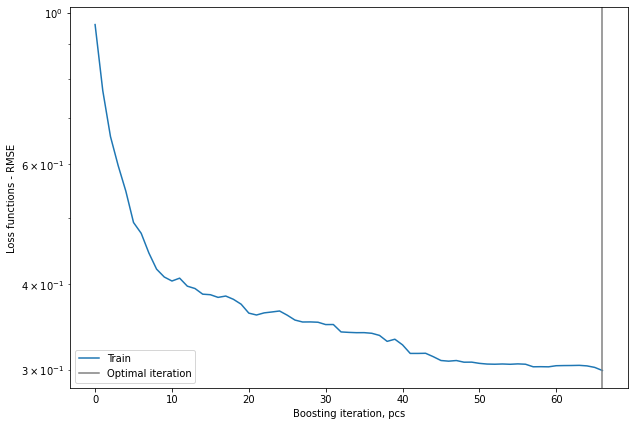

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  5.92
RMSE: 0.3
Relative RMSE(%):  -1.250
MSE: 0.1
R square: 88.7%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: -0.045
a1: 0.870
R^2: 0.887
Uncertainty
a0: -0.045+/-0.028
a1: 0.870+/-0.031


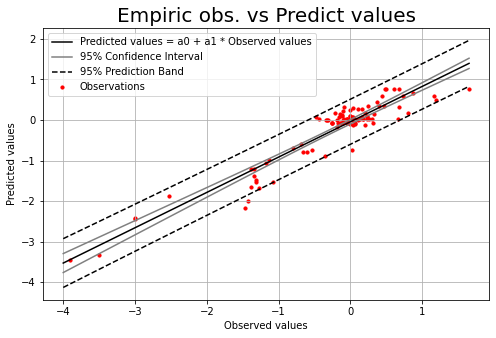

In [34]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-4, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

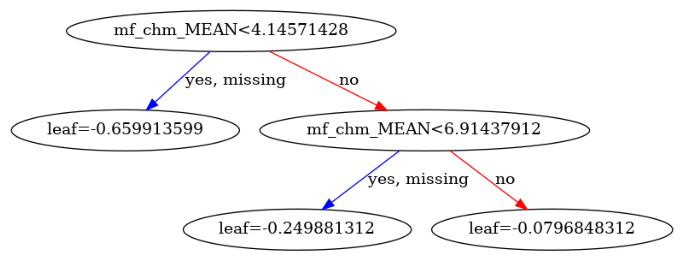

In [36]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

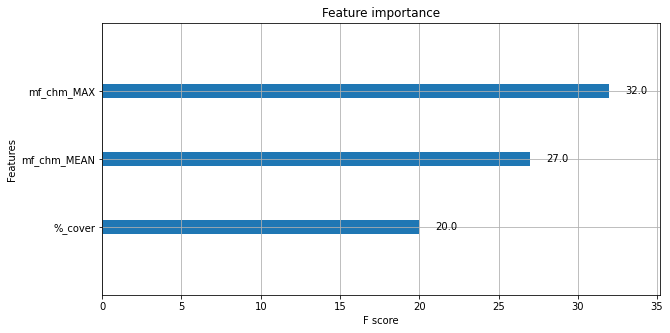

In [38]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

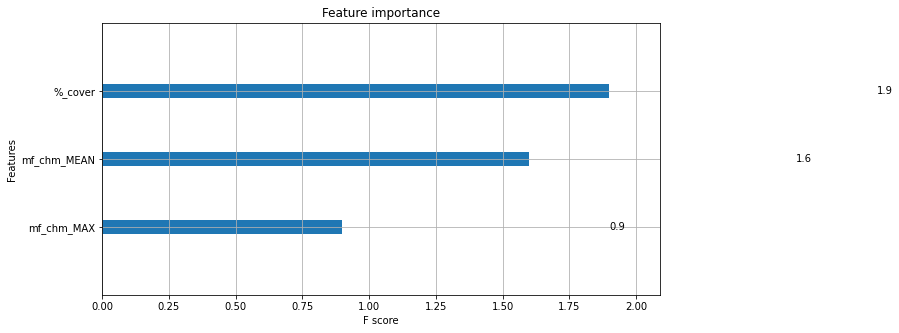

In [39]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

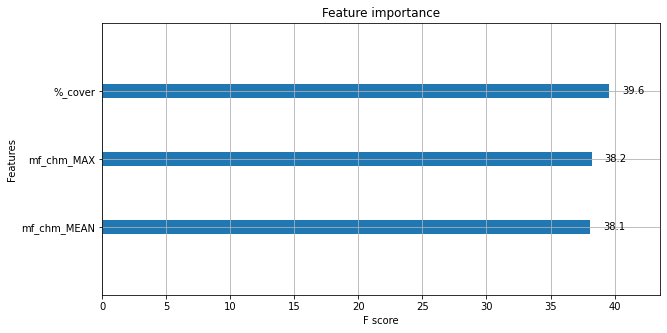

In [40]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [41]:
# Load SHAP`s library
import shap

In [42]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


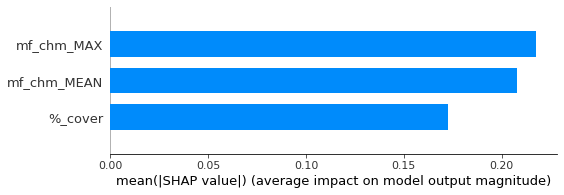

In [43]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

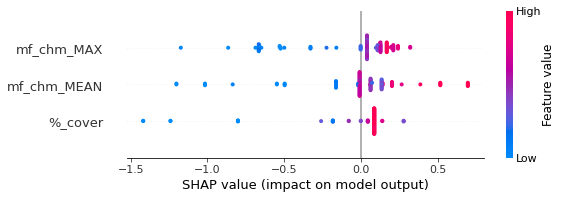

In [44]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

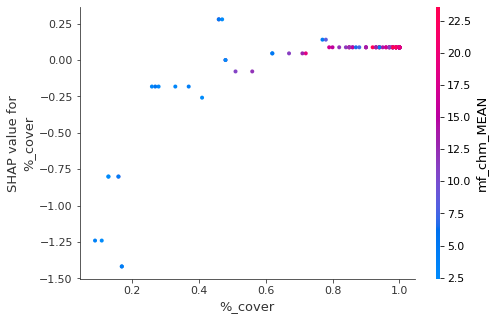

invalid value encountered in true_divide
invalid value encountered in true_divide


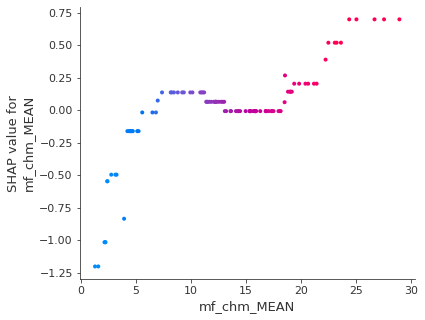

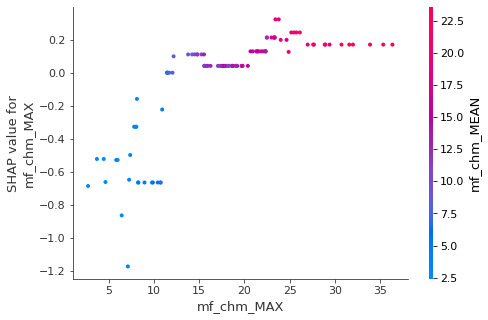

In [45]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [46]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Mstem_bark_XGB_model_without_texture.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Mstem_bark_XGB_model_without_texture.txt")